# Part 0: Basic Imports and Reading File

The data was sourced from [HealthData.gov](https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh/about_data) on July 25, 2024.

Staffing Model for Hospitals in an Emergency

* Sample of my data to do EDA
* SQL -->  though I personally recommend
* Use less data

2021 - Now 
Questions to think about: 
* Who is this for? Adult ER departments/Hospitals (maybe exclude pediatric)
* Input: staff shortage, confirmed cases of COVID prior
* Output: Number of beds needed, staff 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import plotly.graph_objects as go

In [5]:
# Set pandas default to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [6]:
covid_raw_data = pd.read_csv("data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20240725.csv")

In [7]:
covid_raw_data.shape

(81713, 135)

In [8]:
covid_raw_data.head()

state        date  critical_staffing_shortage_today_yes  \
0    MA  2021/06/15                                     6   
1    WY  2021/06/13                                     2   
2    LA  2021/06/06                                    41   
3    RI  2021/06/04                                     4   
4    KS  2021/06/03                                    13   

   critical_staffing_shortage_today_no  \
0                                   72   
1                                   26   
2                                  176   
3                                    9   
4                                  133   

   critical_staffing_shortage_today_not_reported  \
0                                              1   
1                                              2   
2                                              6   
3                                              2   
4                                              4   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  6        
1                                                  3        
2                                                 41        
3                                                  4        
4                                                 15        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                 72       
1                                                 25       
2                                                176       
3                                                  9       
4                                                131       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                  1                 
1                                                  2                 
2                                                  6                 
3                                                  2                 
4                                                  4                 

   hospital_onset_covid  hospital_onset_covid_coverage  inpatient_beds  \
0                   4.0                             78         17049.0   
1                   0.0                             28          1525.0   
2                   2.0                            217         13955.0   
3                   5.0                             14          2579.0   
4                   1.0                            147          9008.0   

   inpatient_beds_coverage  inpatient_beds_used  inpatient_beds_used_coverage  \
0                       79              14203.0                            79   
1                       30                657.0                            30   
2                      223               8758.0                           223   
3                       15               2383.0                            15   
4                      150               5501.0                           150   

   inpatient_beds_used_covid  inpatient_beds_used_covid_coverage  \
0                      125.0                                  78   
1                       40.0                                  28   
2                      265.0                                 220   
3                       86.0                                  14   
4                      137.0                                 147   

   previous_day_admission_adult_covid_confirmed  \
0                                          12.0   
1                                           9.0   
2                                          32.0   
3                                           1.0   
4                                          22.0   

   previous_day_admission_adult_covid_confirmed_coverage  \
0                                                 79       
1                                                 30       
2                                                220       
3                               

In [9]:
covid_raw_data.columns.to_list()

['state',
 'date',
 'critical_staffing_shortage_today_yes',
 'critical_staffing_shortage_today_no',
 'critical_staffing_shortage_today_not_reported',
 'critical_staffing_shortage_anticipated_within_week_yes',
 'critical_staffing_shortage_anticipated_within_week_no',
 'critical_staffing_shortage_anticipated_within_week_not_reported',
 'hospital_onset_covid',
 'hospital_onset_covid_coverage',
 'inpatient_beds',
 'inpatient_beds_coverage',
 'inpatient_beds_used',
 'inpatient_beds_used_coverage',
 'inpatient_beds_used_covid',
 'inpatient_beds_used_covid_coverage',
 'previous_day_admission_adult_covid_confirmed',
 'previous_day_admission_adult_covid_confirmed_coverage',
 'previous_day_admission_adult_covid_suspected',
 'previous_day_admission_adult_covid_suspected_coverage',
 'previous_day_admission_pediatric_covid_confirmed',
 'previous_day_admission_pediatric_covid_confirmed_coverage',
 'previous_day_admission_pediatric_covid_suspected',
 'previous_day_admission_pediatric_covid_suspected_

### Experimenting with Laura 

In [11]:
covid_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81713 entries, 0 to 81712
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(77), int64(56), object(2)
memory usage: 84.2+ MB


In [12]:
covid_raw_data.describe()

critical_staffing_shortage_today_yes  \
count                          81713.000000   
mean                               7.856608   
std                               14.923570   
min                                0.000000   
25%                                0.000000   
50%                                2.000000   
75%                               10.000000   
max                              191.000000   

       critical_staffing_shortage_today_no  \
count                         81713.000000   
mean                             47.398945   
std                              59.023908   
min                               0.000000   
25%                               3.000000   
50%                              24.000000   
75%                              78.000000   
max                             494.000000   

       critical_staffing_shortage_today_not_reported  \
count                                   81713.000000   
mean                                       47.450271   
std                                        69.327673   
min                                         0.000000   
25%                                         5.000000   
50%                                        22.000000   
75%                                        64.000000   
max                                       523.000000   

       critical_staffing_shortage_anticipated_within_week_yes  \
count                                       81713.000000        
mean                                           12.639837        
std                                            18.915257        
min                                             0.000000        
25%                                             1.000000        
50%                                             6.000000        
75%                                            18.000000        
max                                           204.000000        

       critical_staffing_shortage_anticipated_within_week_no  \
count                                       81713.000000       
mean                                           62.446465       
std                                            59.395291       
min                                             0.000000       
25%                                            17.000000       
50%                                            52.000000       
75%                                            89.000000       
max                                           469.000000       

       critical_staffing_shortage_anticipated_within_week_not_reported  \
count                                       81713.000000                 
mean                                           27.619522                 
std                                            58.285291                 
min                                             0.000000                 
25%                                             3.000000                 
50%                                            10.000000                 
75%                                            29.000000                 
max                                           523.000000                 

       hospital_onset_covid  hospital_onset_covid_coverage  inpatient_beds  \
count          80756.000000                   81713.000000    81708.000000   
mean              20.026091                      85.638319    13285.218718   
std               48.785796                      86.808464    14600.411077   
min                0.000000                       0.000000        0.000000   
25%                1.000000                      27.000000     3100.000000   
50%                6.000000                      61.000000     8833.000000   
75%               19.000000                     116.000000    16895.000000   
max             1334.000000                     597.000000   108966.000000   

       inpatient_beds_coverage  inpatient_beds_used  \
count             81713.000000         81449.000000   
mean                

In [13]:
covid_raw_data.isna().mean() * 100

state                                                                             0.000000
date                                                                              0.000000
critical_staffing_shortage_today_yes                                              0.000000
critical_staffing_shortage_today_no                                               0.000000
critical_staffing_shortage_today_not_reported                                     0.000000
critical_staffing_shortage_anticipated_within_week_yes                            0.000000
critical_staffing_shortage_anticipated_within_week_no                             0.000000
critical_staffing_shortage_anticipated_within_week_not_reported                   0.000000
hospital_onset_covid                                                              1.171172
hospital_onset_covid_coverage                                                     0.000000
inpatient_beds                                                                    0.006119

Let's simplify the data a bit by only focusing on adult data.

# Drop Pediatric Data

In [16]:
pediatric_columns_found = covid_raw_data.columns.str.findall("\w+pediatric\w+")
pediatric_columns = [item[0] for item in pediatric_columns_found if item]
pediatric_columns

['previous_day_admission_pediatric_covid_confirmed',
 'previous_day_admission_pediatric_covid_confirmed_coverage',
 'previous_day_admission_pediatric_covid_suspected',
 'previous_day_admission_pediatric_covid_suspected_coverage',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage',
 'total_pediatric_patients_hospitalized_confirmed_covid',
 'total_pediatric_patients_hospitalized_confirmed_covid_coverage',
 'all_pediatric_inpatient_bed_occupied',
 'all_pediatric_inpatient_bed_occupied_coverage',
 'all_pediatric_inpatient_beds',
 'all_pediatric_inpatient_beds_coverage',
 'previous_day_admission_pediatric_covid_confirmed_0_4',
 'previous_day_admission_pediatric_covid_confirmed_0_4_coverage',
 'previous_day_admission_pediatric_covid_confirmed_12_17',
 'previous_day_admission_pediatric_covid_confirmed_12_17_coverage',
 'previous_day_admission_pediatric_covid_confirmed_5_11',
 'previous_day_adm

In [17]:
covid_adult_data_raw = covid_raw_data.drop(pediatric_columns, axis=1)
covid_adult_data_raw.head(5) 

state        date  critical_staffing_shortage_today_yes  \
0    MA  2021/06/15                                     6   
1    WY  2021/06/13                                     2   
2    LA  2021/06/06                                    41   
3    RI  2021/06/04                                     4   
4    KS  2021/06/03                                    13   

   critical_staffing_shortage_today_no  \
0                                   72   
1                                   26   
2                                  176   
3                                    9   
4                                  133   

   critical_staffing_shortage_today_not_reported  \
0                                              1   
1                                              2   
2                                              6   
3                                              2   
4                                              4   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                  6        
1                                                  3        
2                                                 41        
3                                                  4        
4                                                 15        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                 72       
1                                                 25       
2                                                176       
3                                                  9       
4                                                131       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                  1                 
1                                                  2                 
2                                                  6                 
3                                                  2                 
4                                                  4                 

   hospital_onset_covid  hospital_onset_covid_coverage  inpatient_beds  \
0                   4.0                             78         17049.0   
1                   0.0                             28          1525.0   
2                   2.0                            217         13955.0   
3                   5.0                             14          2579.0   
4                   1.0                            147          9008.0   

   inpatient_beds_coverage  inpatient_beds_used  inpatient_beds_used_coverage  \
0                       79              14203.0                            79   
1                       30                657.0                            30   
2                      223               8758.0                           223   
3                       15               2383.0                            15   
4                      150               5501.0                           150   

   inpatient_beds_used_covid  inpatient_beds_used_covid_coverage  \
0                      125.0                                  78   
1                       40.0                                  28   
2                      265.0                                 220   
3                       86.0                                  14   
4                      137.0                                 147   

   previous_day_admission_adult_covid_confirmed  \
0                                          12.0   
1                                           9.0   
2                                          32.0   
3                                           1.0   
4                                          22.0   

   previous_day_admission_adult_covid_confirmed_coverage  \
0                                                 79       
1                                                 30       
2                                                220       
3                               

In [18]:
covid_adult_data_raw.dtypes

state                                                                        object
date                                                                         object
critical_staffing_shortage_today_yes                                          int64
critical_staffing_shortage_today_no                                           int64
critical_staffing_shortage_today_not_reported                                 int64
critical_staffing_shortage_anticipated_within_week_yes                        int64
critical_staffing_shortage_anticipated_within_week_no                         int64
critical_staffing_shortage_anticipated_within_week_not_reported               int64
hospital_onset_covid                                                        float64
hospital_onset_covid_coverage                                                 int64
inpatient_beds                                                              float64
inpatient_beds_coverage                                                     

# Column Consolidation

In [20]:
covid_adult_data_raw["date"] = pd.to_datetime(covid_adult_data_raw["date"], format="%Y/%m/%d")

In [21]:
covid_adult_data_raw.drop(columns=["geocoded_state"], inplace=True)

## Group COVID Confirmed Cases

In [23]:
covid_adult_data_raw["previous_day_admission_early_adult_covid_confirmed"] = covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_18-19"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_20-29"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_30-39"]

In [24]:
columns = ["previous_day_admission_adult_covid_confirmed_18-19", 
           "previous_day_admission_adult_covid_confirmed_20-29", 
           "previous_day_admission_adult_covid_confirmed_30-39"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

In [25]:
covid_adult_data_raw["previous_day_admission_middle_age_covid_confirmed"] = covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_40-49"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_50-59"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_60-69"]

In [26]:
columns = ["previous_day_admission_adult_covid_confirmed_40-49", 
           "previous_day_admission_adult_covid_confirmed_50-59", 
           "previous_day_admission_adult_covid_confirmed_60-69"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

In [27]:
covid_adult_data_raw["previous_day_admission_elderly_covid_confirmed"] = covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_70-79"] + \
                                                         covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_80+"]

In [28]:
columns = ["previous_day_admission_adult_covid_confirmed_70-79", "previous_day_admission_adult_covid_confirmed_80+"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

## Group COVID Confirmed Coverage

In [30]:
covid_adult_data_raw["previous_day_admission_early_adult_covid_confirmed_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_18-19_coverage"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_20-29_coverage"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_30-39_coverage"]

In [31]:
covid_adult_data_raw["previous_day_admission_middle_age_covid_confirmed_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_40-49_coverage"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_50-59_coverage"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_60-69_coverage"]

In [32]:
covid_adult_data_raw["previous_day_admission_elderly_covid_confirmed_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_70-79_coverage"] + \
                                                         covid_adult_data_raw["previous_day_admission_adult_covid_confirmed_80+_coverage"]

In [33]:
columns = ["previous_day_admission_adult_covid_confirmed_18-19_coverage", 
           "previous_day_admission_adult_covid_confirmed_20-29_coverage", 
           "previous_day_admission_adult_covid_confirmed_30-39_coverage", 
           "previous_day_admission_adult_covid_confirmed_40-49_coverage", 
           "previous_day_admission_adult_covid_confirmed_50-59_coverage", 
           "previous_day_admission_adult_covid_confirmed_60-69_coverage", 
           "previous_day_admission_adult_covid_confirmed_70-79_coverage", 
           "previous_day_admission_adult_covid_confirmed_80+_coverage"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

## Group COVID Suspected

In [35]:
covid_adult_data_raw["previous_day_admission_early_adult_covid_suspected"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_18-19"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_suspected_20-29"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_suspected_30-39"]

In [36]:
covid_adult_data_raw["previous_day_admission_middle_age_covid_suspected"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_40-49"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_suspected_50-59"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_suspected_60-69"]

In [37]:
covid_adult_data_raw["previous_day_admission_elderly_covid_suspected"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_70-79"] + \
                                                         covid_adult_data_raw["previous_day_admission_adult_covid_suspected_80+"]

In [38]:
columns = ["previous_day_admission_adult_covid_suspected_18-19", 
           "previous_day_admission_adult_covid_suspected_20-29", 
           "previous_day_admission_adult_covid_suspected_30-39", 
           "previous_day_admission_adult_covid_suspected_40-49", 
           "previous_day_admission_adult_covid_suspected_50-59", 
           "previous_day_admission_adult_covid_suspected_60-69", 
           "previous_day_admission_adult_covid_suspected_70-79", 
           "previous_day_admission_adult_covid_suspected_80+"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

## Group COVID Suspected Coverage

In [40]:
covid_adult_data_raw["previous_day_admission_early_adult_covid_suspected_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_18-19_coverage"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_suspected_20-29_coverage"] + \
                                                             covid_adult_data_raw["previous_day_admission_adult_covid_suspected_30-39_coverage"]

In [41]:
covid_adult_data_raw["previous_day_admission_middle_age_covid_suspected_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_40-49_coverage"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_suspected_50-59_coverage"] + \
                                                            covid_adult_data_raw["previous_day_admission_adult_covid_suspected_60-69_coverage"]

In [42]:
covid_adult_data_raw["previous_day_admission_elderly_covid_suspected_coverage"] = covid_adult_data_raw["previous_day_admission_adult_covid_suspected_70-79_coverage"] + \
                                                         covid_adult_data_raw["previous_day_admission_adult_covid_suspected_80+_coverage"]

In [43]:
columns = ["previous_day_admission_adult_covid_suspected_18-19_coverage", 
           "previous_day_admission_adult_covid_suspected_20-29_coverage", 
           "previous_day_admission_adult_covid_suspected_30-39_coverage", 
           "previous_day_admission_adult_covid_suspected_40-49_coverage", 
           "previous_day_admission_adult_covid_suspected_50-59_coverage", 
           "previous_day_admission_adult_covid_suspected_60-69_coverage", 
           "previous_day_admission_adult_covid_suspected_70-79_coverage", 
           "previous_day_admission_adult_covid_suspected_80+_coverage"]
covid_adult_data_raw.drop(columns=columns, inplace=True)

In [44]:
(covid_adult_data_raw.isna().mean() * 100).sort_values()

state                                                                        0.000000
staffed_icu_adult_patients_confirmed_covid_coverage                          0.000000
total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage     0.000000
total_adult_patients_hospitalized_confirmed_covid_coverage                   0.000000
total_staffed_adult_icu_beds_coverage                                        0.000000
previous_day_admission_middle_age_covid_suspected_coverage                   0.000000
previous_day_admission_adult_covid_confirmed_unknown_coverage                0.000000
previous_day_admission_adult_covid_suspected_unknown_coverage                0.000000
deaths_covid_coverage                                                        0.000000
staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage            0.000000
icu_patients_confirmed_influenza_coverage                                    0.000000
previous_day_deaths_covid_and_influenza_coverage      

In [ ]:
# let's see what the data looks like for those with nulls
sel = covid_adult_data_raw.isna().mean() > 0
for col in covid_adult_data_raw.isna().mean()[sel].index:
    xs, ys = zip(*sorted(zip(covid_adult_data_raw["date"], covid_adult_data_raw[col])))                 # sort by date
    fig = px.line(x=xs, y=ys)

    # axis labels and title
    fig.update_layout(
        title=col,
        xaxis=dict( rangeslider=dict( visible=True ), type="date" )
    )
    fig.show()

Looking at the graphs for __previous_week_therapeutic_b_bamlanivimab_courses_used__, __previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used__, and __previous_day_admission_early_adult_covid_confirmed__, they don't look like they have much movement, so we can drop them from the dataset

In [47]:
covid_adult_data_raw.drop(columns=["previous_week_therapeutic_b_bamlanivimab_courses_used", 
                                   "previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used", 
                                   "previous_day_admission_early_adult_covid_confirmed"], 
                          inplace=True)

In [48]:
covid_adult_data_raw.isna().sum().sort_values()

state                                                                           0
staffed_icu_adult_patients_confirmed_covid_coverage                             0
total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage        0
total_adult_patients_hospitalized_confirmed_covid_coverage                      0
total_staffed_adult_icu_beds_coverage                                           0
previous_day_admission_middle_age_covid_suspected_coverage                      0
previous_day_admission_adult_covid_confirmed_unknown_coverage                   0
previous_day_admission_adult_covid_suspected_unknown_coverage                   0
deaths_covid_coverage                                                           0
staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage               0
icu_patients_confirmed_influenza_coverage                                       0
previous_day_deaths_covid_and_influenza_coverage                                0
previous_day_dea

In [49]:
weights = [0.25, 0.25, 0.5]
sum_weights = np.sum(weights)


covid_adult_data_clean = covid_adult_data_raw.copy()

In [50]:
null_cols = covid_adult_data_clean.isna().mean().sort_values() * 100
sel = covid_adult_data_clean.isna().mean().sort_values() > 0
null_cols[sel]

inpatient_beds                                                      0.006119
inpatient_beds_used                                                 0.323082
inpatient_beds_utilization_coverage                                 0.323082
inpatient_beds_utilization_numerator                                0.323082
inpatient_beds_utilization_denominator                              0.323082
inpatient_beds_utilization                                          0.324306
inpatient_beds_used_covid                                           1.035331
hospital_onset_covid                                                1.171172
inpatient_bed_covid_utilization_numerator                           1.261733
percent_of_inpatients_with_covid_coverage                           1.261733
percent_of_inpatients_with_covid_numerator                          1.261733
inpatient_bed_covid_utilization_denominator                         1.261733
percent_of_inpatients_with_covid_denominator                        1.261733

In [51]:
for col in null_cols[sel].index:
    covid_adult_data_clean[col] = covid_adult_data_clean[col].fillna(covid_adult_data_clean[col].rolling(window=5, min_periods=1).mean())
    # If there are still nulls, forward fill
    if covid_adult_data_clean[col].isna().sum() > 0:
        covid_adult_data_clean[col].fillna(method='ffill', inplace=True)

In [52]:
# sanity check that there are no nulls
covid_adult_data_clean.isna().sum()

state                                                                       0
date                                                                        0
critical_staffing_shortage_today_yes                                        0
critical_staffing_shortage_today_no                                         0
critical_staffing_shortage_today_not_reported                               0
critical_staffing_shortage_anticipated_within_week_yes                      0
critical_staffing_shortage_anticipated_within_week_no                       0
critical_staffing_shortage_anticipated_within_week_not_reported             0
hospital_onset_covid                                                        0
hospital_onset_covid_coverage                                               0
inpatient_beds                                                              0
inpatient_beds_coverage                                                     0
inpatient_beds_used                                             

In [ ]:
for col in null_cols[sel].index:
    ### SHOW ORIGINAL NULLS ###
    xs_orig, ys_orig = zip(*sorted(zip(covid_adult_data_raw["date"], covid_adult_data_raw[col])))                 # sort by date
    fig_orig = px.line(x=xs_orig, y=ys_orig)

    # axis labels and title
    fig_orig.update_layout(
        title=f"{col} with nans",
        xaxis=dict(rangeslider=dict(visible=True), type="date")
    )
    fig_orig.update_traces(line_color='#ff0000')
    fig_orig.show()

    ### SHOW WITH IMPUTATION ###
    xs, ys = zip(*sorted(zip(covid_adult_data_clean["date"], covid_adult_data_clean[col])))                 # sort by date
    fig = px.line(x=xs, y=ys)

    # axis labels and title
    fig.update_layout(
        title=f"{col} withouts nans",
        xaxis=dict(rangeslider=dict(visible=True), type="date" )
    )
    fig.show()

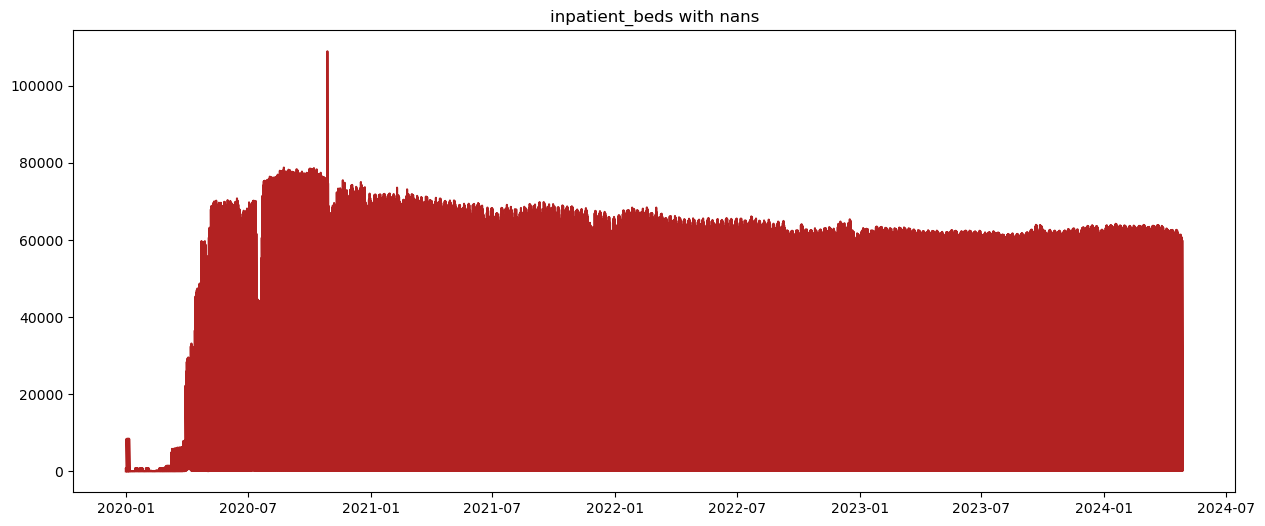

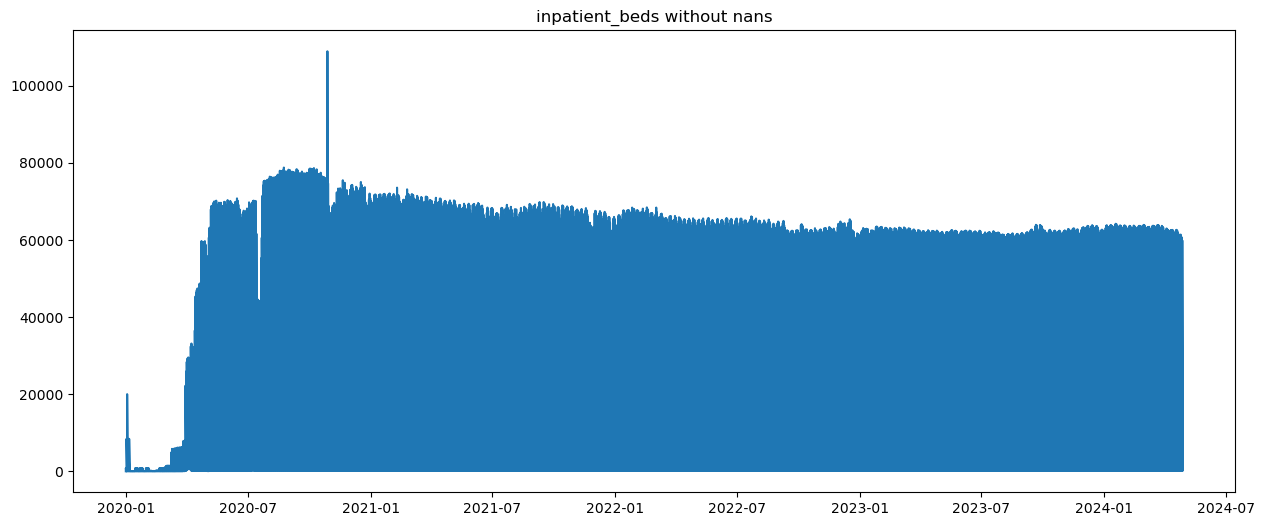

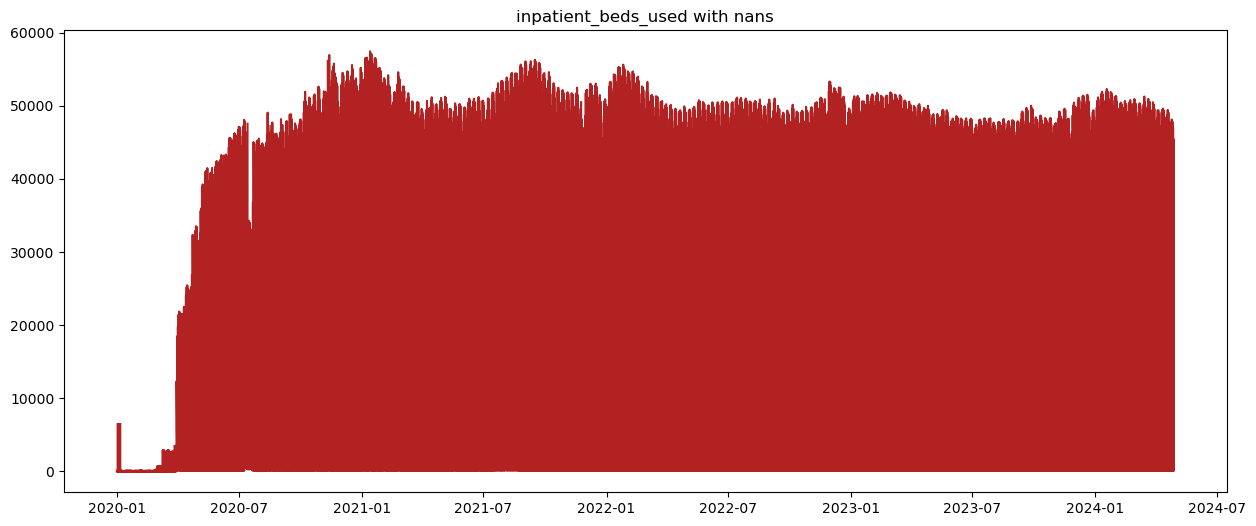

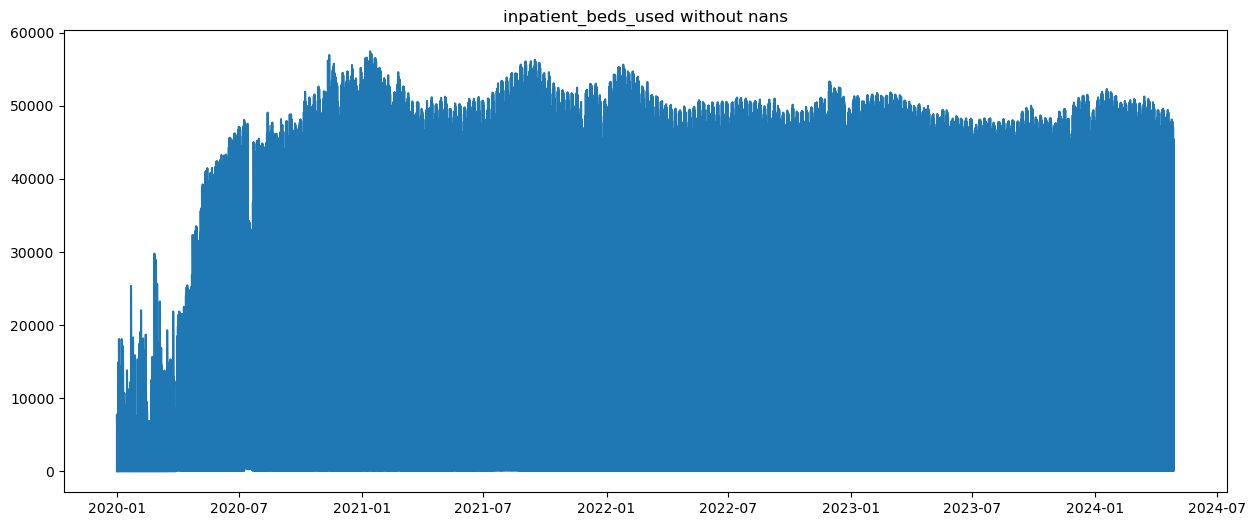

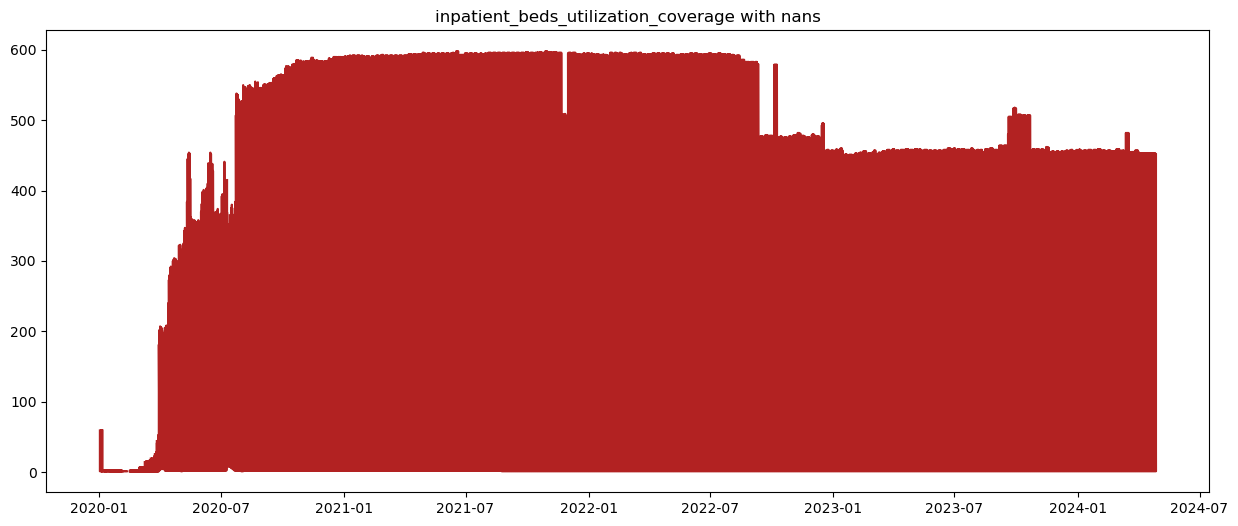

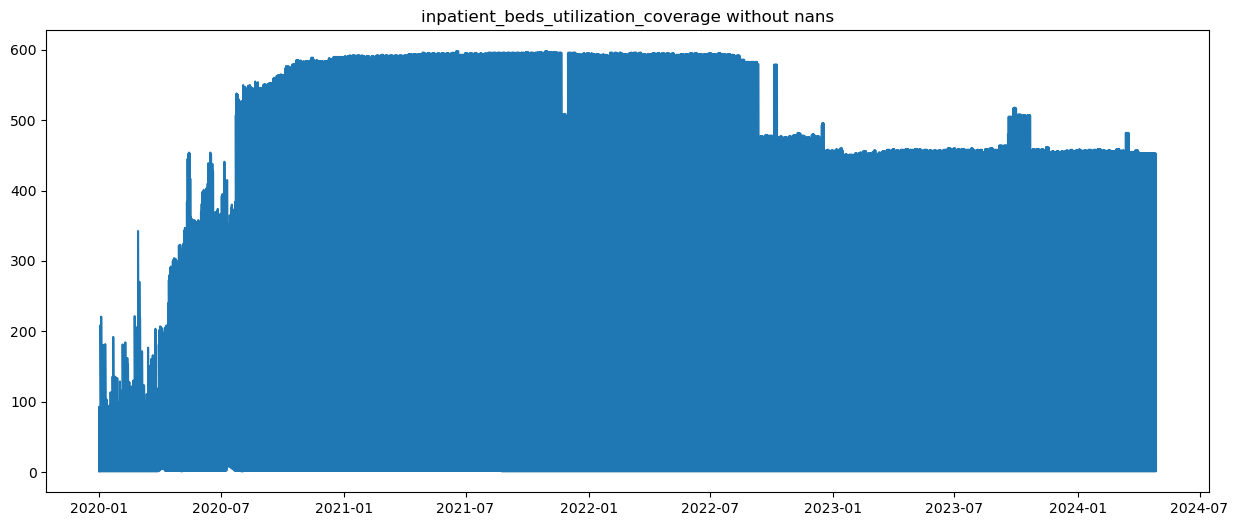

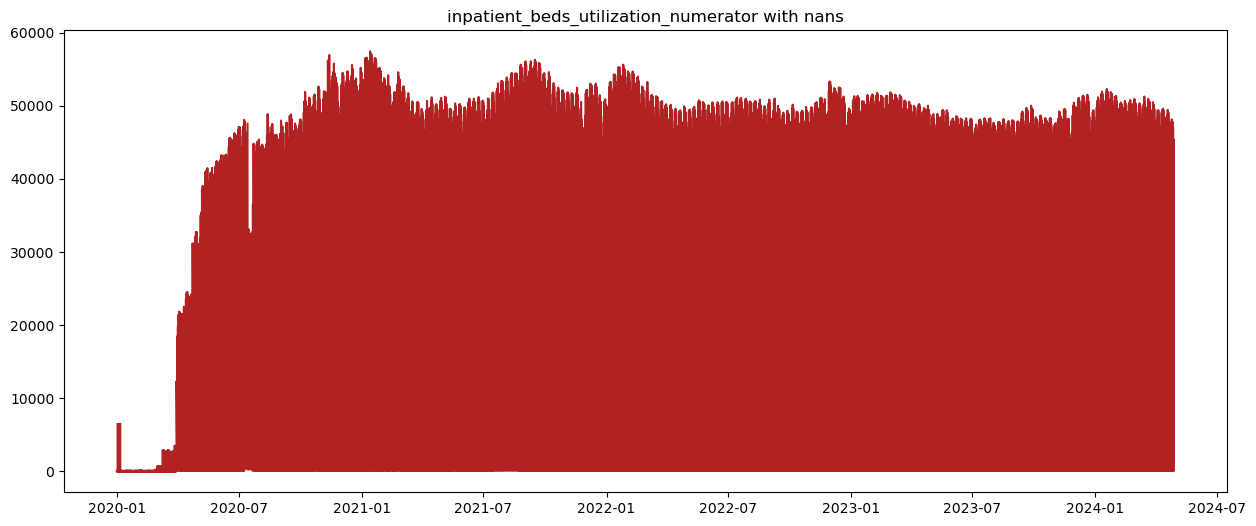

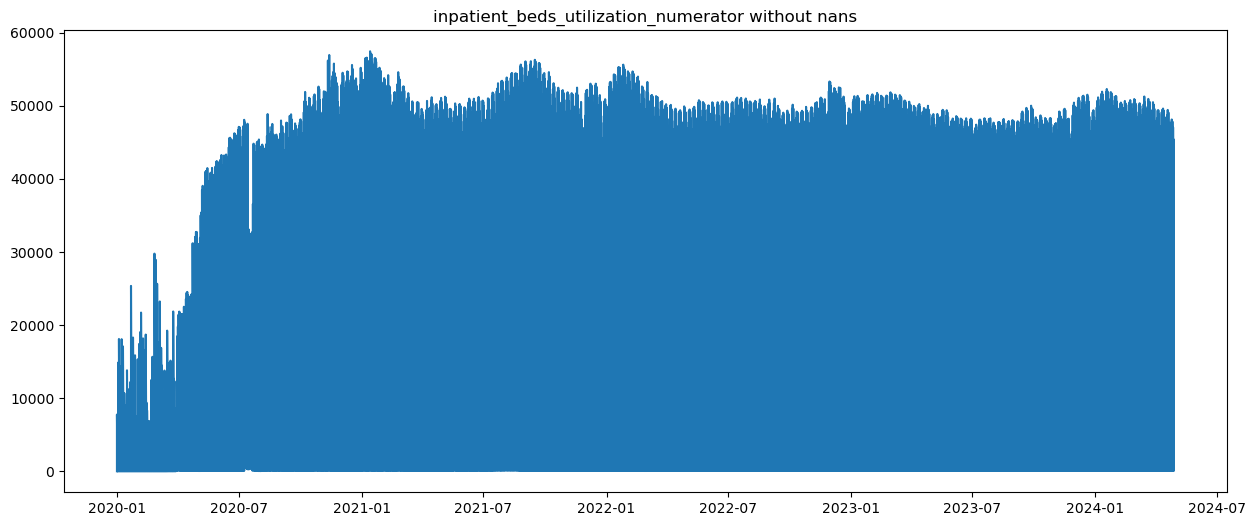

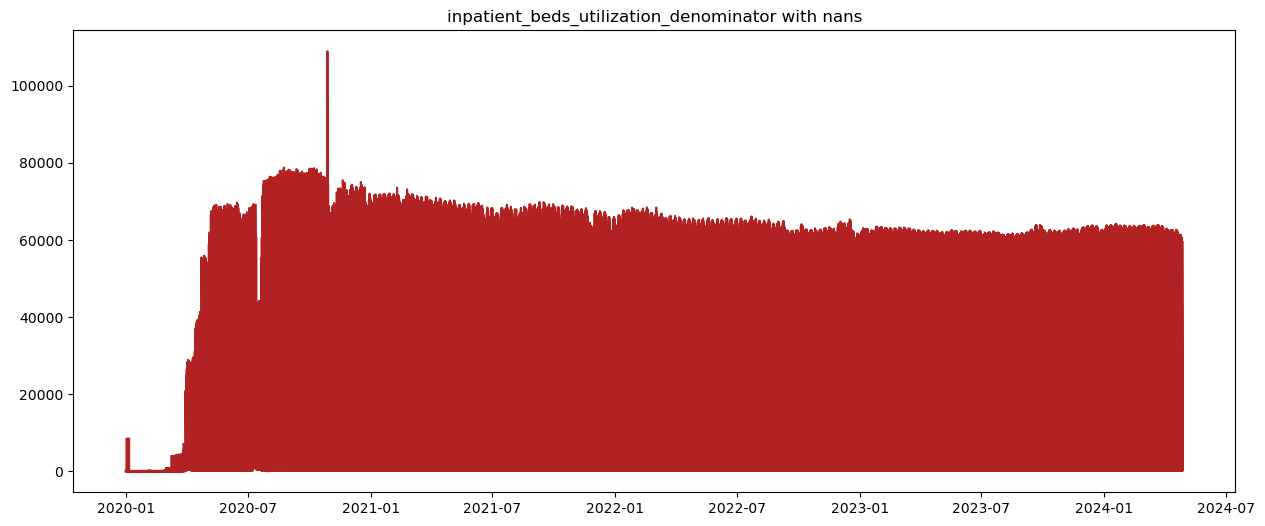

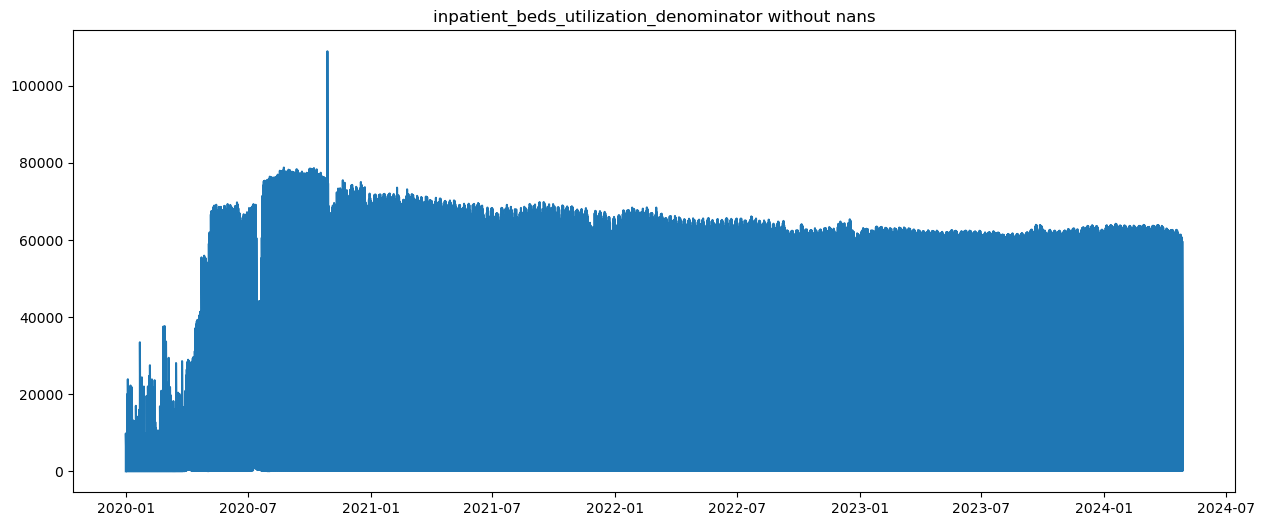

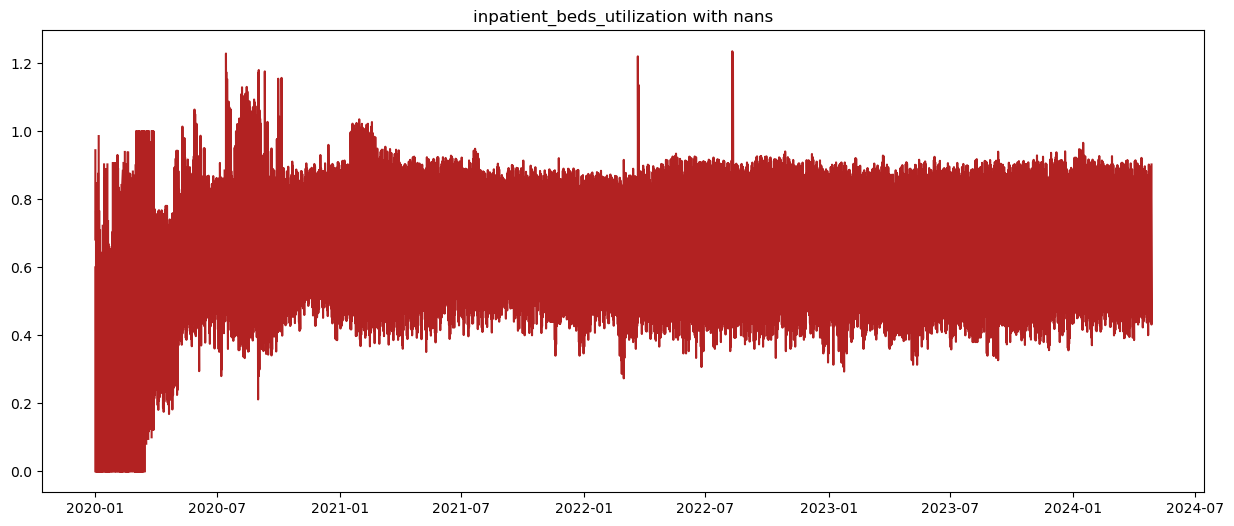

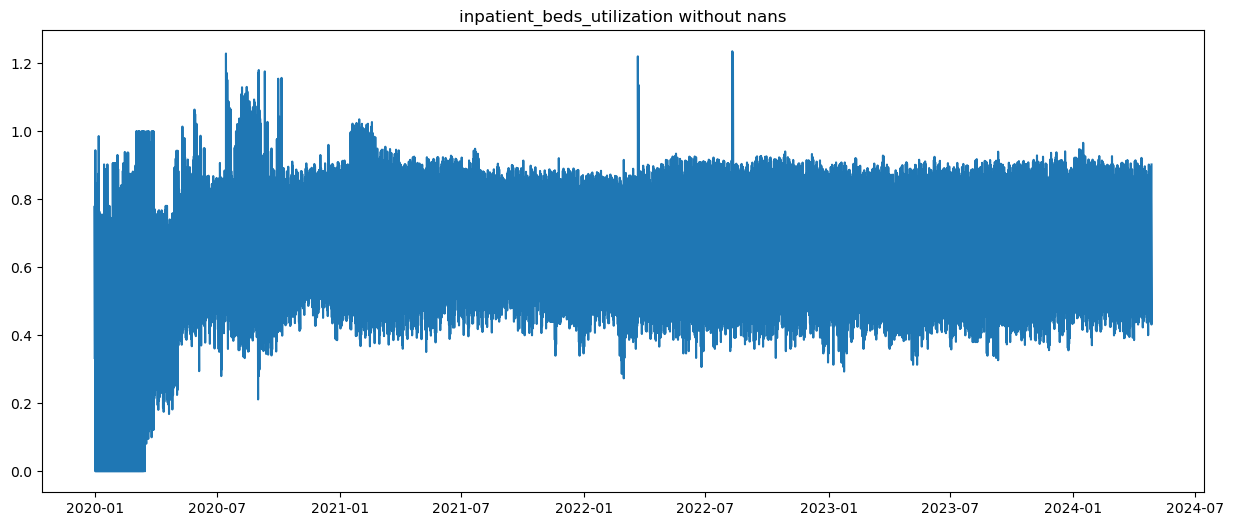

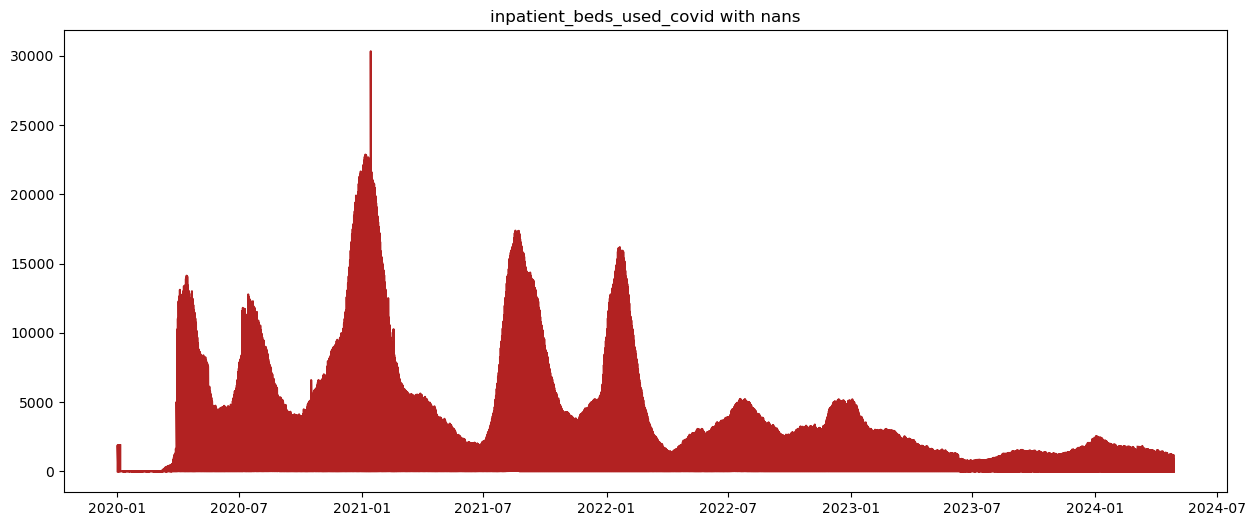

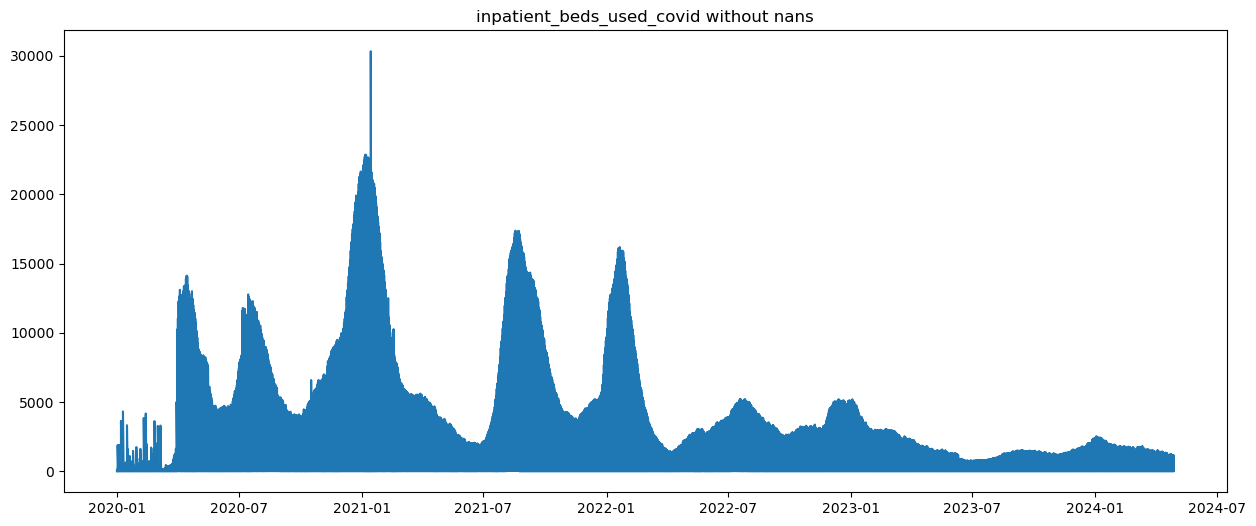

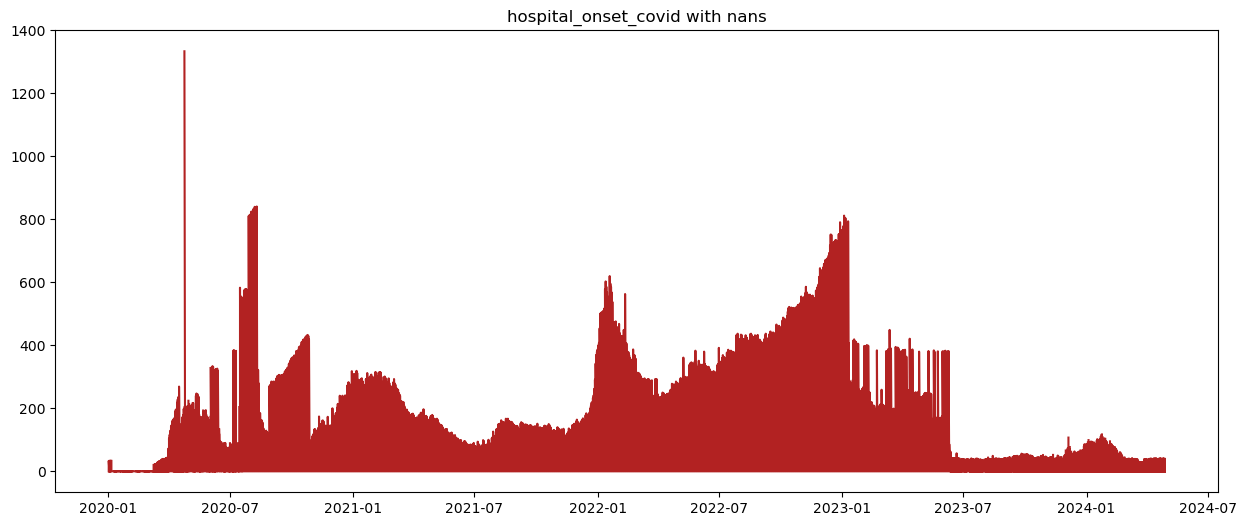

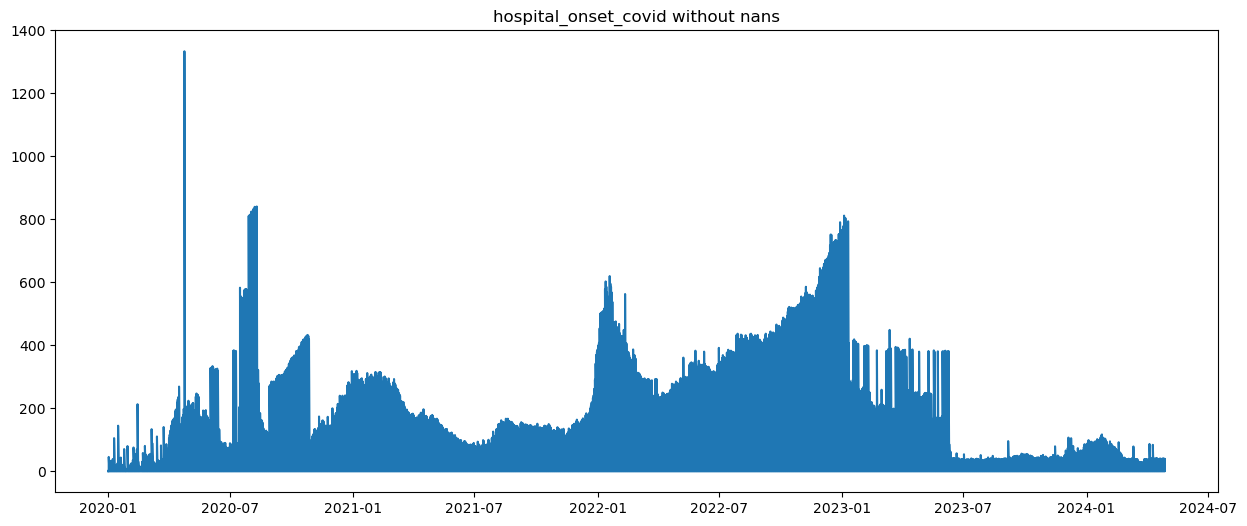

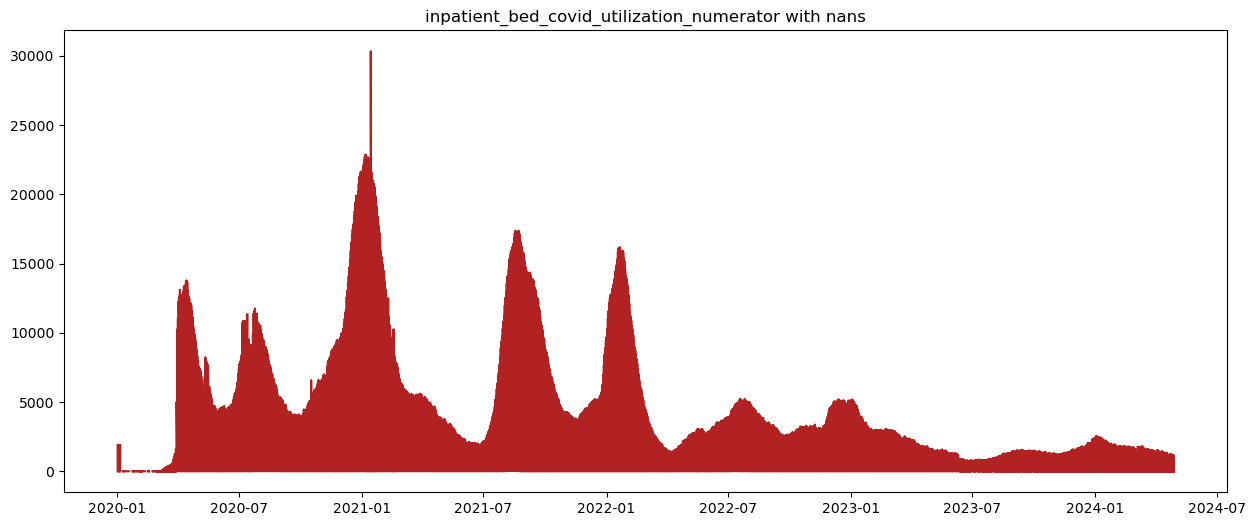

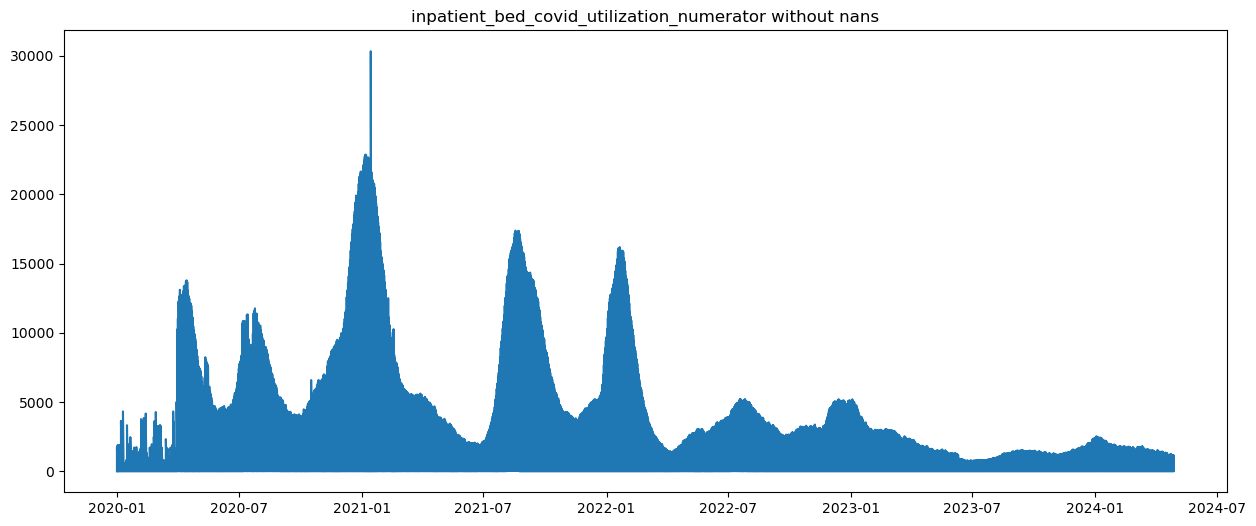

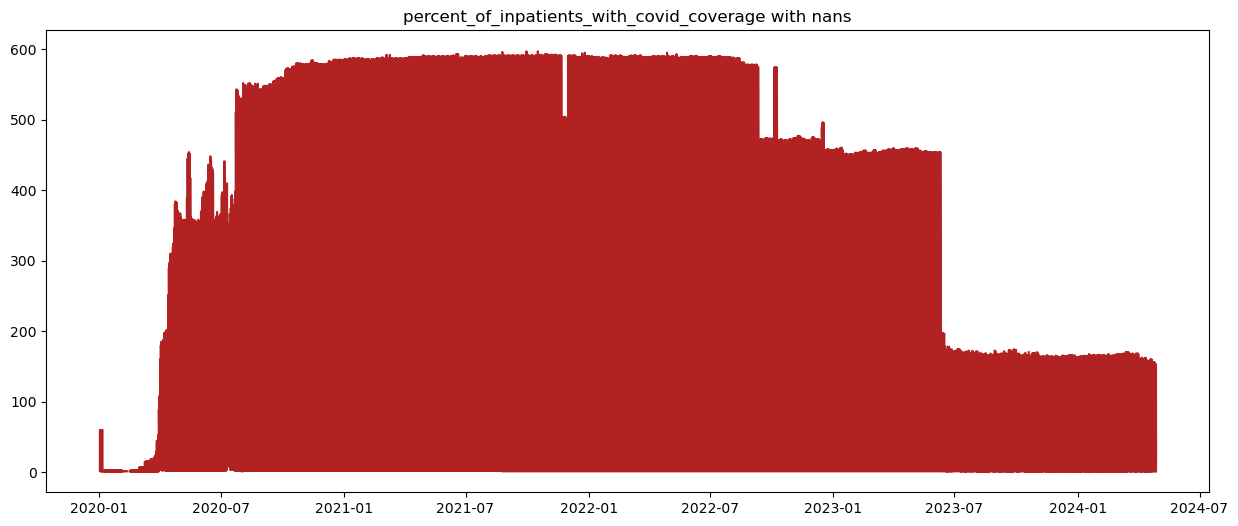

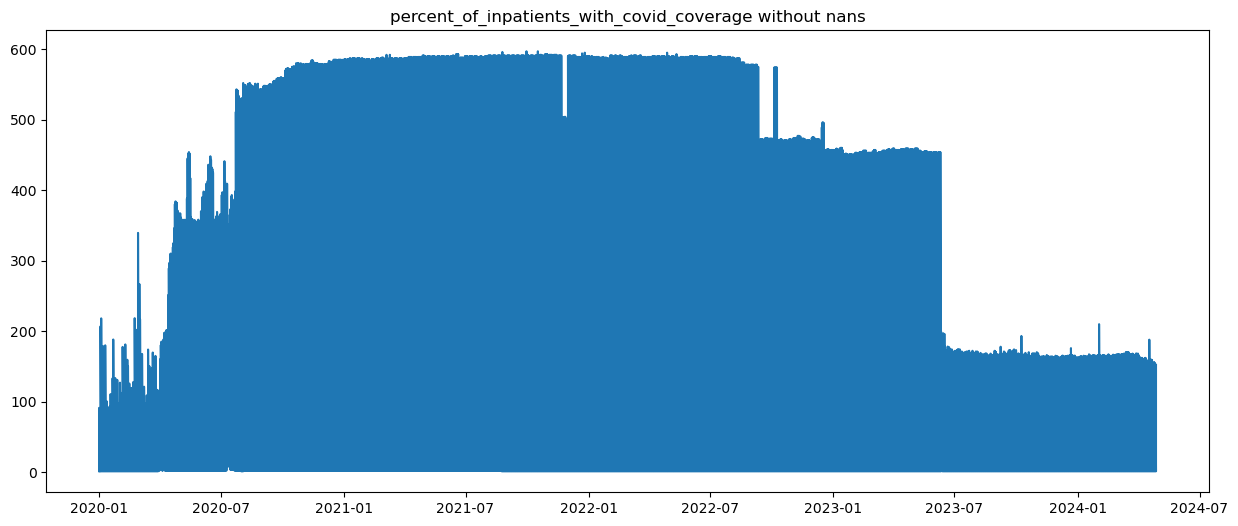

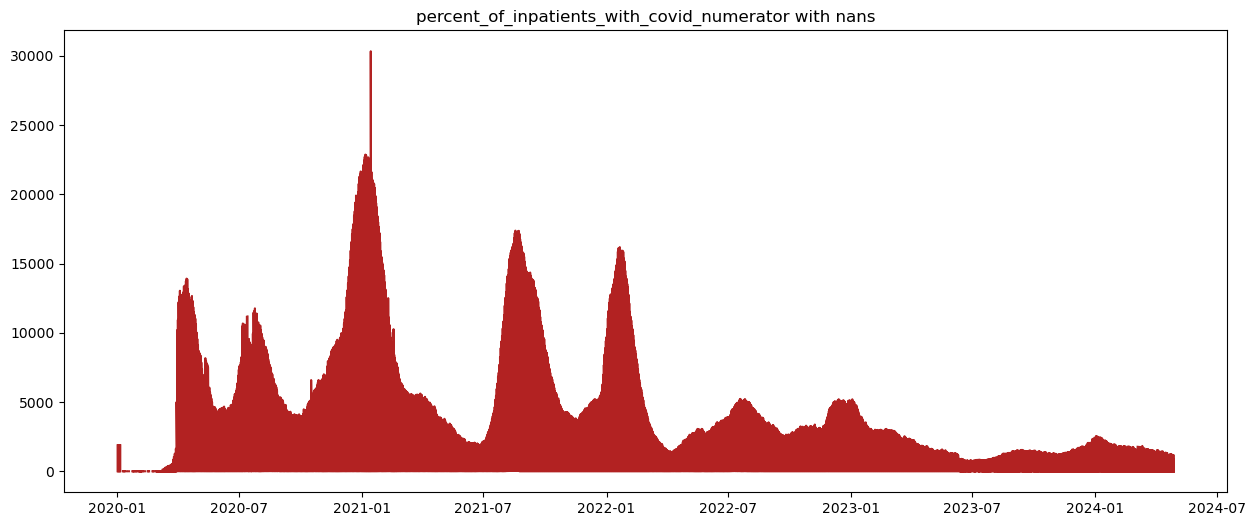

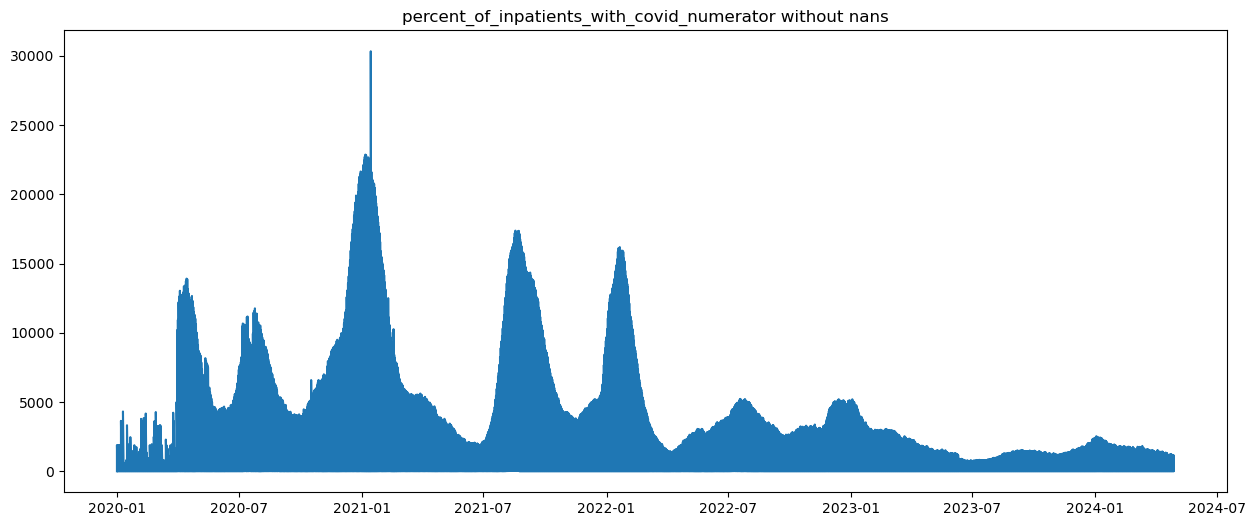

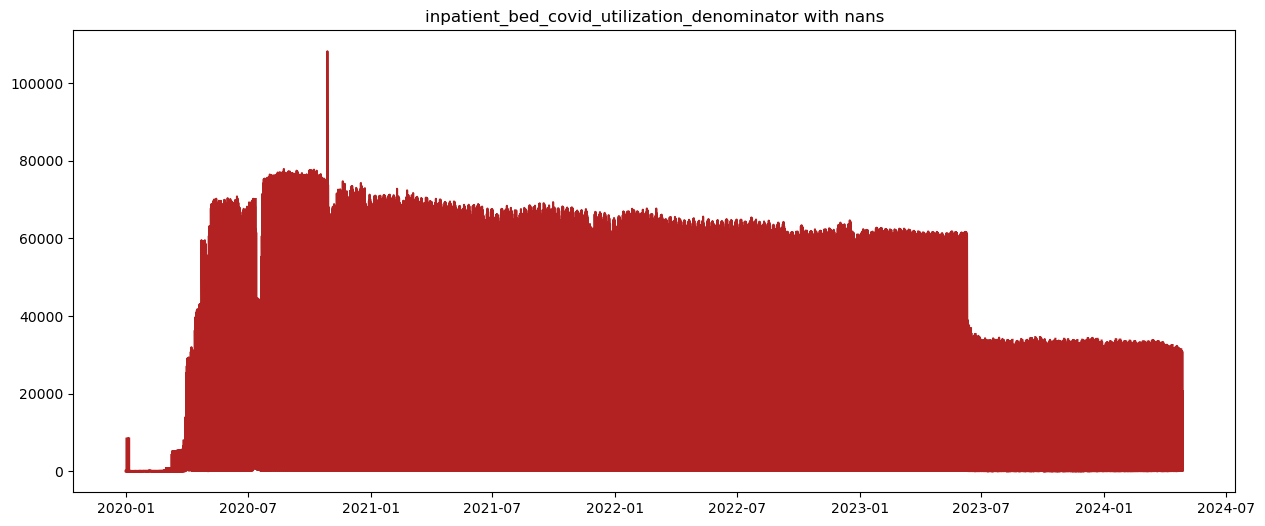

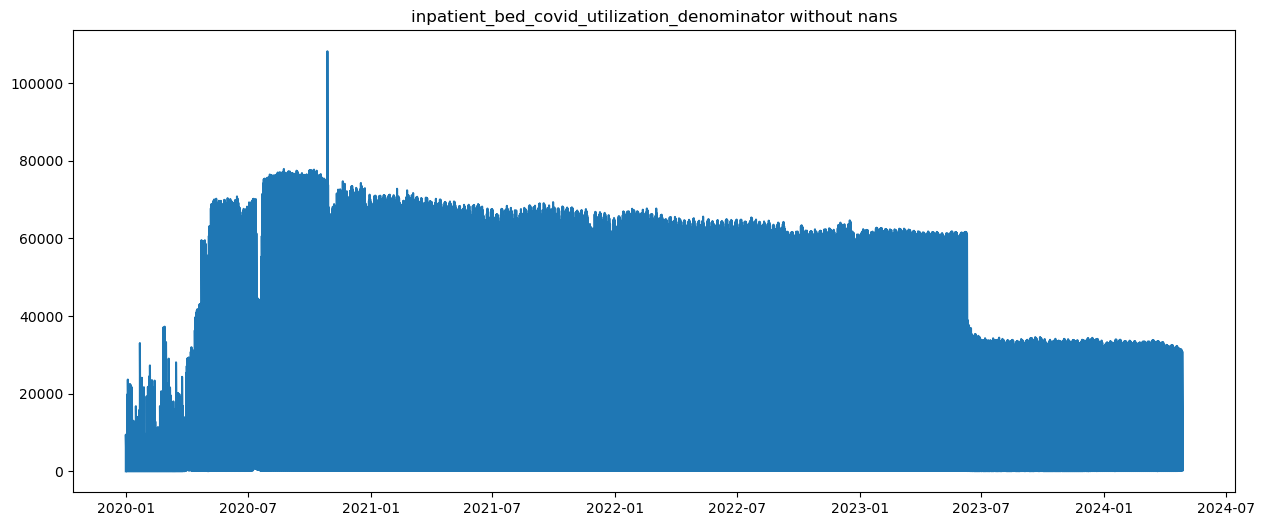

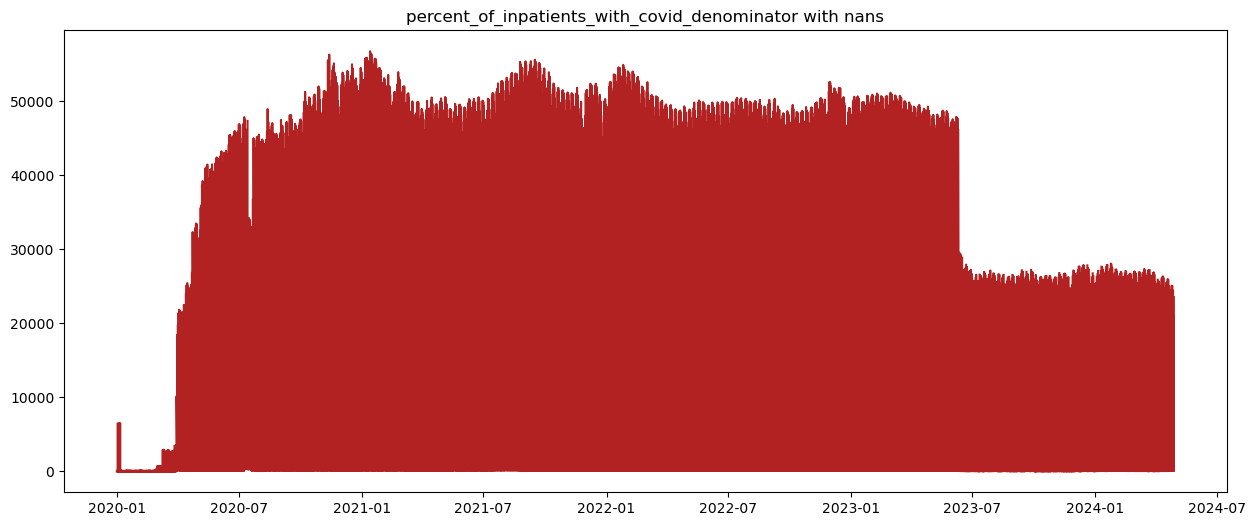

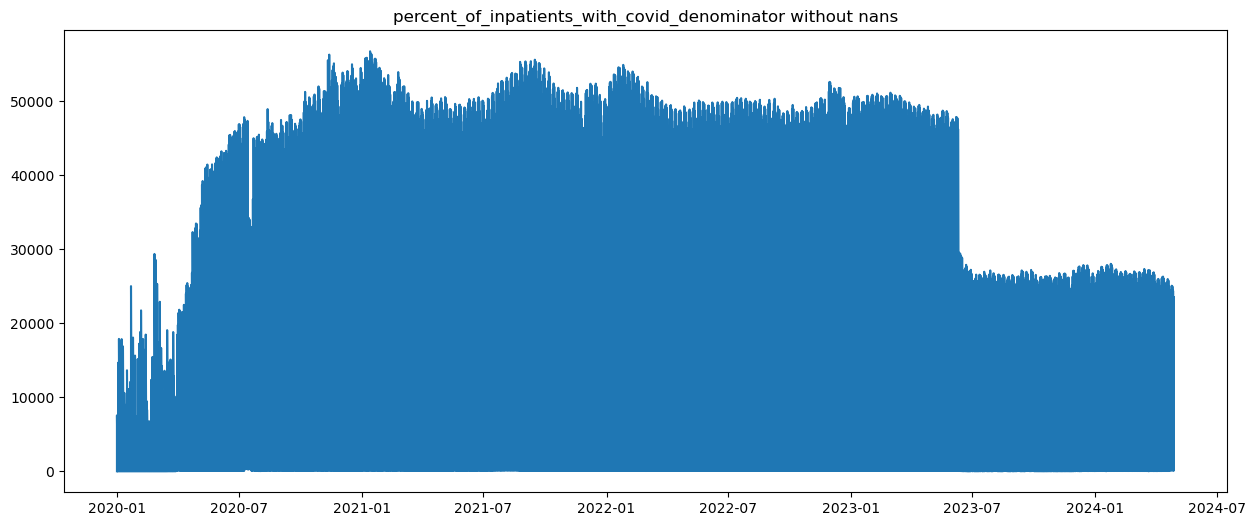

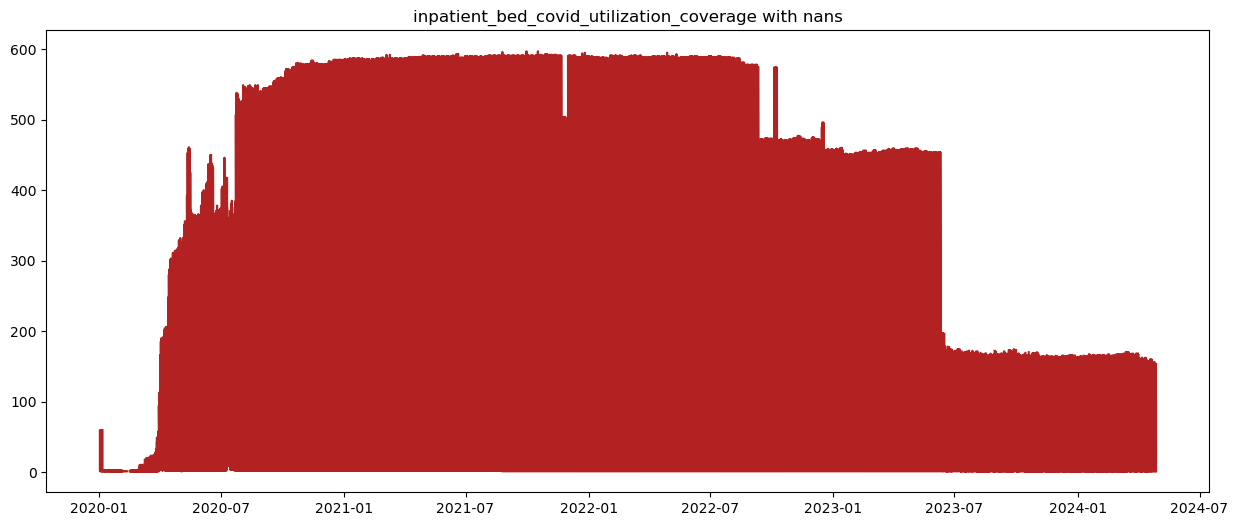

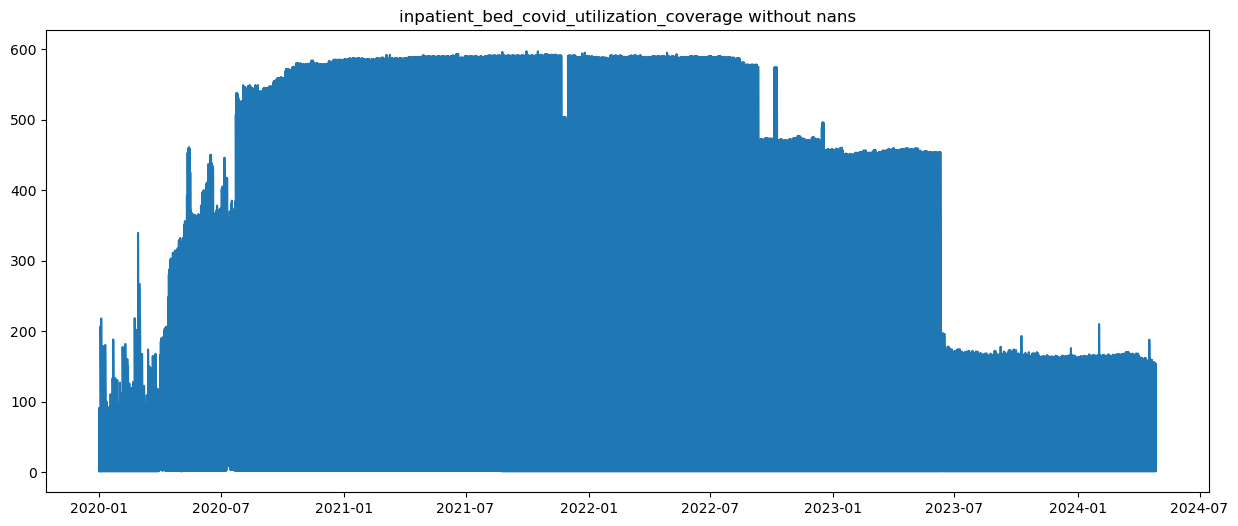

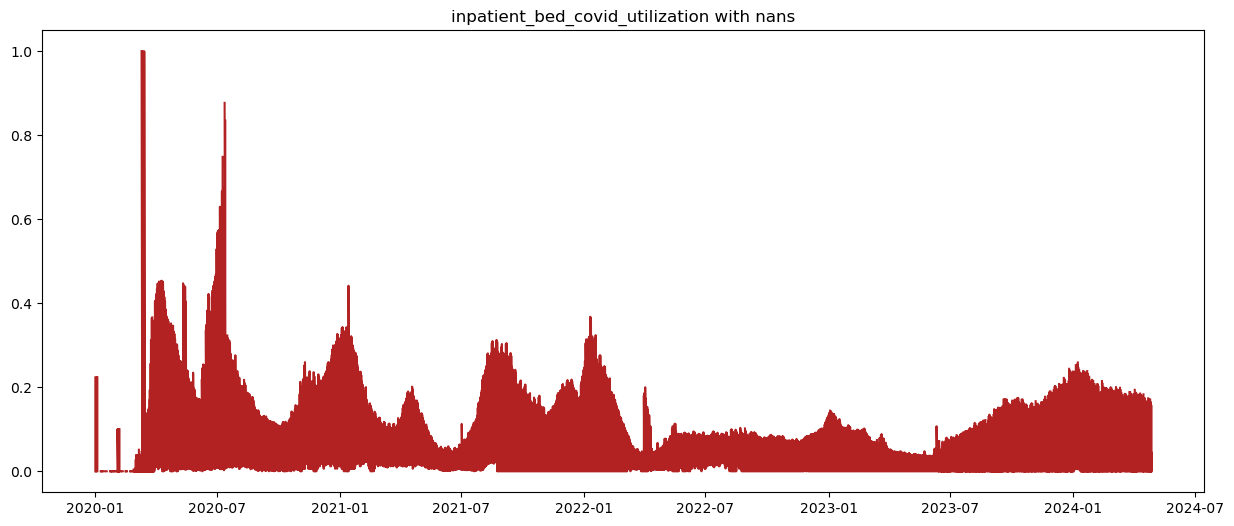

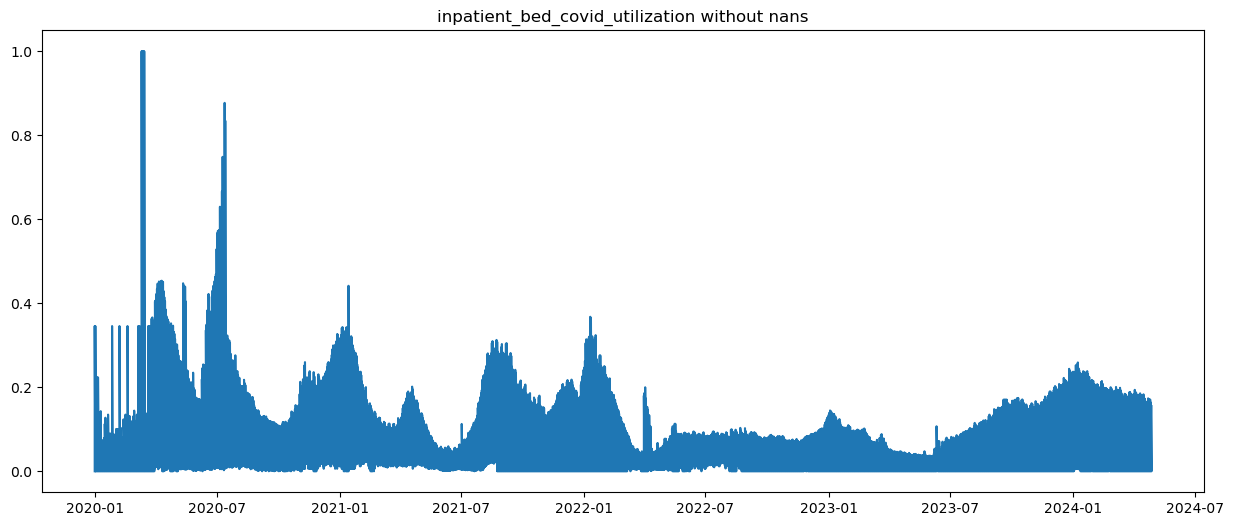

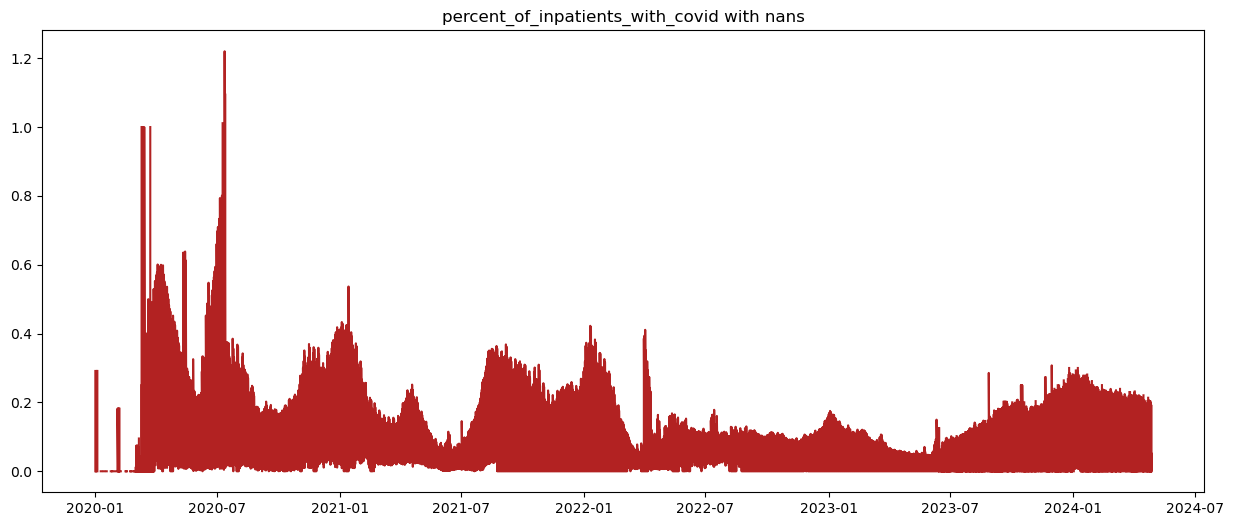

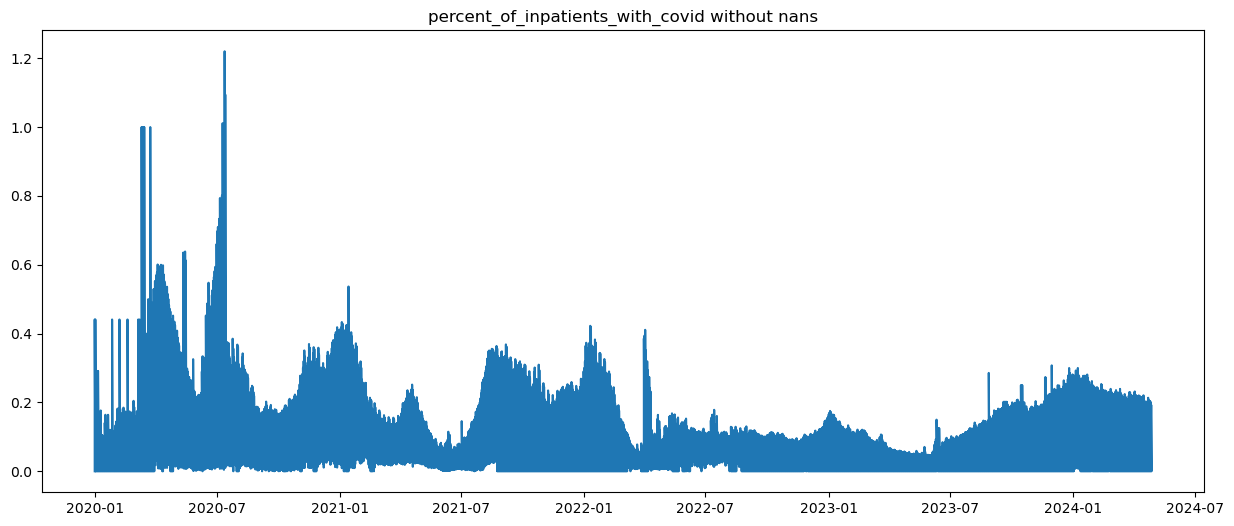

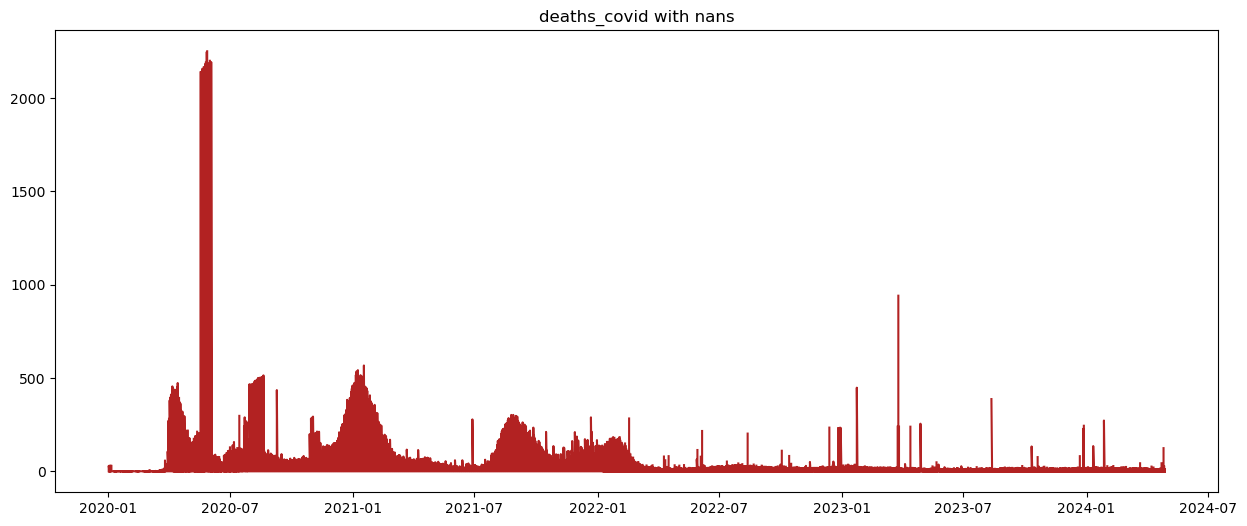

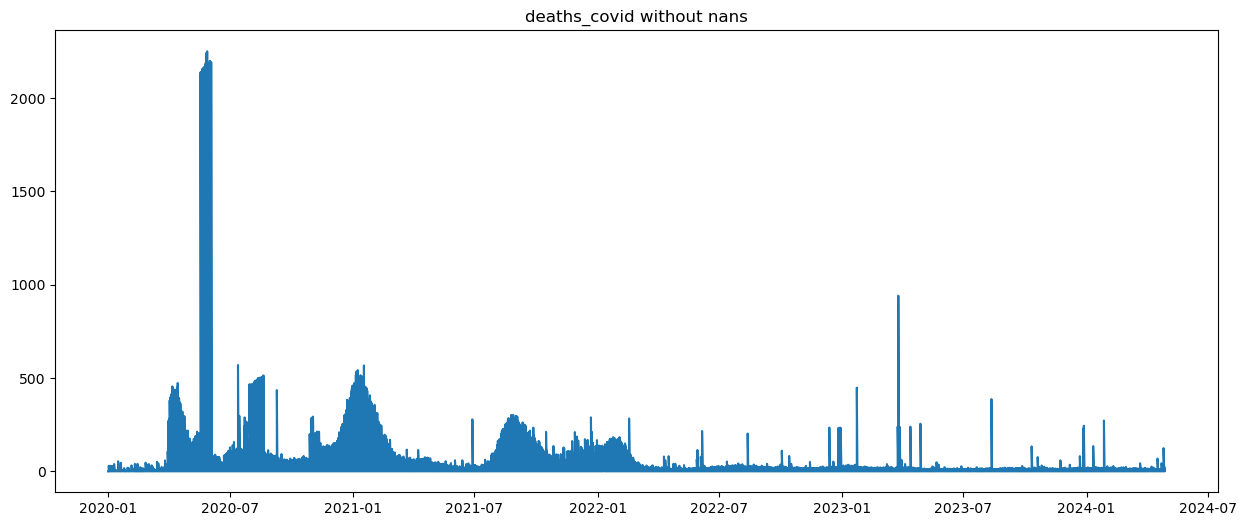

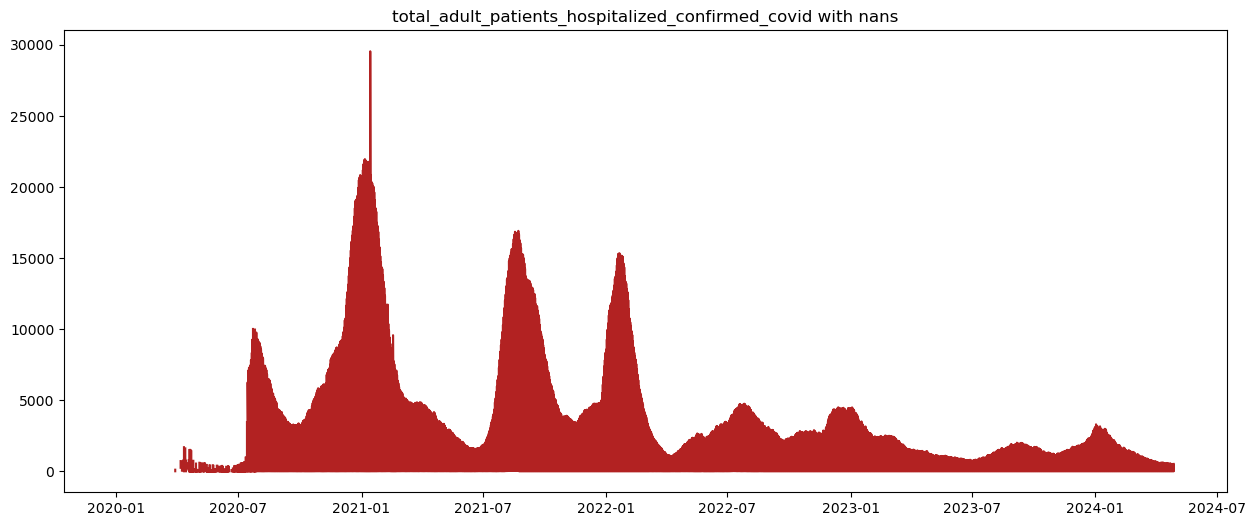

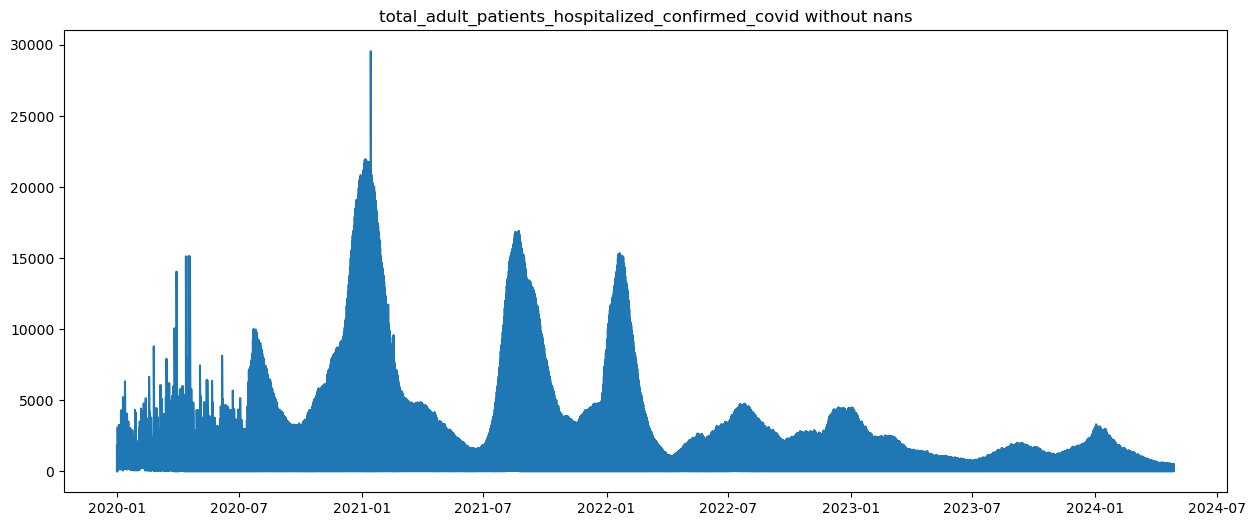

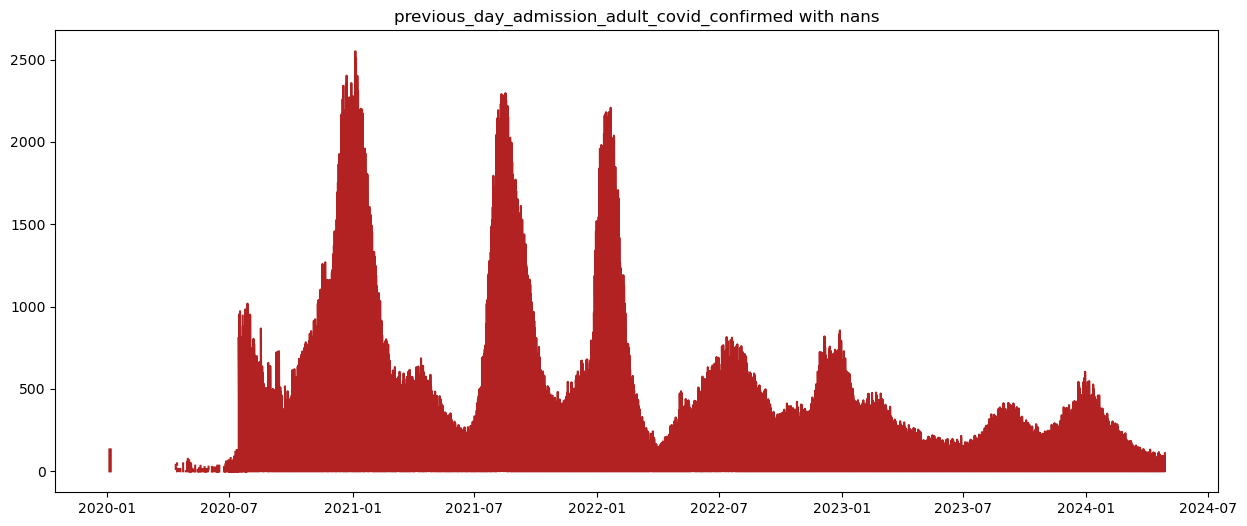

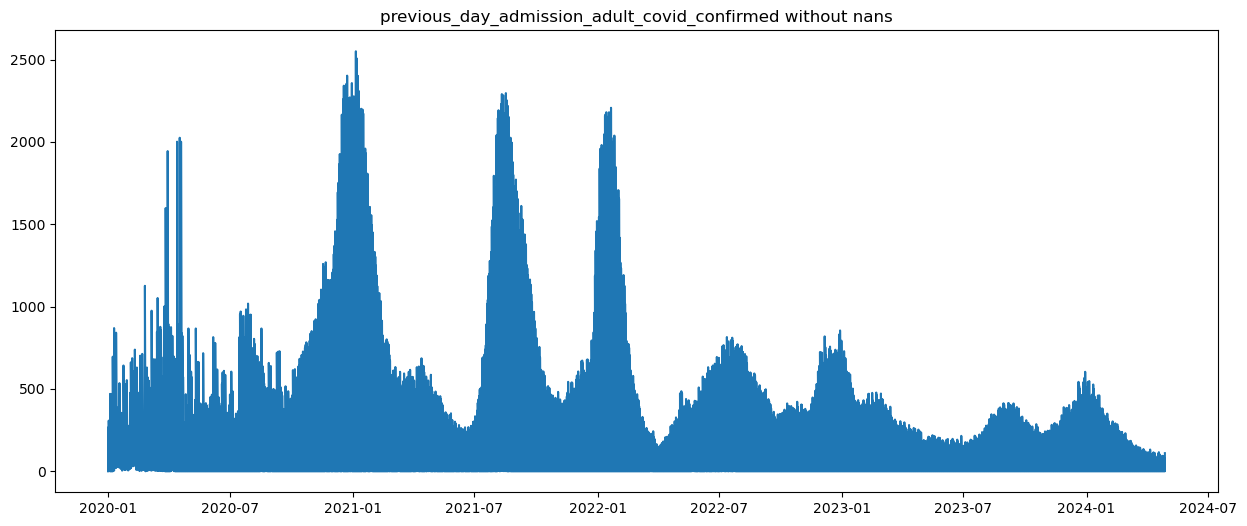

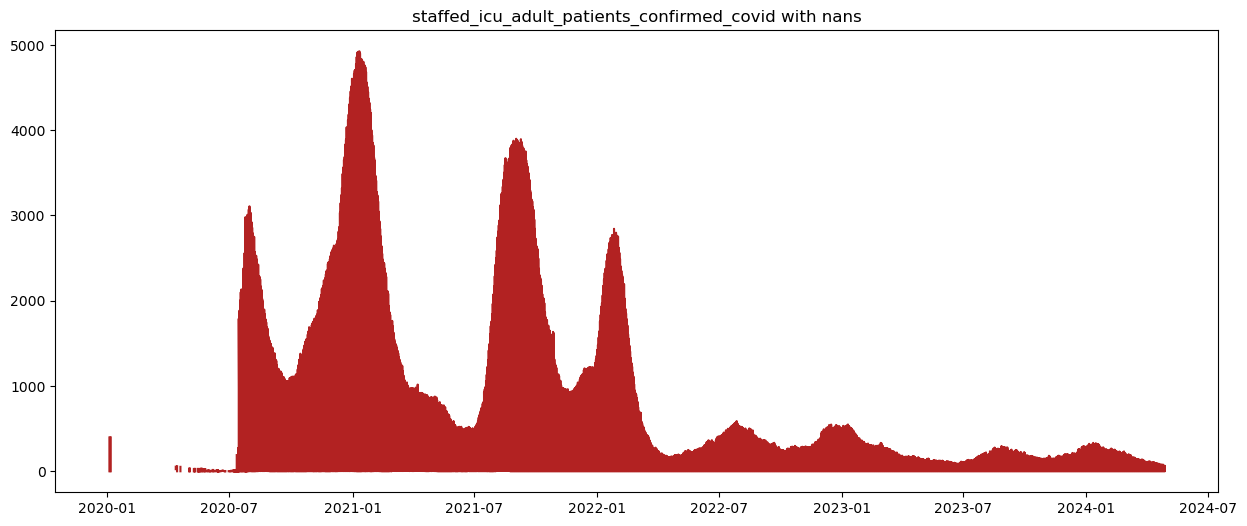

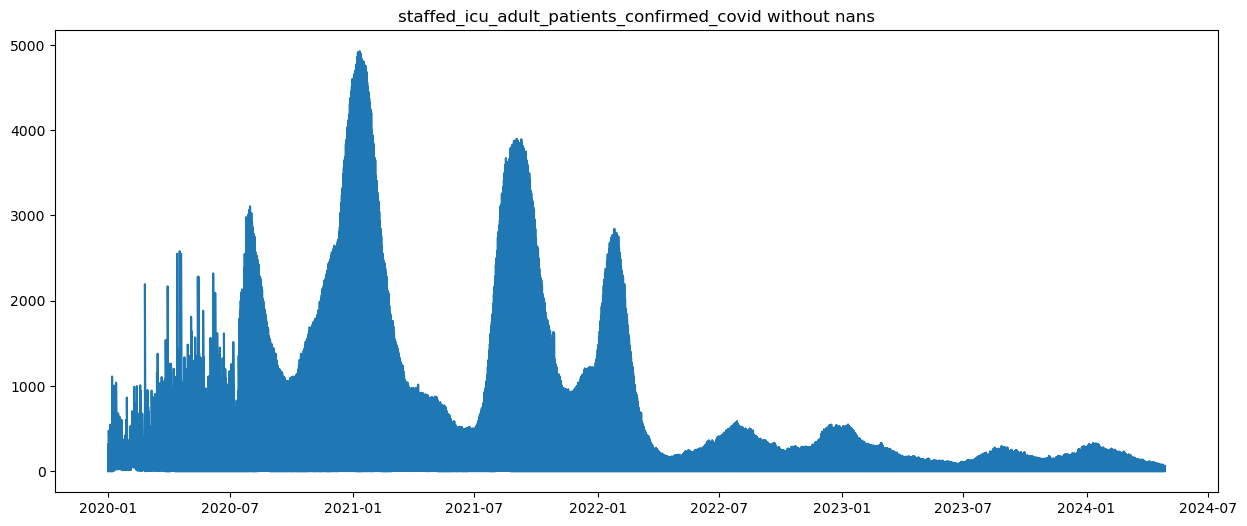

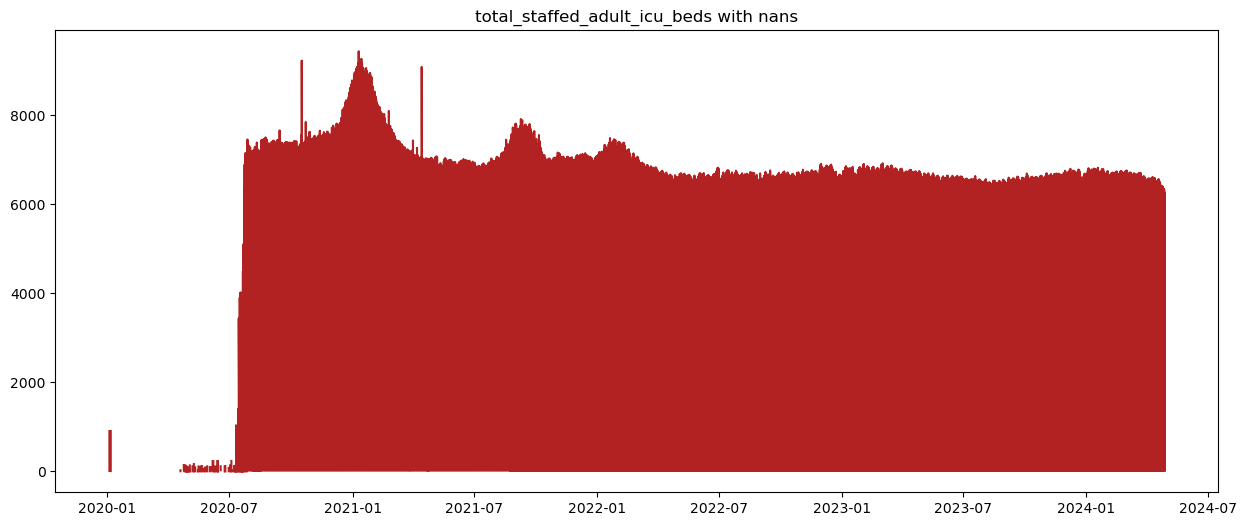

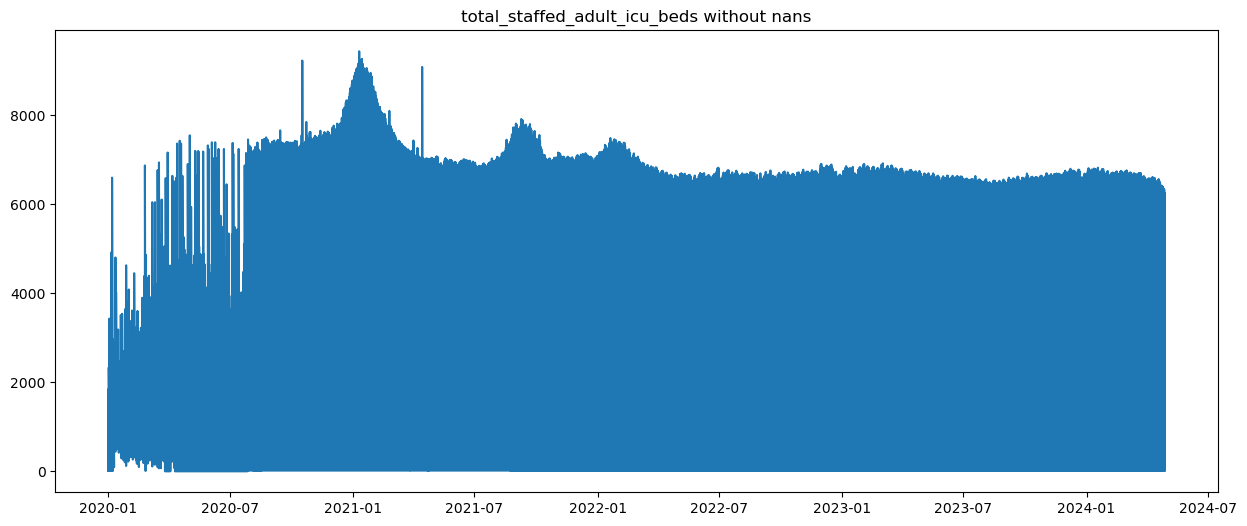

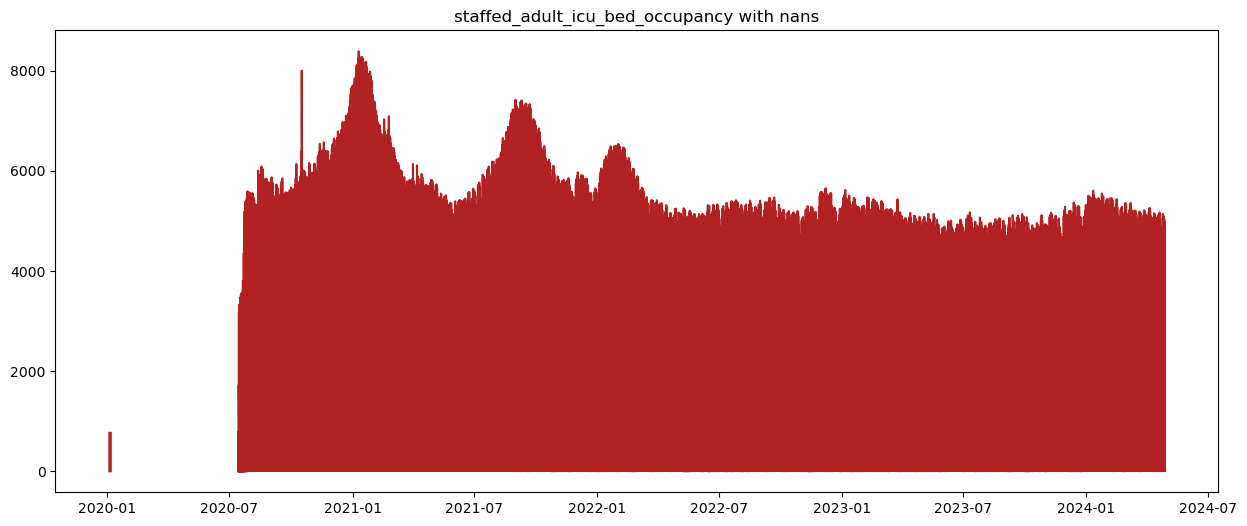

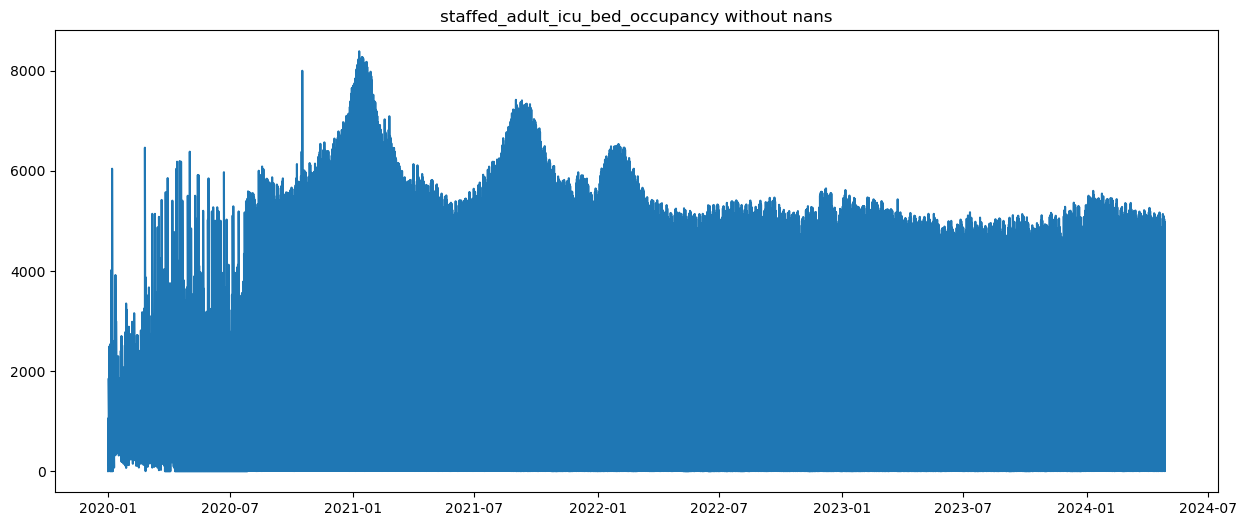

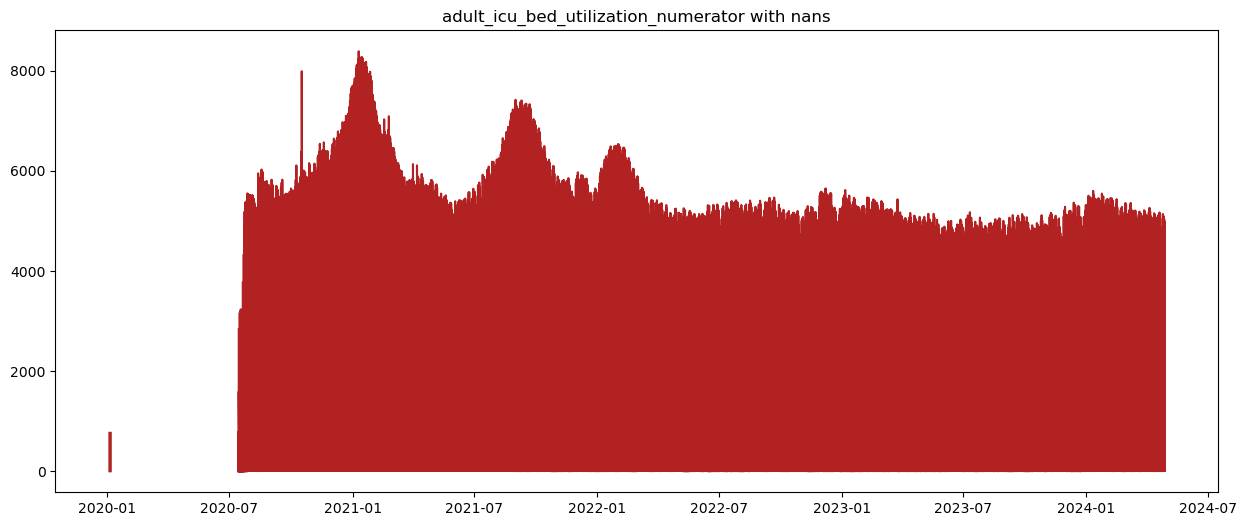

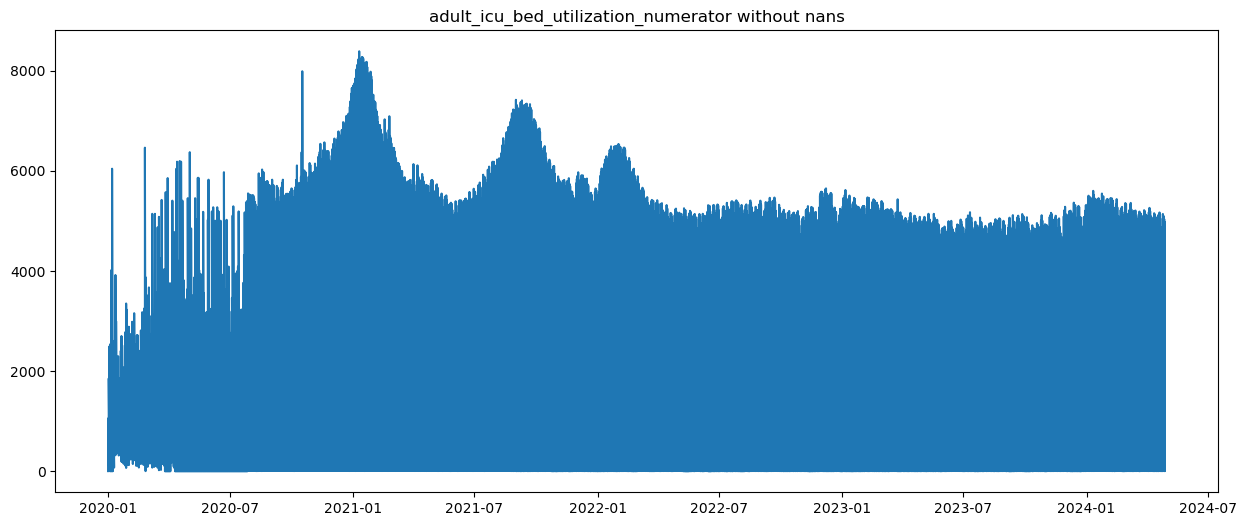

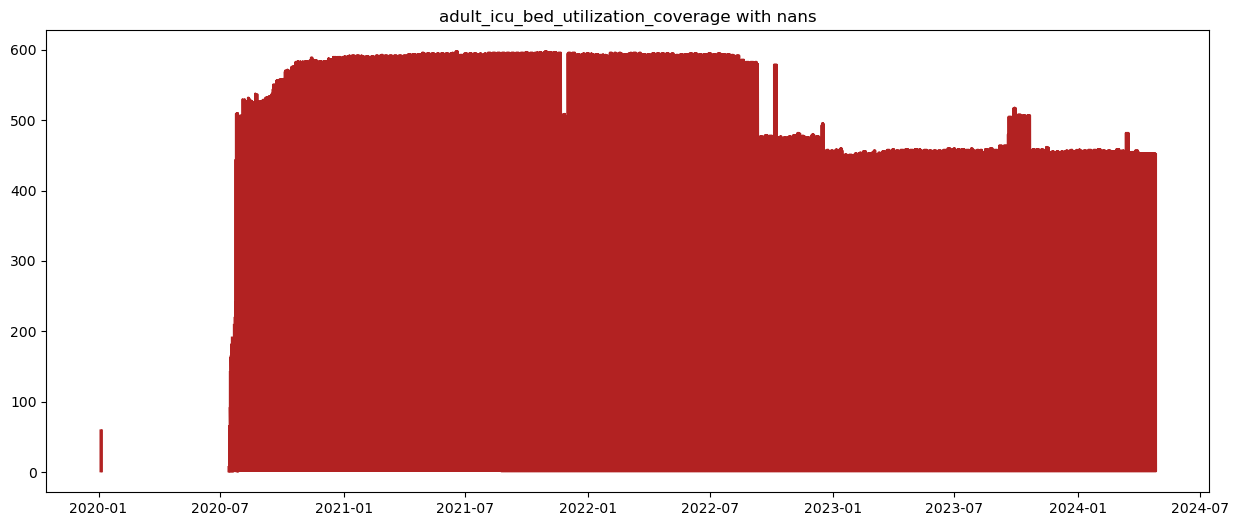

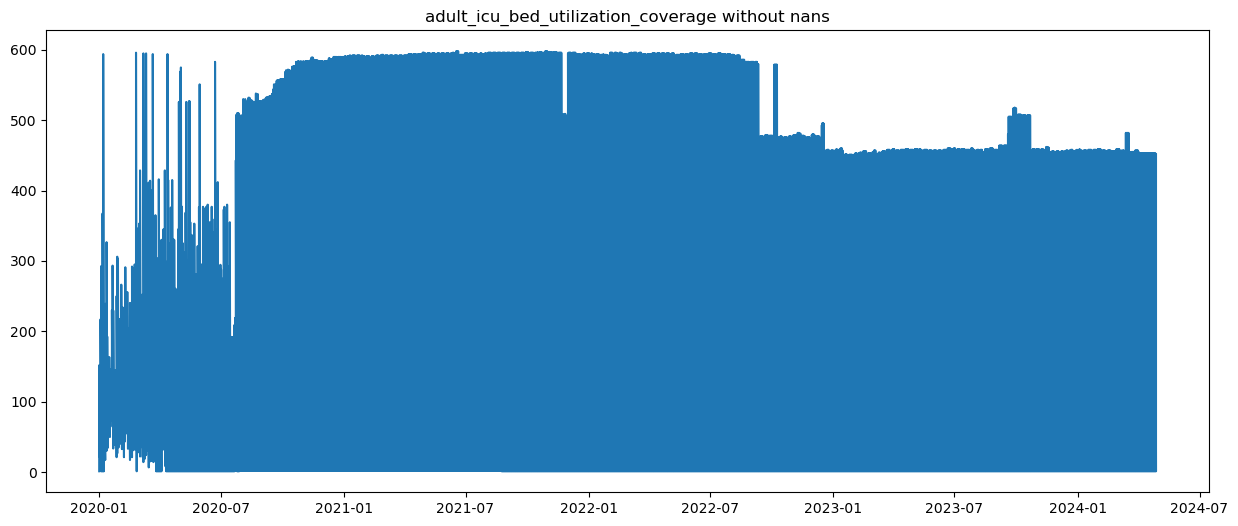

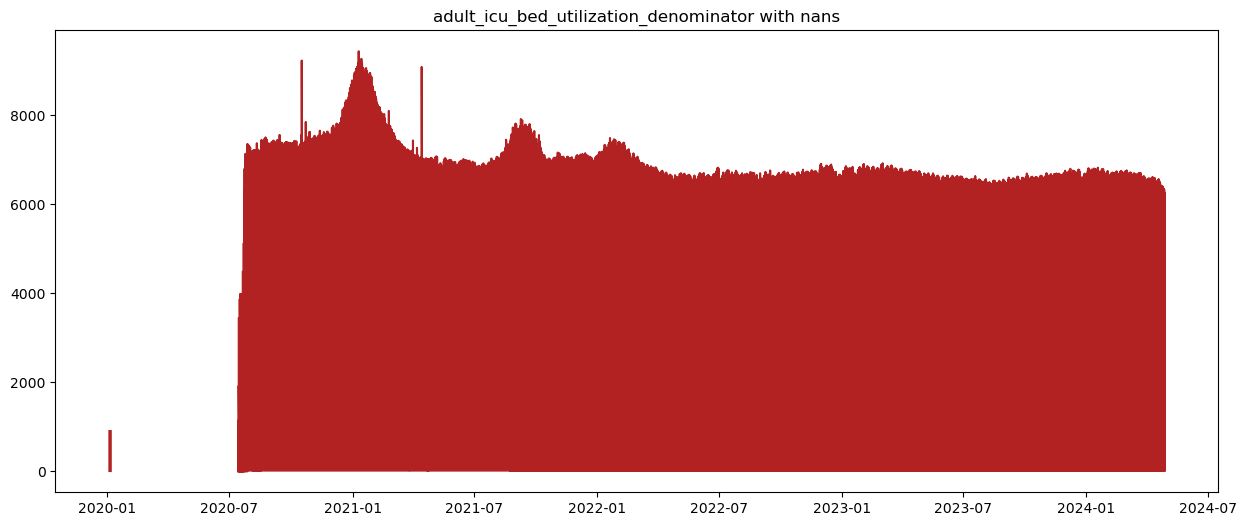

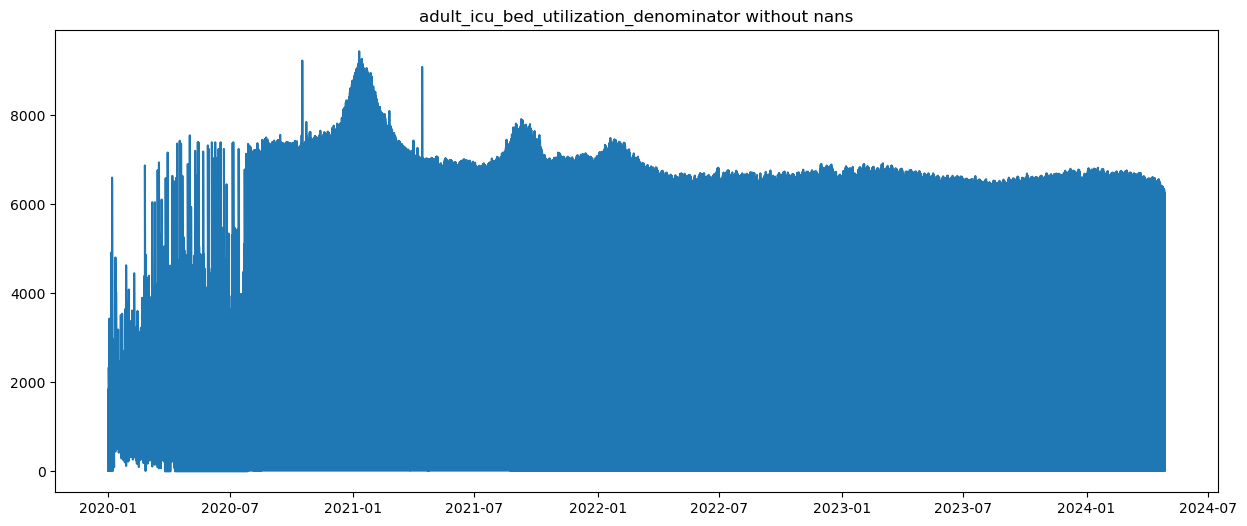

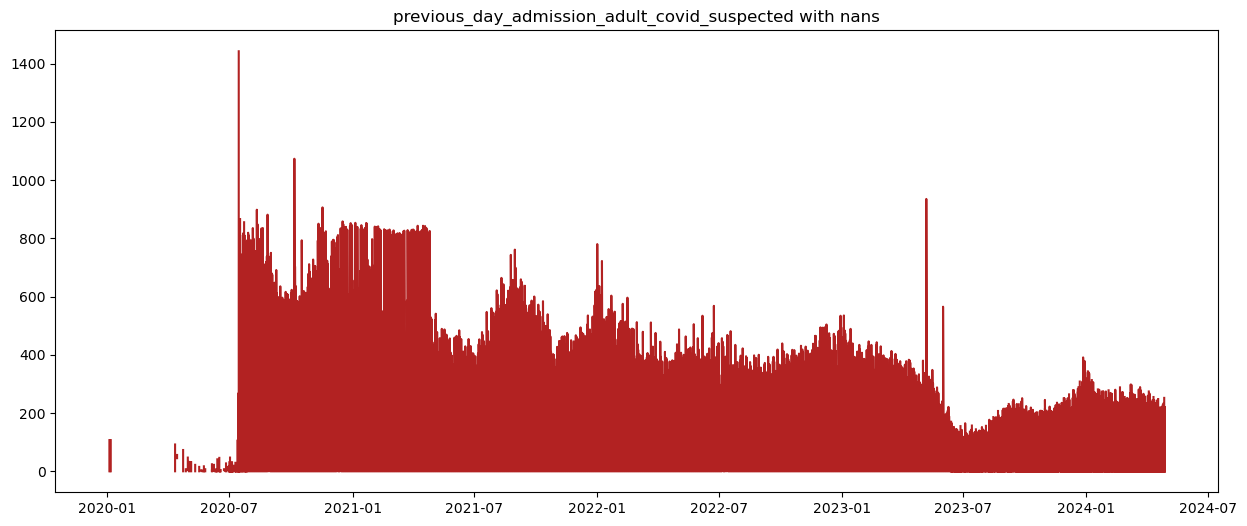

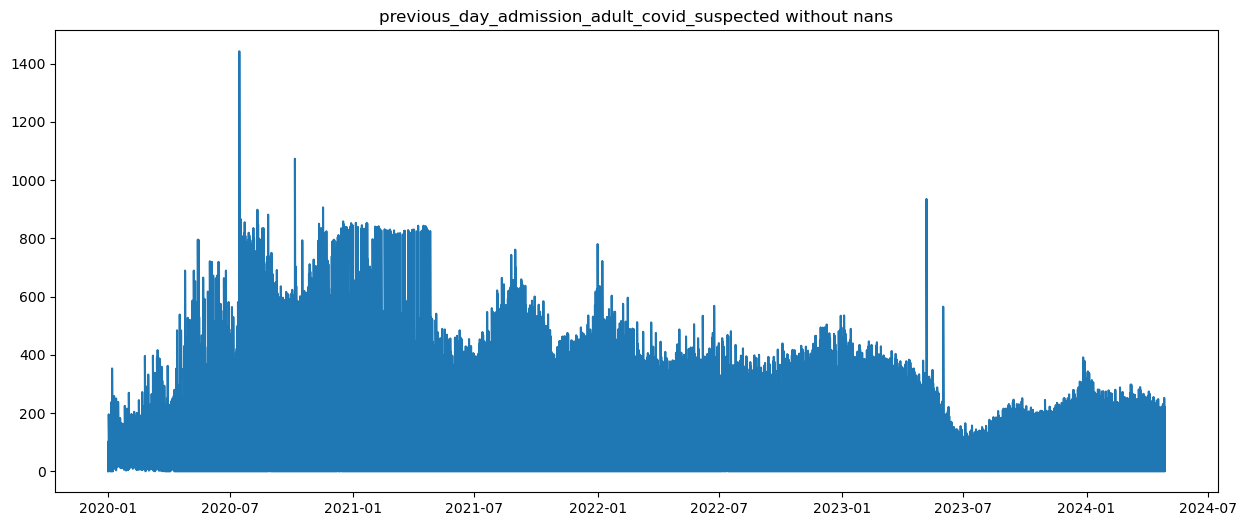

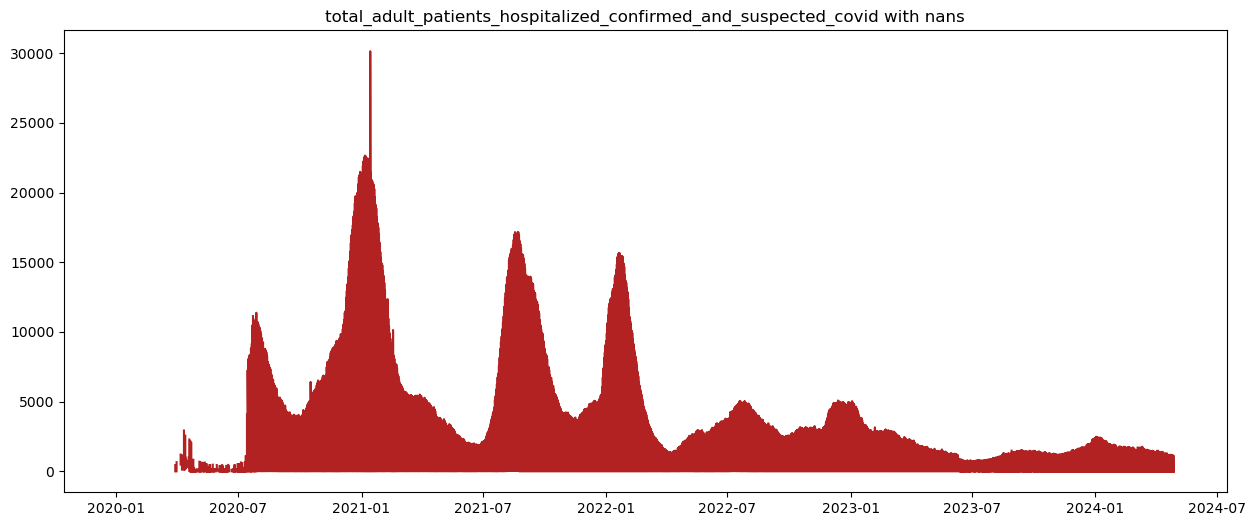

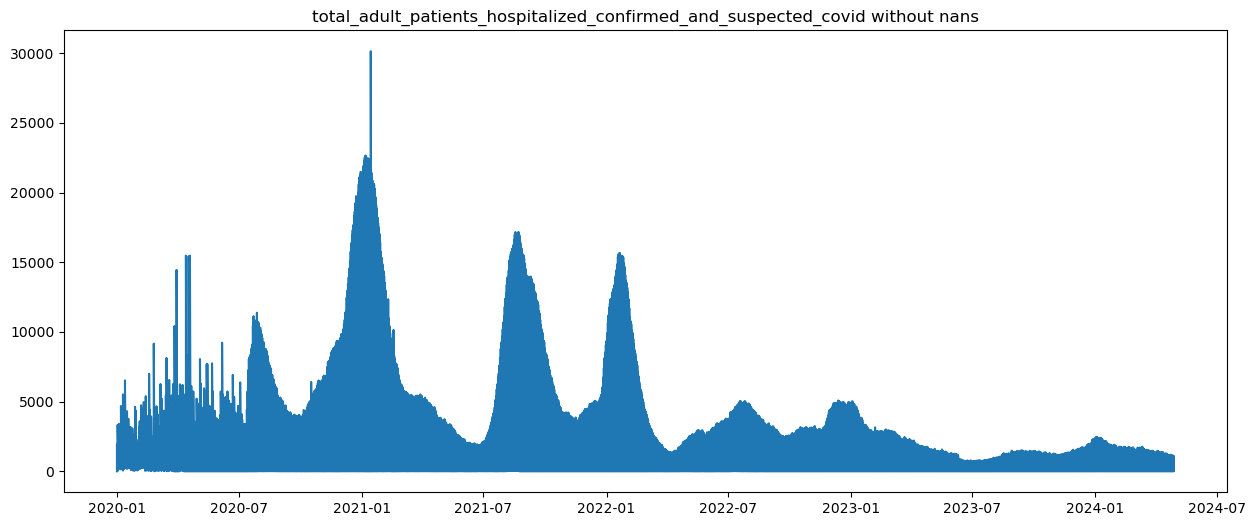

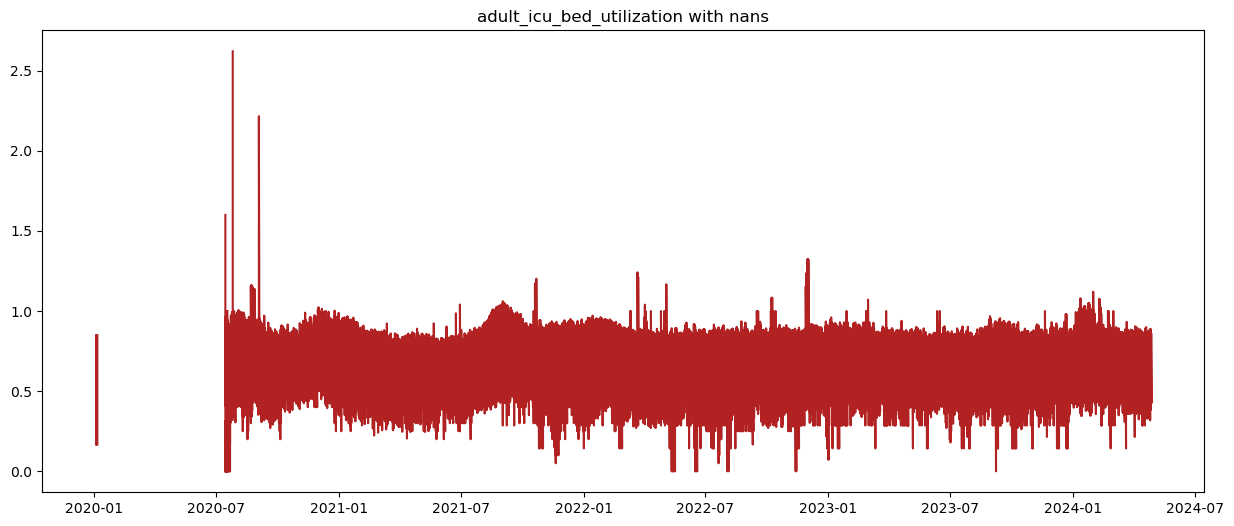

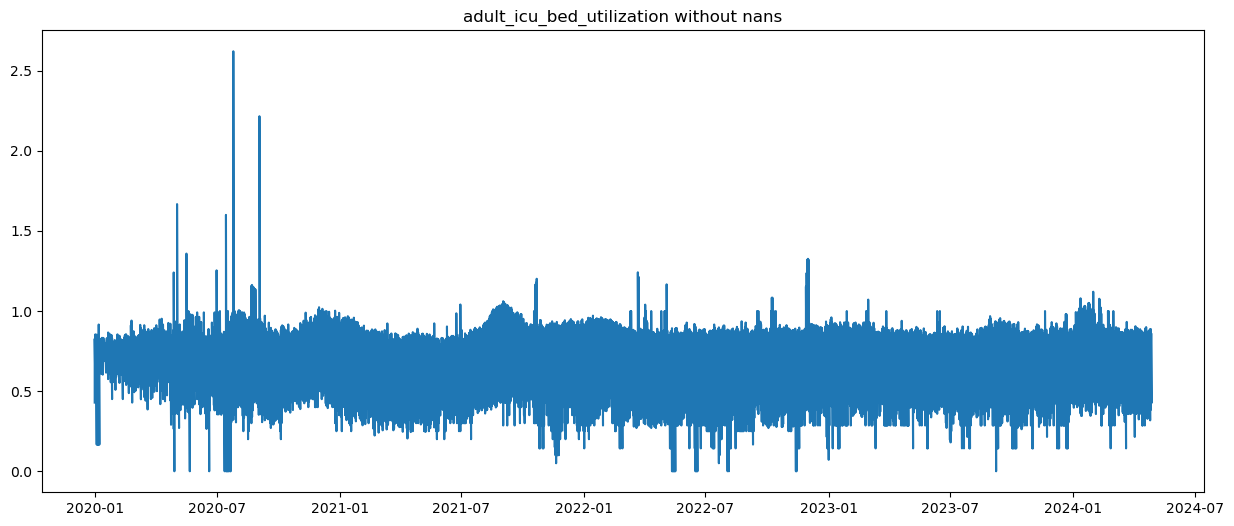

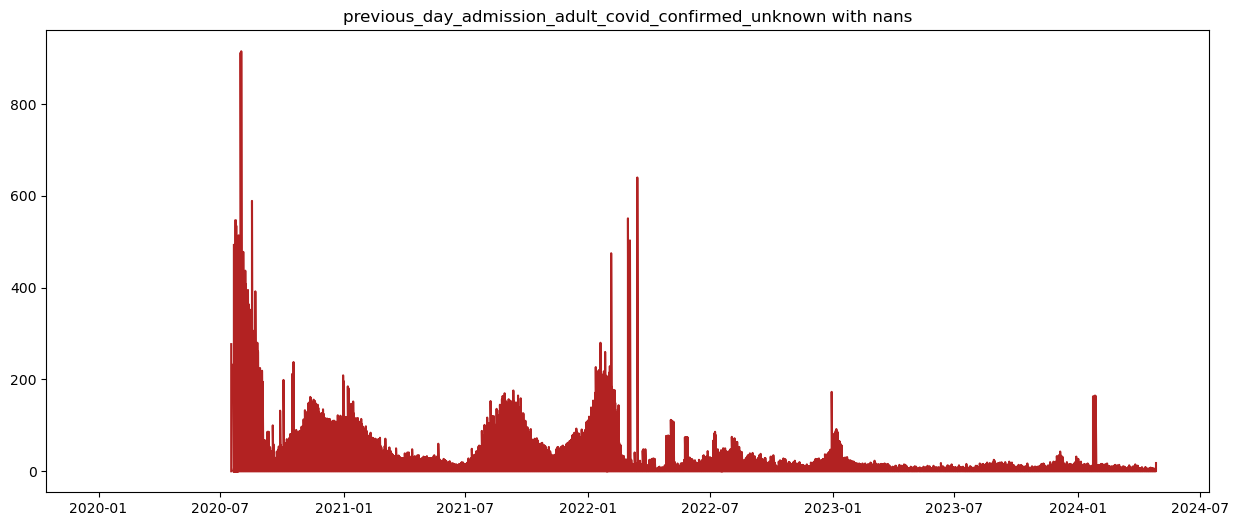

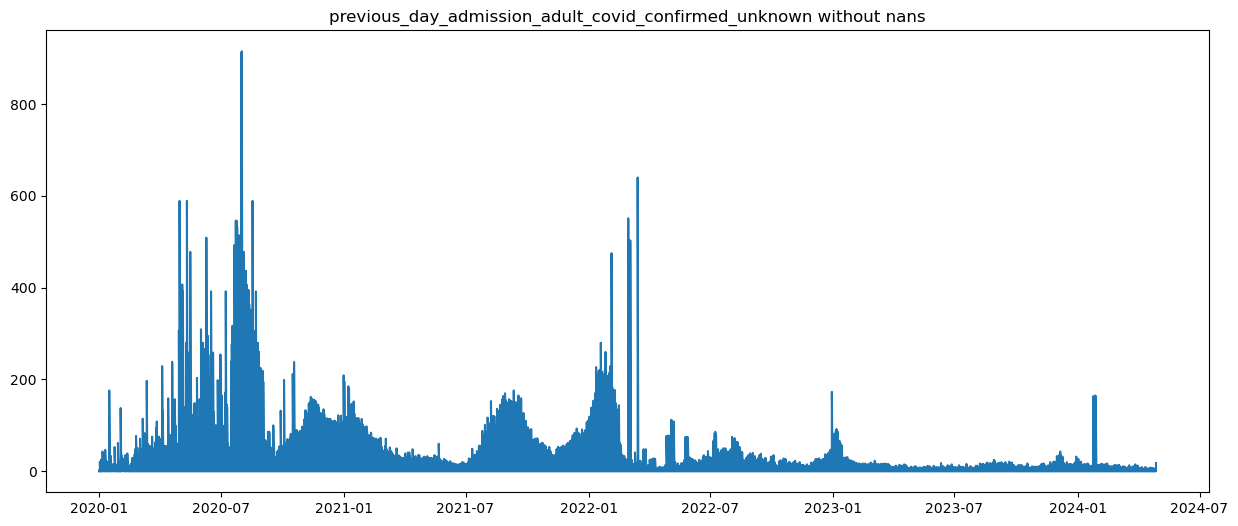

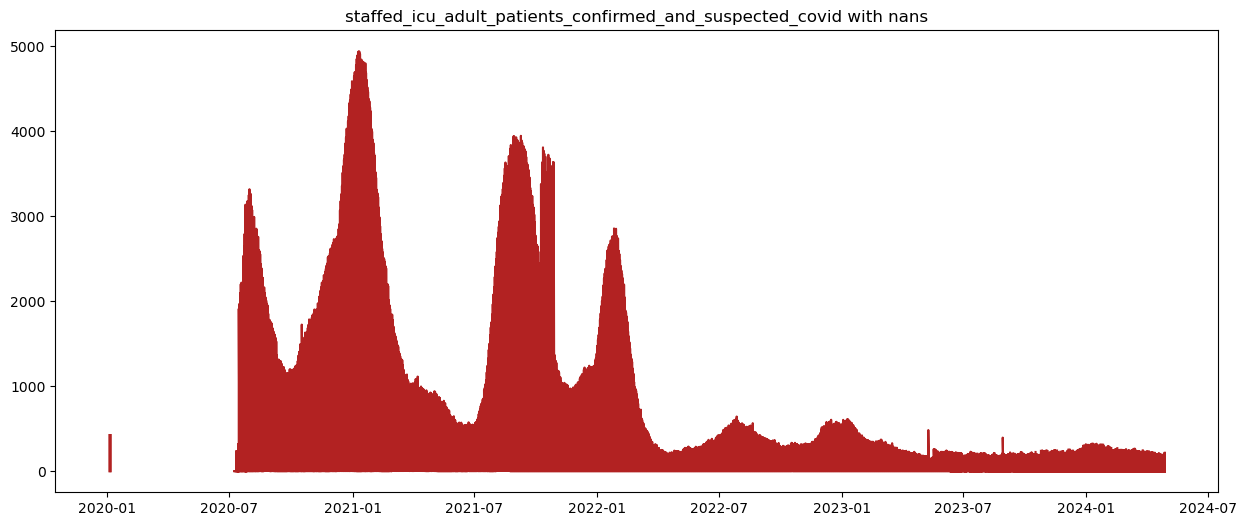

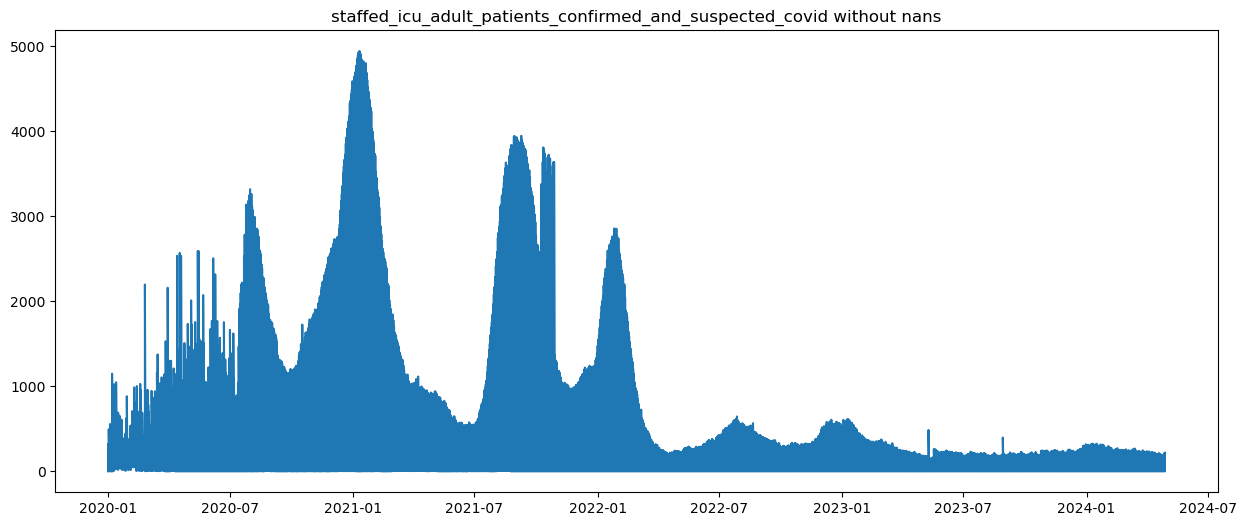

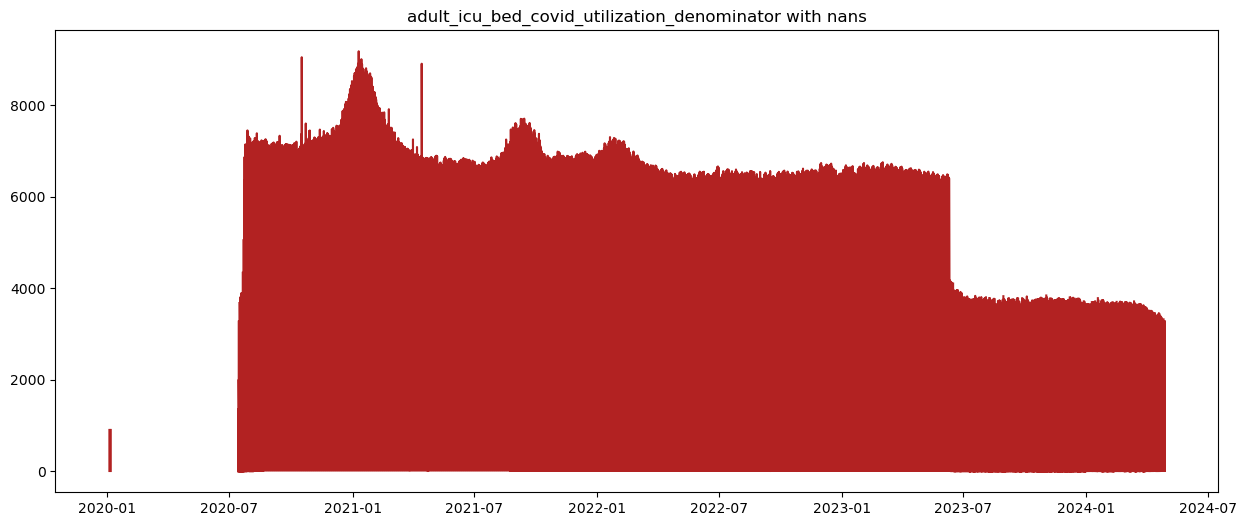

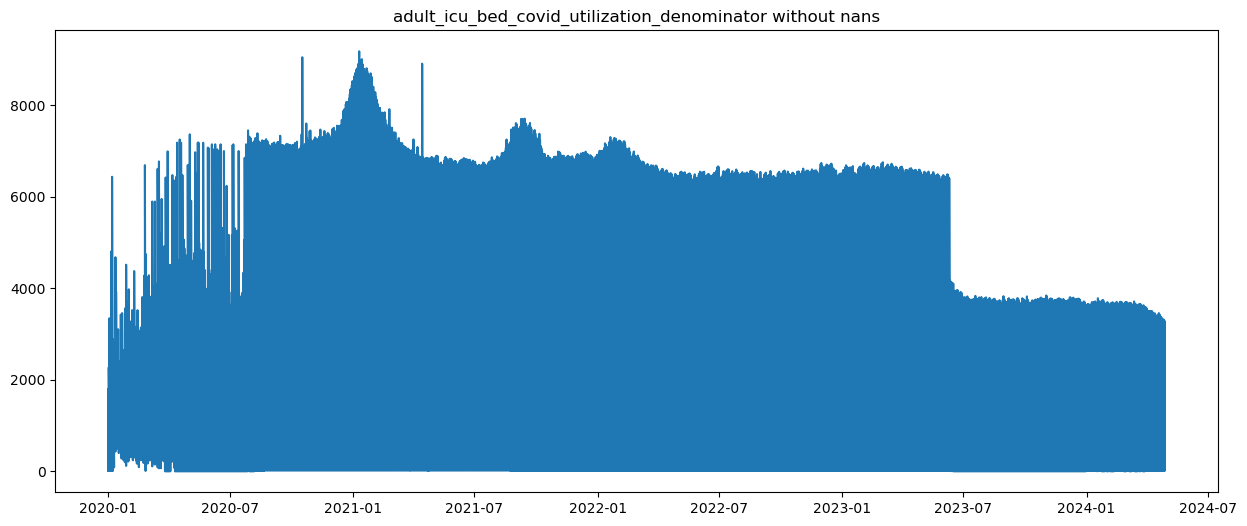

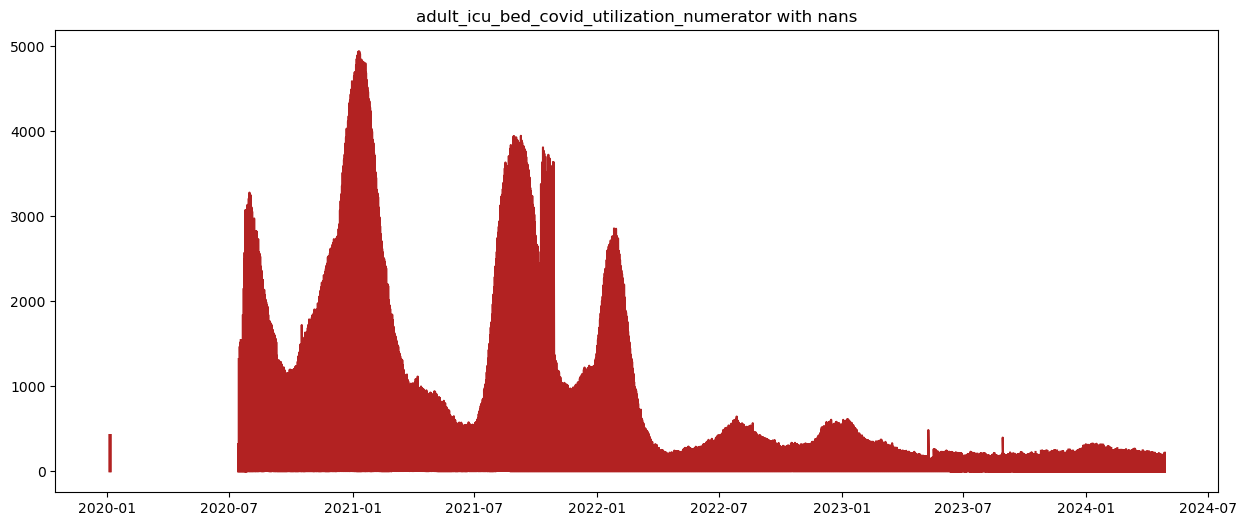

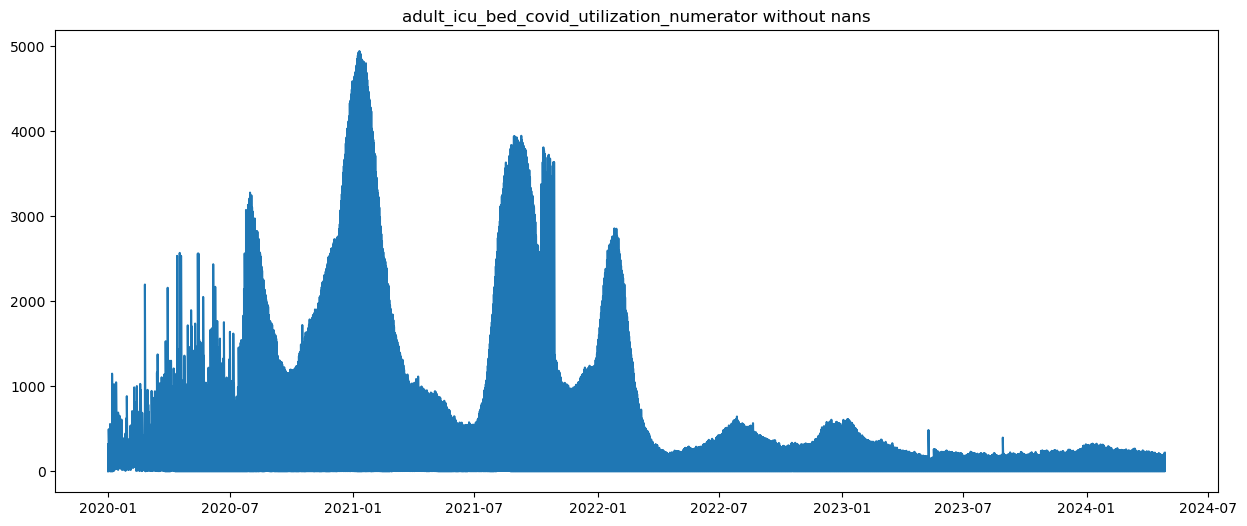

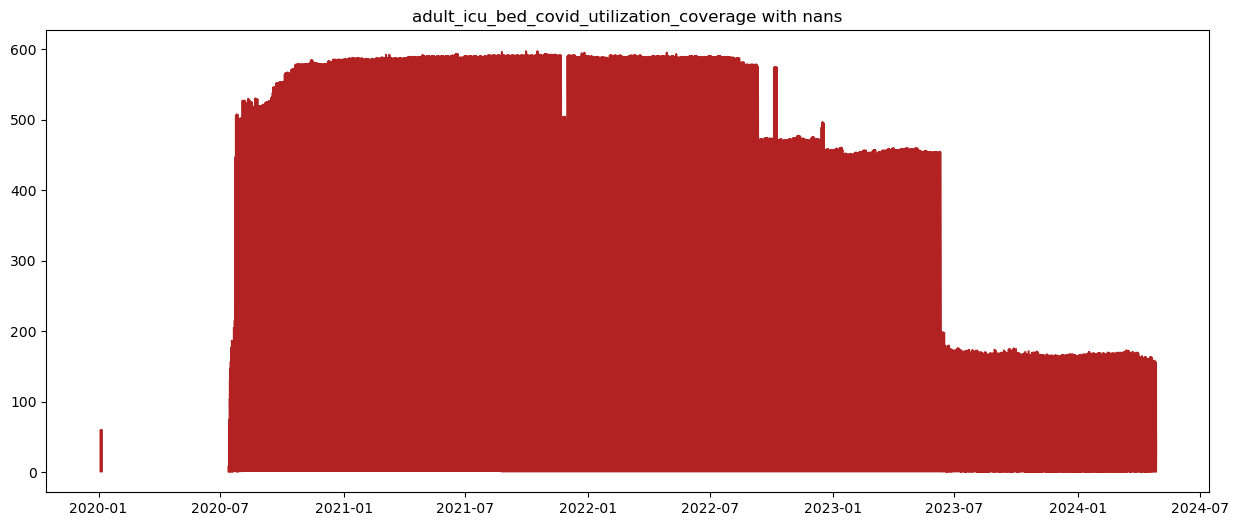

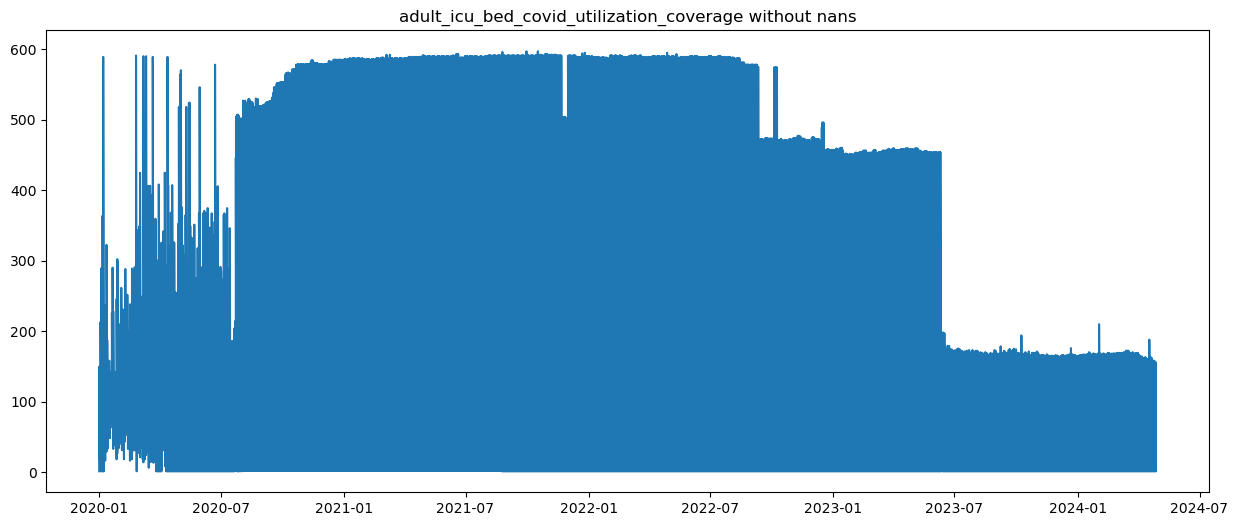

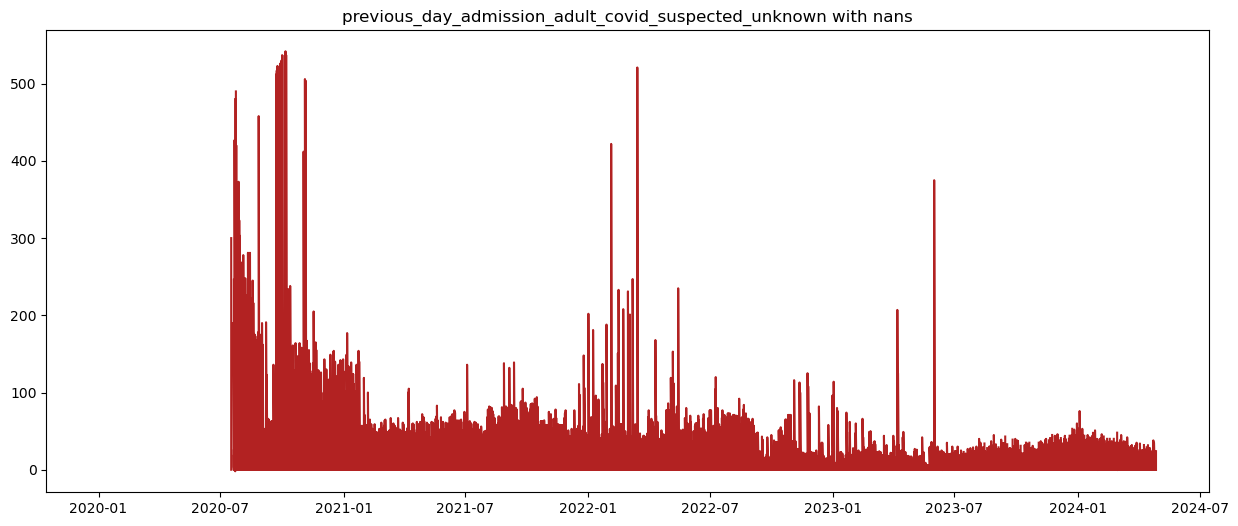

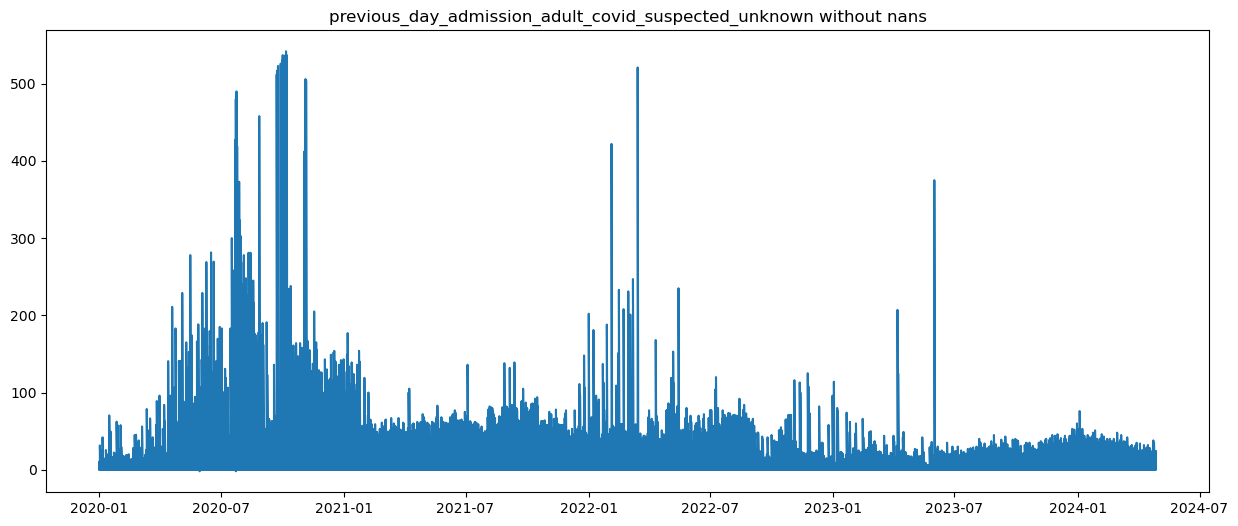

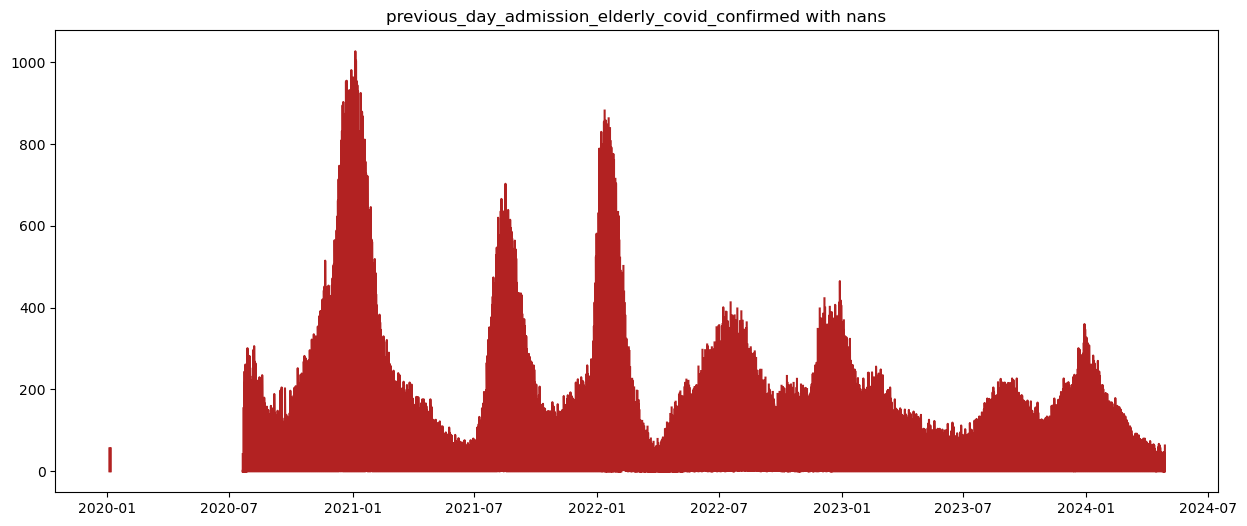

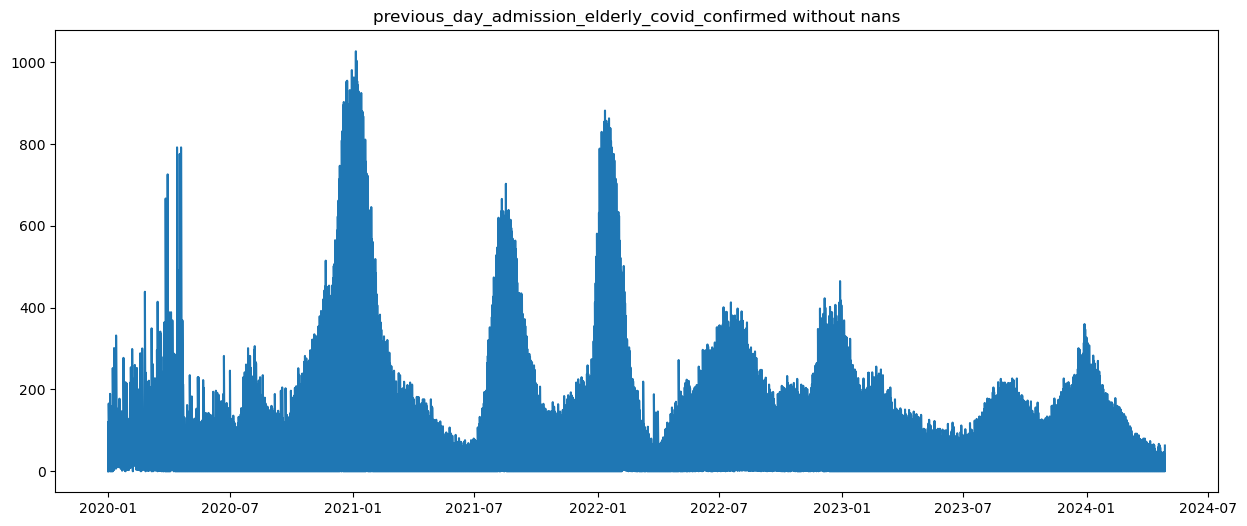

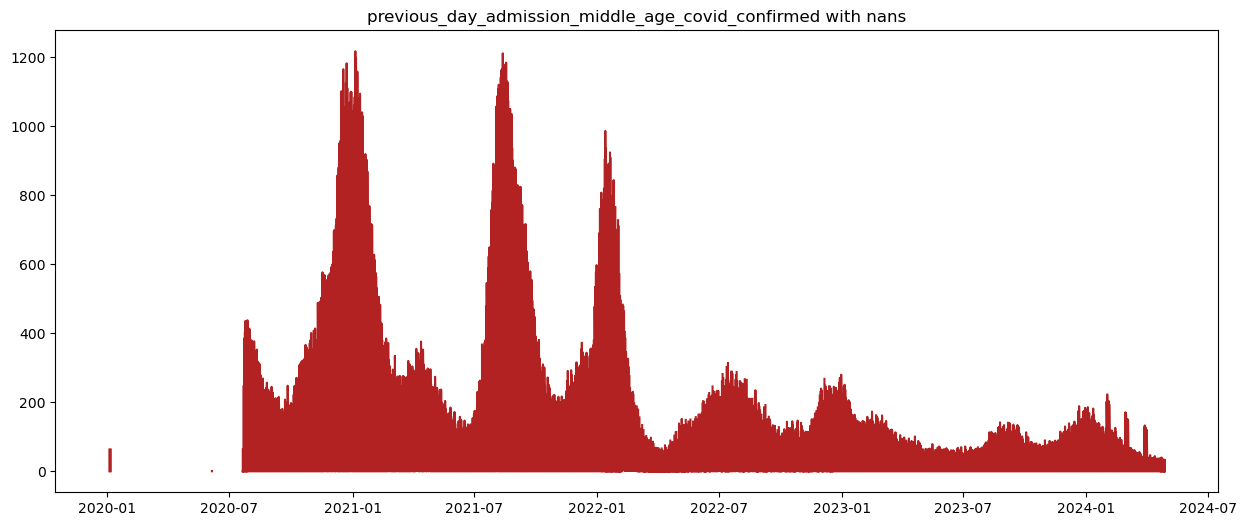

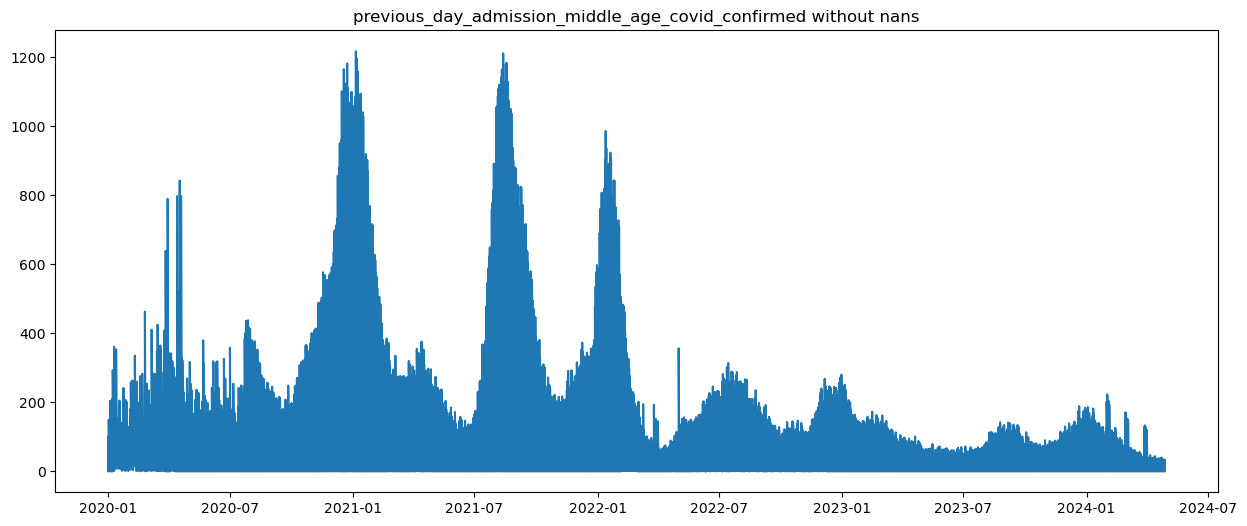

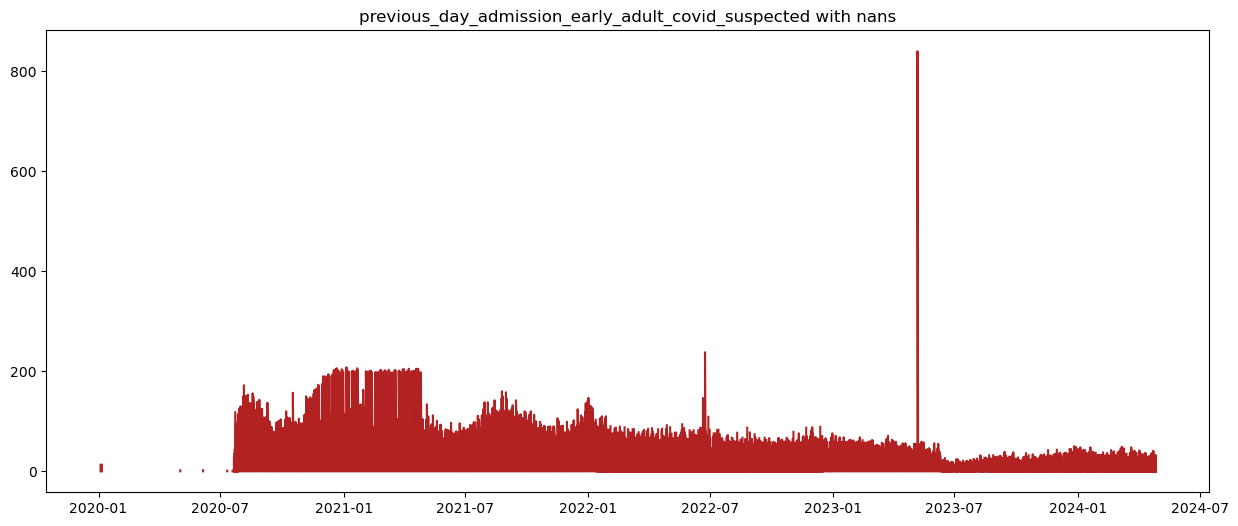

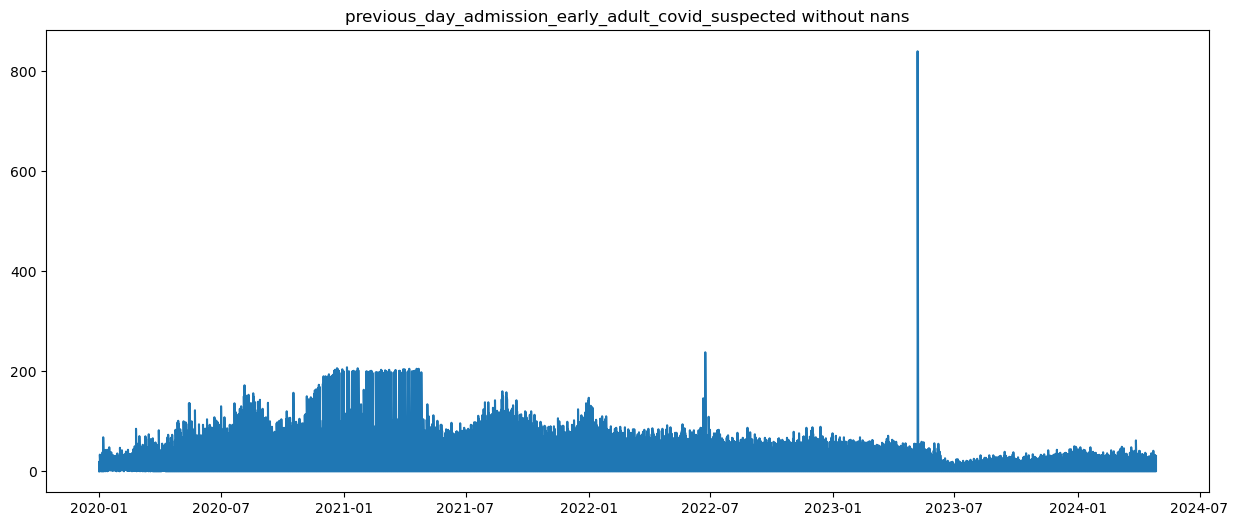

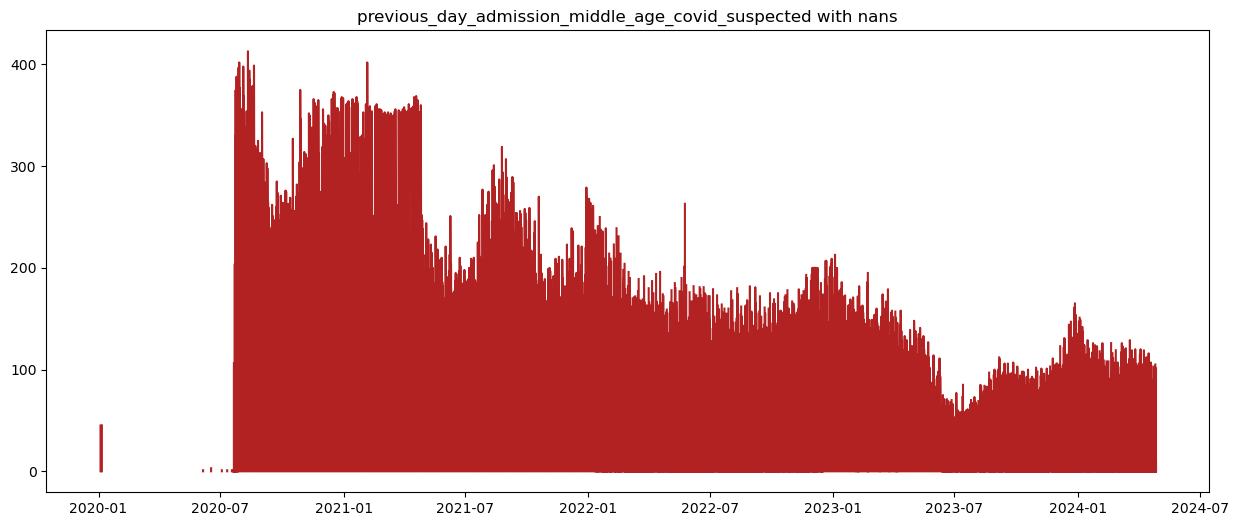

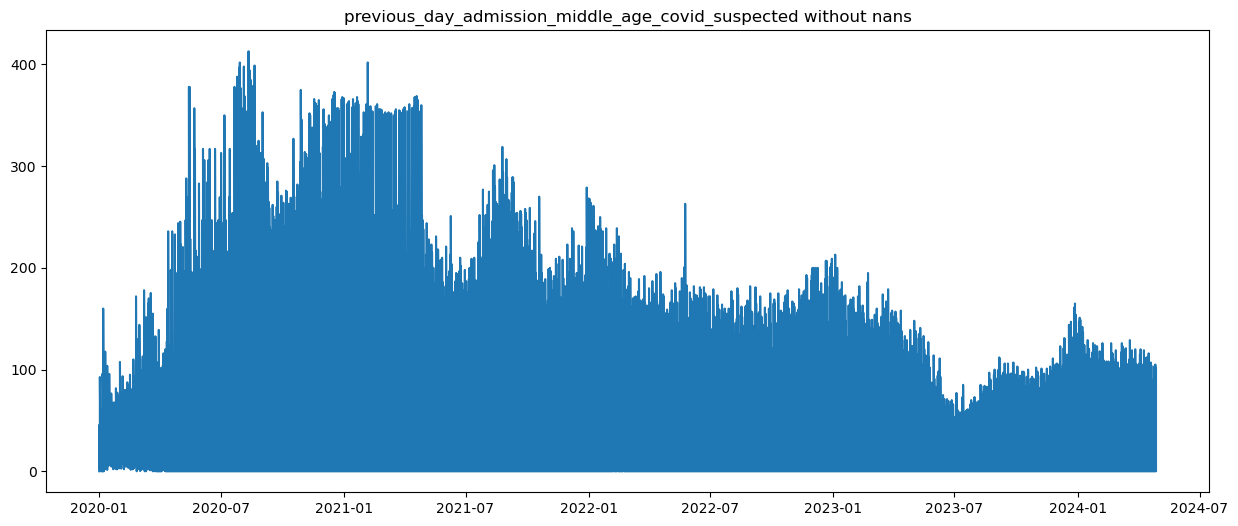

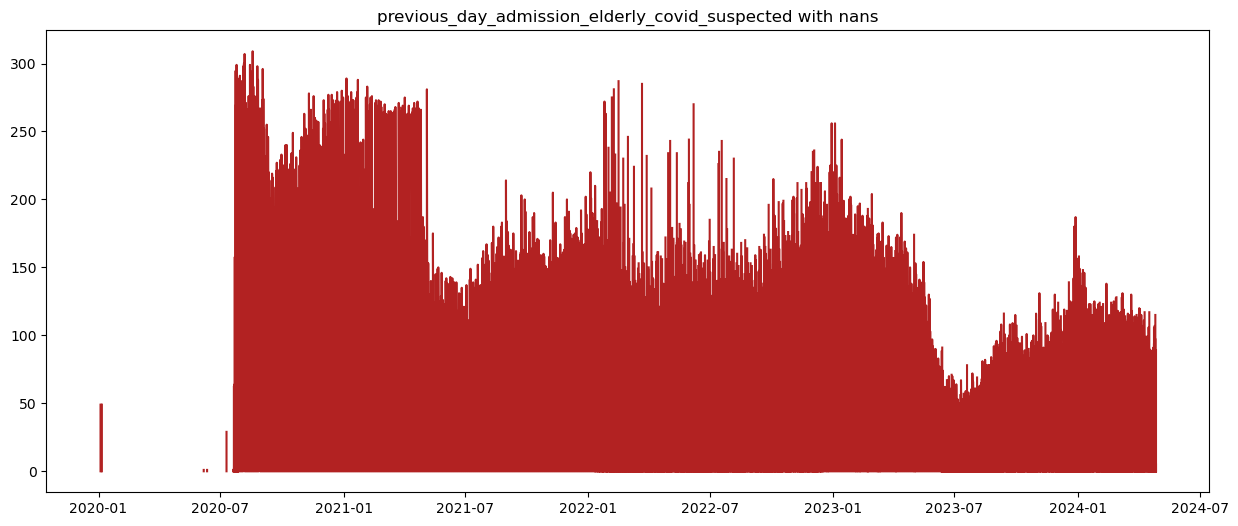

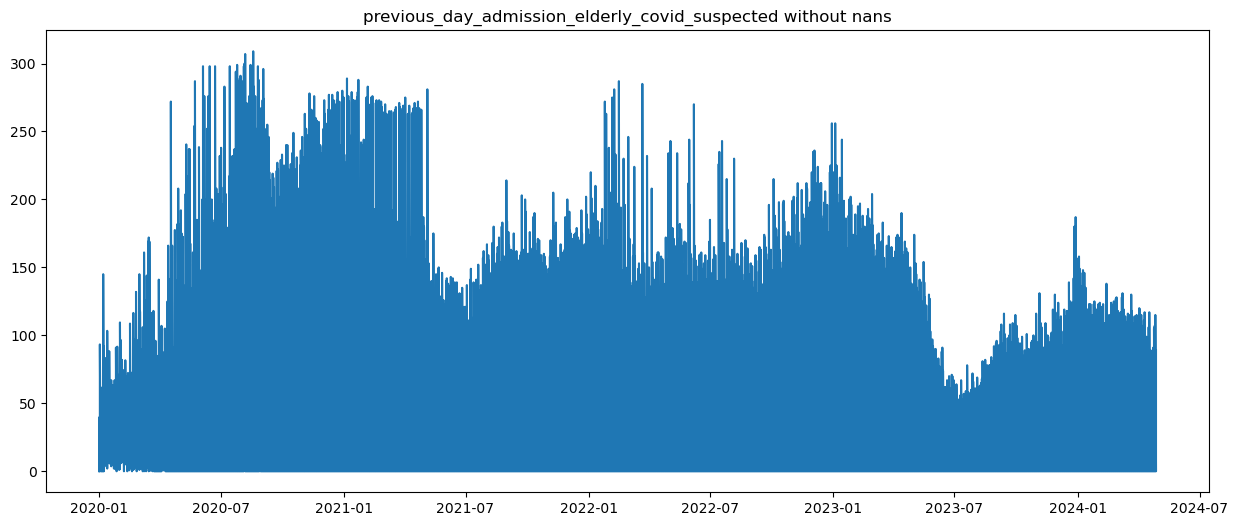

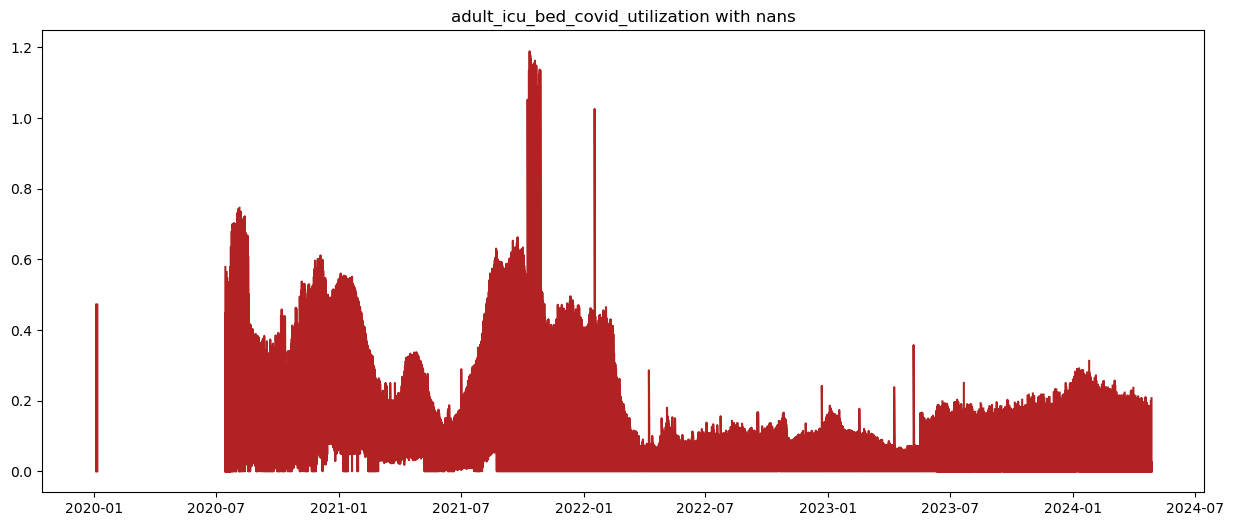

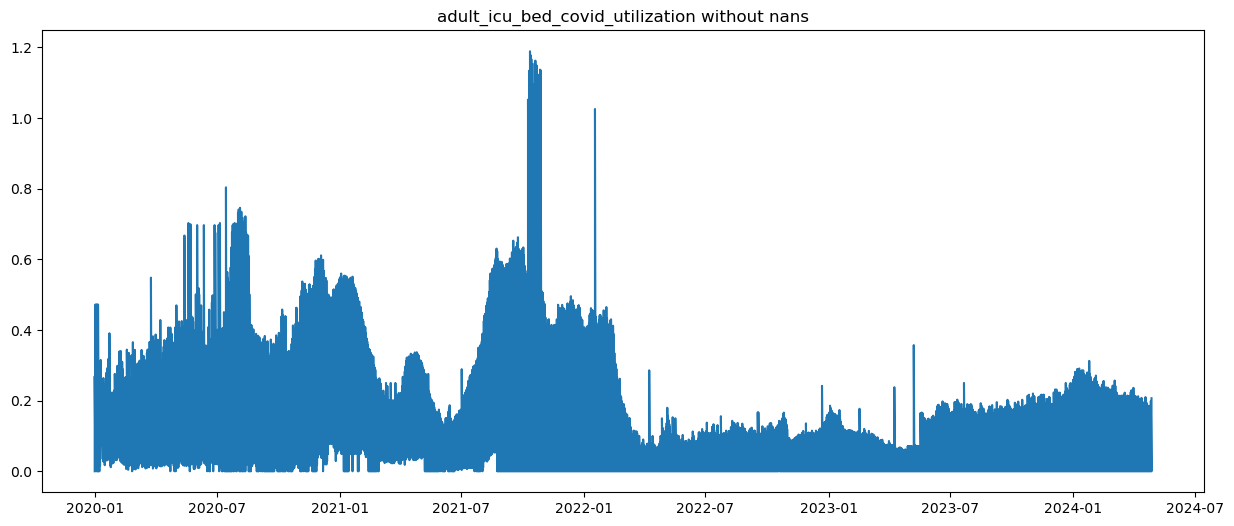

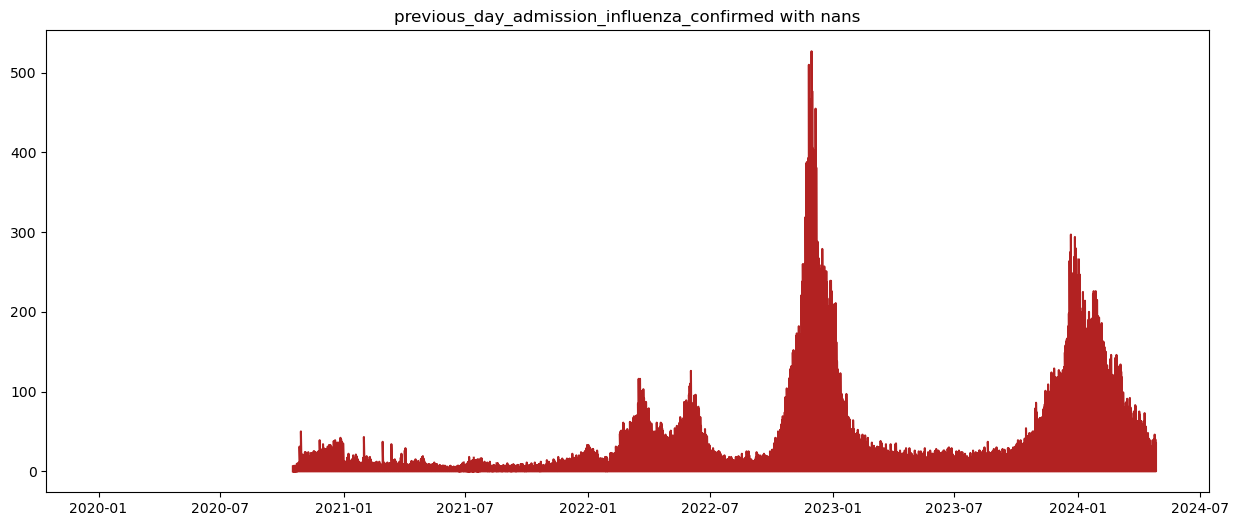

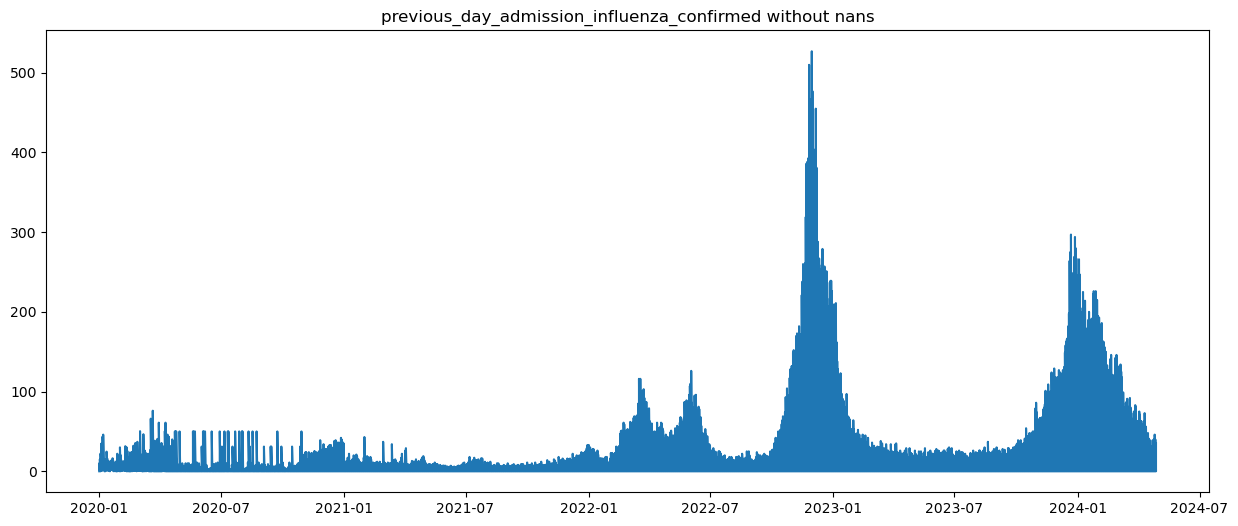

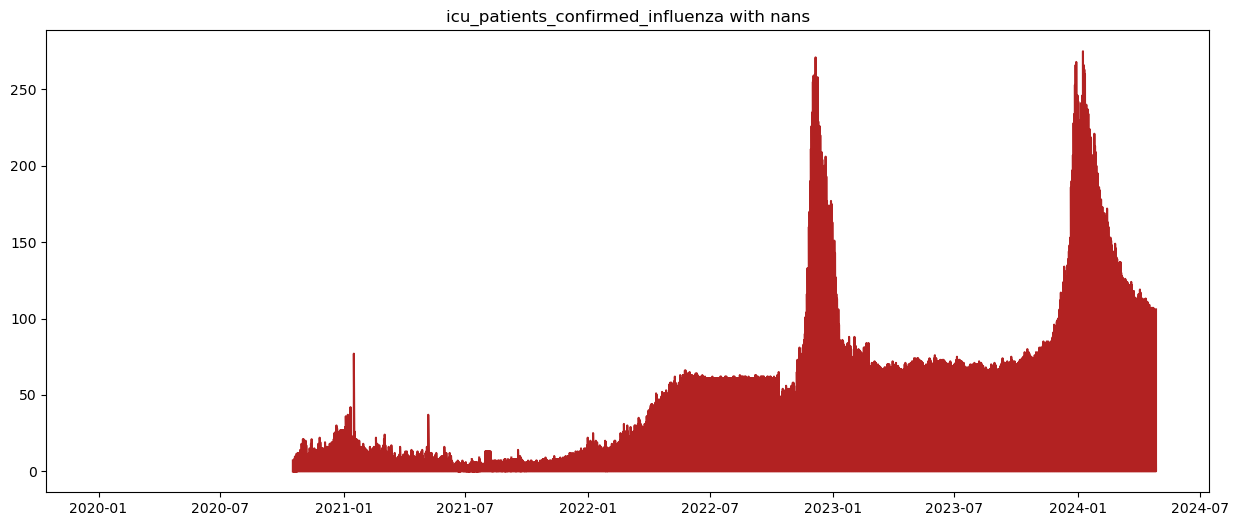

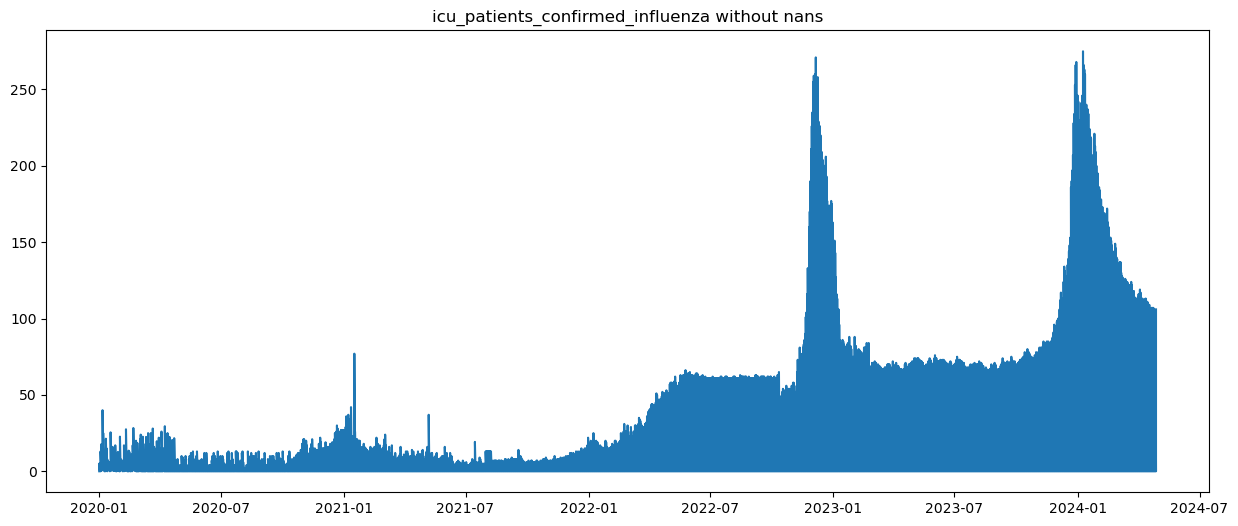

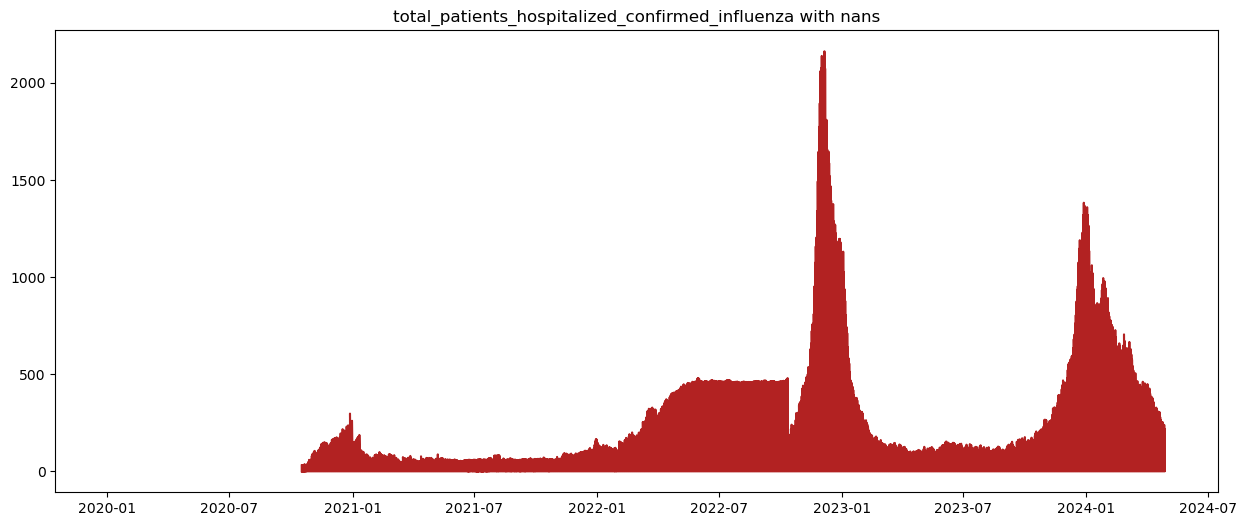

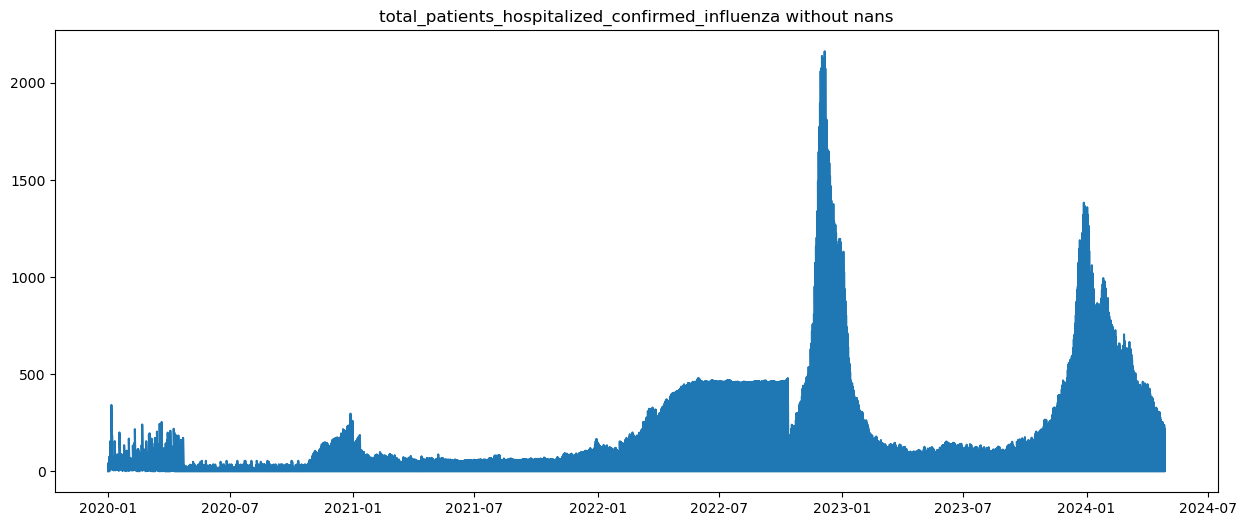

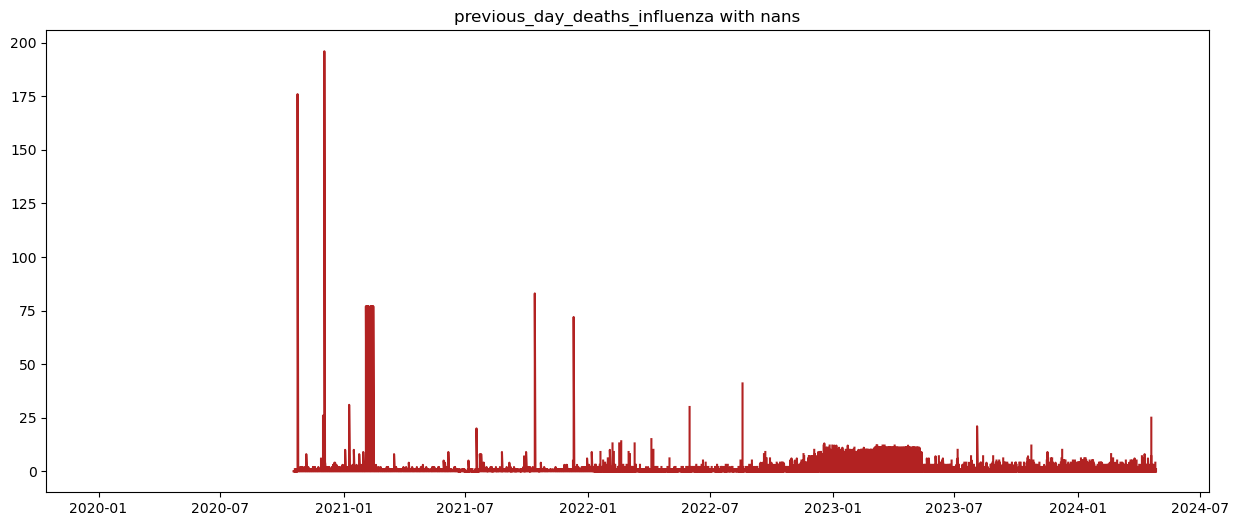

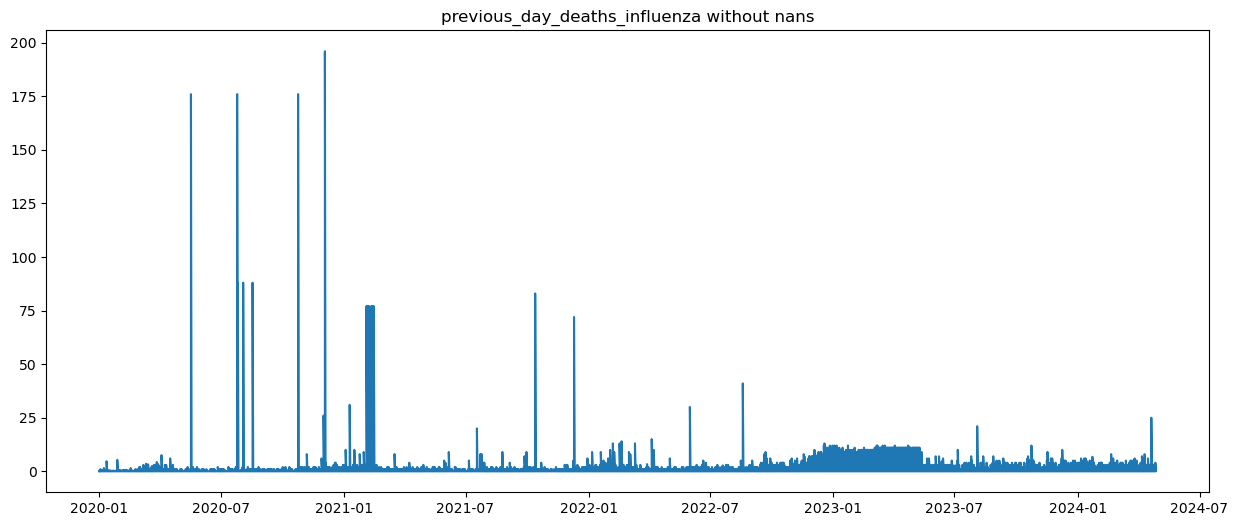

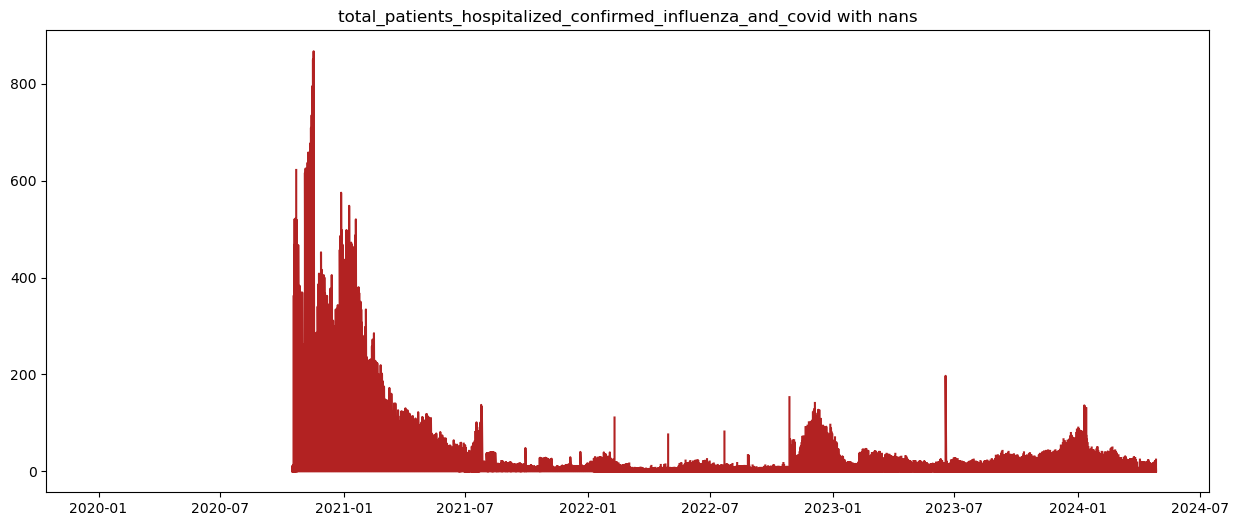

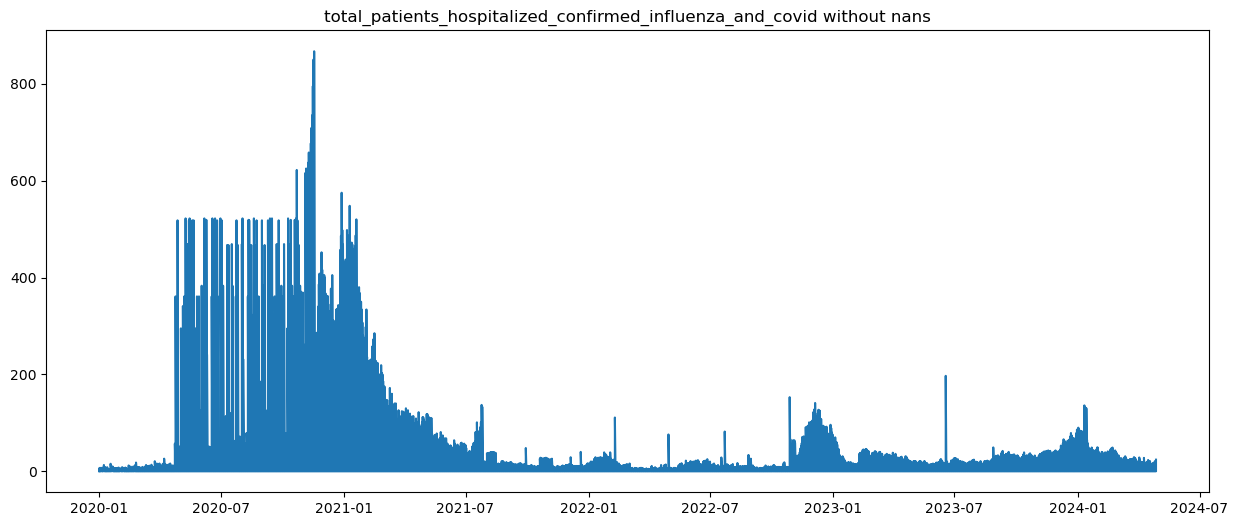

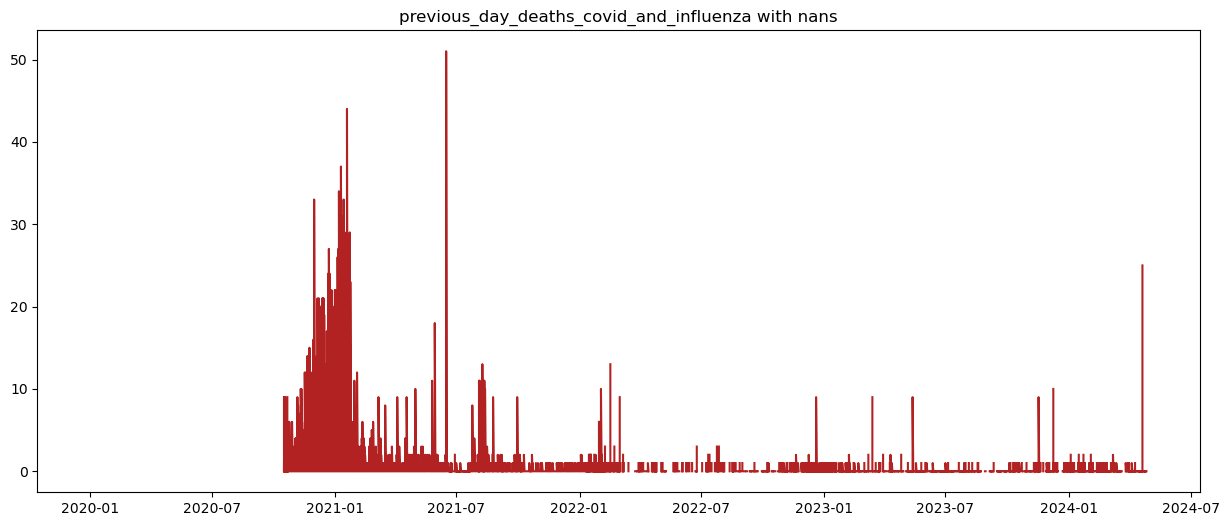

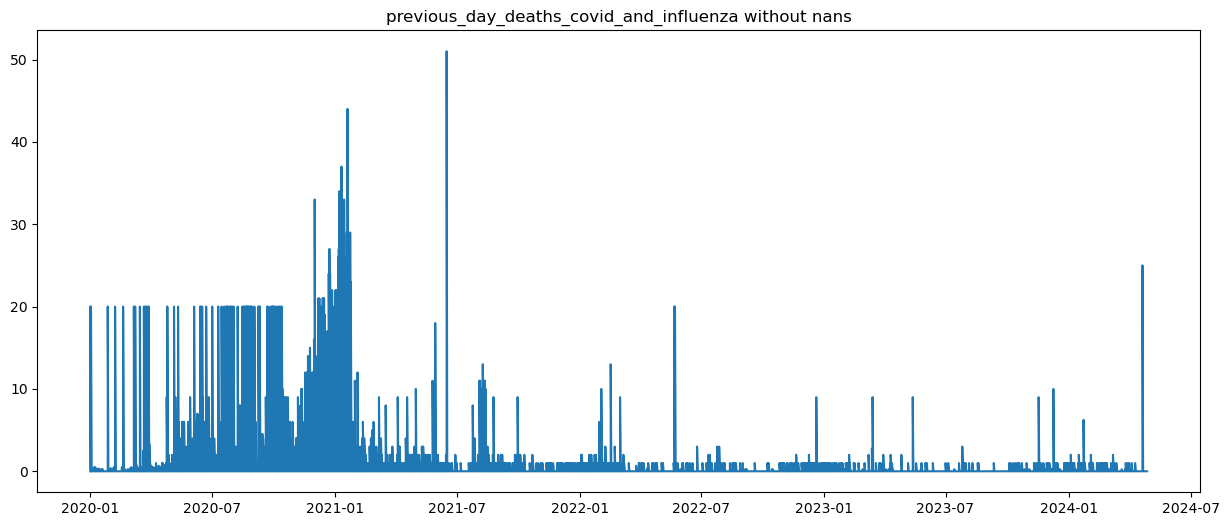

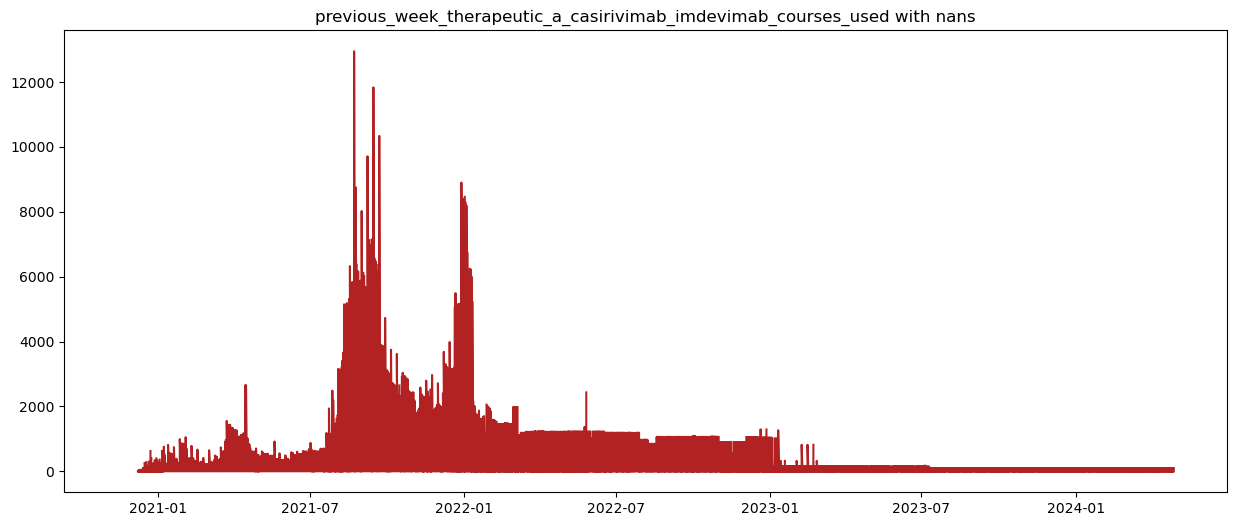

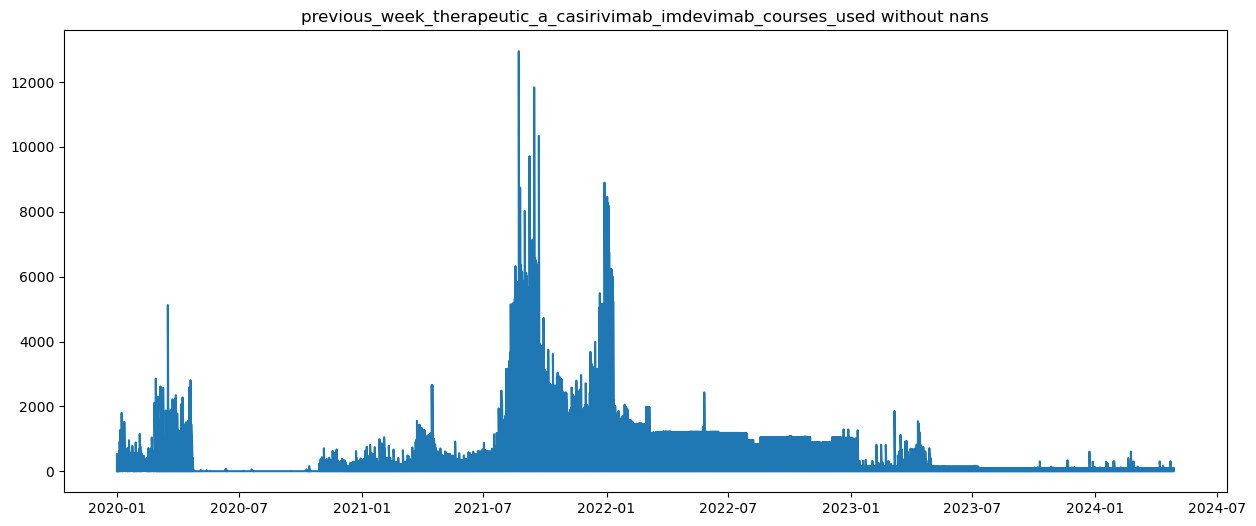

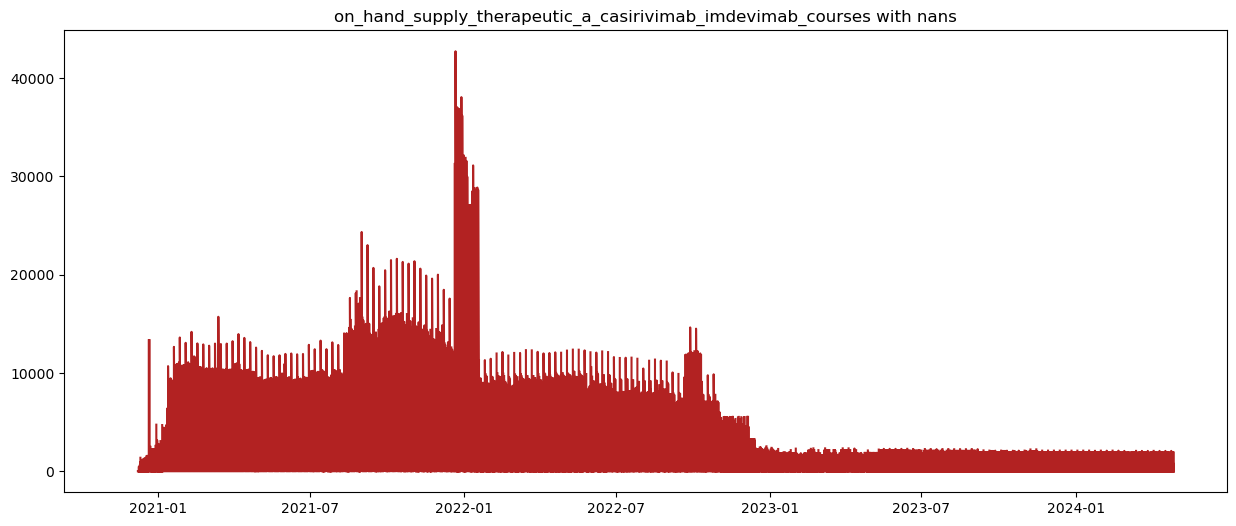

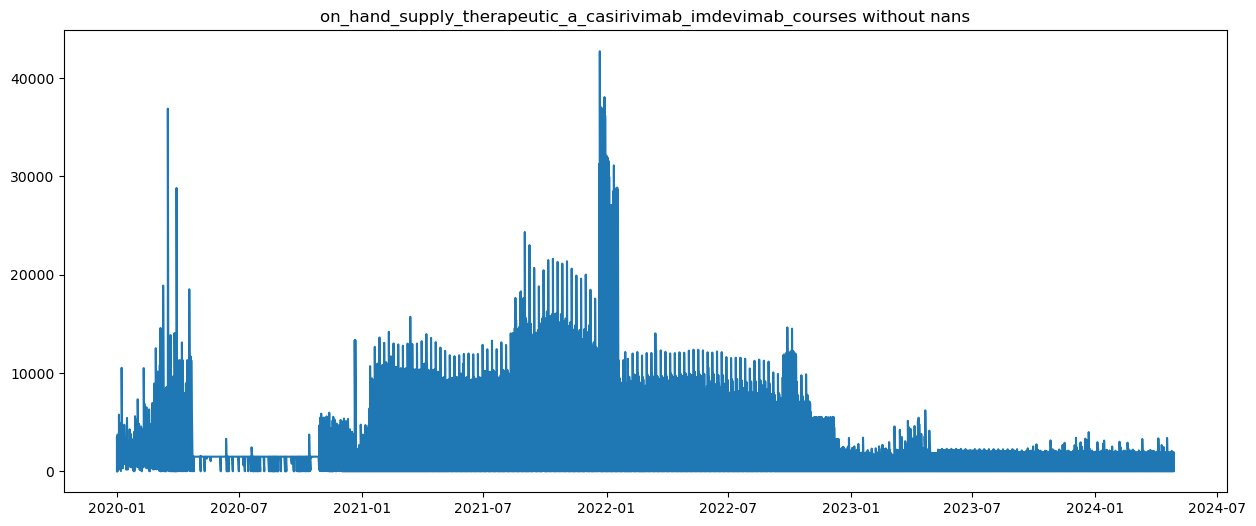

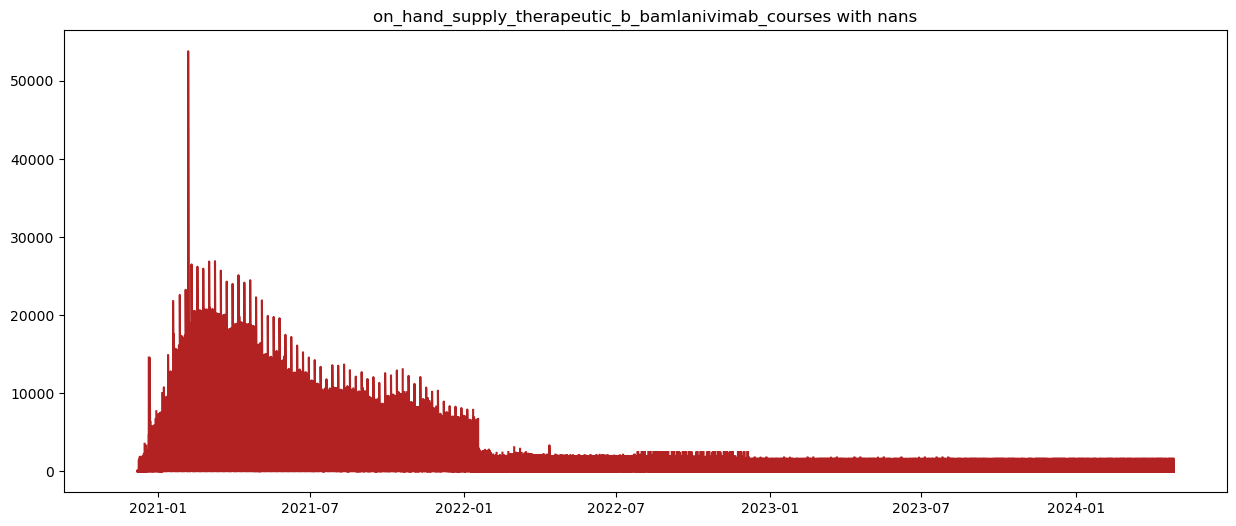

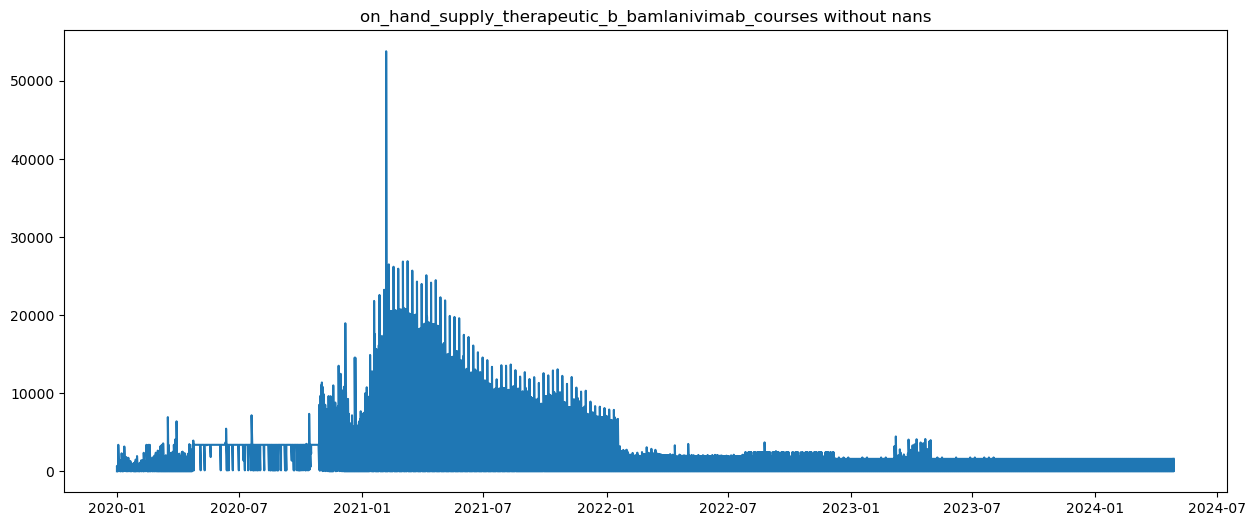

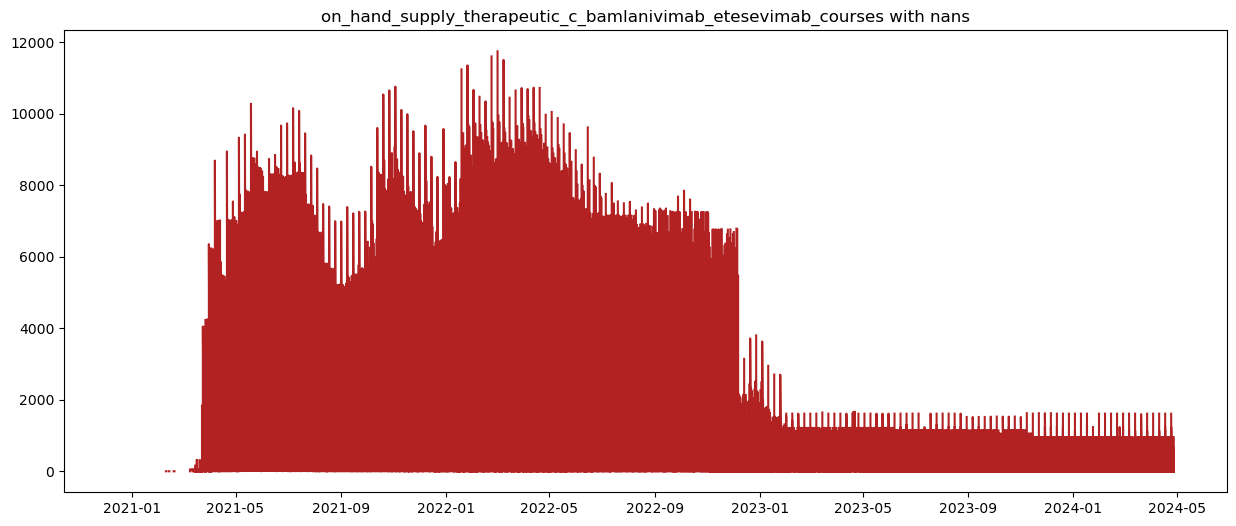

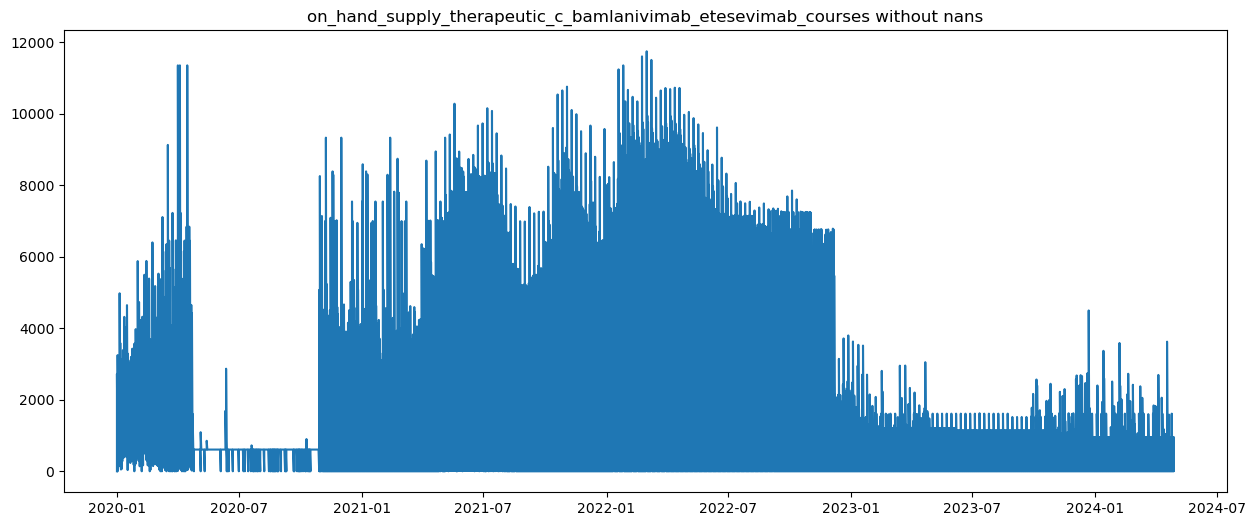

In [101]:
for col in null_cols[sel].index:
    ### SHOW ORIGINAL NULLS ###
    xs_orig, ys_orig = zip(*sorted(zip(covid_adult_data_raw["date"], covid_adult_data_raw[col])))                 # sort by date
    plt.figure(figsize=(15,6))
    plt.plot(xs_orig, ys_orig, color="firebrick")

    # axis labels and title
    plt.title(f"{col} with nans")
    plt.show()

    ### SHOW WITH IMPUTATION ###
    xs, ys = zip(*sorted(zip(covid_adult_data_clean["date"], covid_adult_data_clean[col])))                 # sort by date
    plt.figure(figsize=(15,6))
    plt.plot(xs, ys)

    # axis labels and title
    plt.title(f"{col} without nans")

    plt.show()